<a href="https://colab.research.google.com/github/priyanu17/CREDIT-DEFAULTER-ANALYSIS-using-PANDAS/blob/master/DATA_LINK_LOAN_DEFAULTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
import pandas.util.testing as tm
# Colab notebook requirement 

In [0]:
# Mount drive into colab to access files

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# Check contents of directory currently mounted
!ls

drive  sample_data


In [0]:
# Load all three files into dataframes

In [0]:
app_data = pd.read_csv("/content/drive/My Drive/application_data.csv")

In [0]:
previous_app = pd.read_csv("/content/drive/My Drive/previous_application.csv")

In [0]:
columns_des = pd.read_csv("/content/drive/My Drive/columns_description.csv", encoding = 'unicode_escape')

In [0]:
# PROBLEM STATEMENT:

# To analyse and find high risk variables 
# Variables that throughly affect the data
# To find hign dependencies in data w.r.t available variables


In [0]:
# All files loaded successfully

# Appliaction data contains information about the payment difficulties of applicant
# Previous app contains information about the previous application of applicant  

In [0]:
# Columns description contains description about the columns of the other two files
# Application_data
# Previous_Application

In [0]:
# Exploring columns descriptions data

In [0]:
# Description of first 20 columns of app_data

columns_des.head(20)

Unnamed: 0  ...                                Special
0            1  ...                                    NaN
1            2  ...                                    NaN
2            5  ...                                    NaN
3            6  ...                                    NaN
4            7  ...                                    NaN
5            8  ...                                    NaN
6            9  ...                                    NaN
7           10  ...                                    NaN
8           11  ...                                    NaN
9           12  ...                                    NaN
10          13  ...                                    NaN
11          14  ...                                    NaN
12          15  ...                                    NaN
13          16  ...                                    NaN
14          17  ...                                    NaN
15          18  ...                                    NaN
16          19  ...                            normalized 
17          20  ...  time only relative to the application
18          21  ...  time only relative to the application
19          22  ...  time only relative to the application

[20 rows x 5 columns]

In [0]:
# Above we can see all information about the dataset column names in both datasets.

In [0]:
# Now, exploring app_data and previous_app data:

In [0]:
# Columns and column size in datasets

In [0]:
app_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [0]:
app_data.columns.size

122

In [0]:
# app_data has 122 columns

In [0]:
previous_app.columns


Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [0]:
previous_app.columns.size

37

In [0]:
# previous_app data has 37 columns

In [0]:
# Info on datasets:

In [0]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [0]:
previous_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [0]:
# Shape of datasets:

In [0]:
app_data.shape

(307511, 122)

In [0]:
previous_app.shape

(1670214, 37)

In [0]:
# Describe on datasets:

In [0]:
app_data.describe().transpose()

count           mean  ...       75%          max
SK_ID_CURR                  307511.0  278180.518577  ...  367142.5     456255.0
TARGET                      307511.0       0.080729  ...       0.0          1.0
CNT_CHILDREN                307511.0       0.417052  ...       1.0         19.0
AMT_INCOME_TOTAL            307511.0  168797.919297  ...  202500.0  117000000.0
AMT_CREDIT                  307511.0  599025.999706  ...  808650.0    4050000.0
...                              ...            ...  ...       ...          ...
AMT_REQ_CREDIT_BUREAU_DAY   265992.0       0.007000  ...       0.0          9.0
AMT_REQ_CREDIT_BUREAU_WEEK  265992.0       0.034362  ...       0.0          8.0
AMT_REQ_CREDIT_BUREAU_MON   265992.0       0.267395  ...       0.0         27.0
AMT_REQ_CREDIT_BUREAU_QRT   265992.0       0.265474  ...       0.0        261.0
AMT_REQ_CREDIT_BUREAU_YEAR  265992.0       1.899974  ...       3.0         25.0

[106 rows x 8 columns]

In [0]:
previous_app.describe().transpose()

count          mean  ...           75%          max
SK_ID_PREV                 1670214.0  1.923089e+06  ...  2.384280e+06  2845382.000
SK_ID_CURR                 1670214.0  2.783572e+05  ...  3.675140e+05   456255.000
AMT_ANNUITY                1297979.0  1.595512e+04  ...  2.065842e+04   418058.145
AMT_APPLICATION            1670214.0  1.752339e+05  ...  1.803600e+05  6905160.000
AMT_CREDIT                 1670213.0  1.961140e+05  ...  2.164185e+05  6905160.000
AMT_DOWN_PAYMENT            774370.0  6.697402e+03  ...  7.740000e+03  3060045.000
AMT_GOODS_PRICE            1284699.0  2.278473e+05  ...  2.340000e+05  6905160.000
HOUR_APPR_PROCESS_START    1670214.0  1.248418e+01  ...  1.500000e+01       23.000
NFLAG_LAST_APPL_IN_DAY     1670214.0  9.964675e-01  ...  1.000000e+00        1.000
RATE_DOWN_PAYMENT           774370.0  7.963682e-02  ...  1.089091e-01        1.000
RATE_INTEREST_PRIMARY         5951.0  1.883569e-01  ...  1.933299e-01        1.000
RATE_INTEREST_PRIVILEGED      5951.0  7.735025e-01  ...  8.525370e-01        1.000
DAYS_DECISION              1670214.0 -8.806797e+02  ... -2.800000e+02       -1.000
SELLERPLACE_AREA           1670214.0  3.139511e+02  ...  8.200000e+01  4000000.000
CNT_PAYMENT                1297984.0  1.605408e+01  ...  2.400000e+01       84.000
DAYS_FIRST_DRAWING          997149.0  3.422099e+05  ...  3.652430e+05   365243.000
DAYS_FIRST_DUE              997149.0  1.382627e+04  ... -4.110000e+02   365243.000
DAYS_LAST_DUE_1ST_VERSION   997149.0  3.376777e+04  ...  1.290000e+02   365243.000
DAYS_LAST_DUE               997149.0  7.658240e+04  ... -7.400000e+01   365243.000
DAYS_TERMINATION            997149.0  8.199234e+04  ... -4.400000e+01   365243.000
NFLAG_INSURED_ON_APPROVAL   997149.0  3.325702e-01  ...  1.000000e+00        1.000

[21 rows x 8 columns]

In [0]:
# Head of datasets:

In [0]:
app_data.head()

SK_ID_CURR  TARGET  ... AMT_REQ_CREDIT_BUREAU_QRT AMT_REQ_CREDIT_BUREAU_YEAR
0      100002       1  ...                       0.0                        1.0
1      100003       0  ...                       0.0                        0.0
2      100004       0  ...                       0.0                        0.0
3      100006       0  ...                       NaN                        NaN
4      100007       0  ...                       0.0                        0.0

[5 rows x 122 columns]

In [0]:
previous_app.head()

SK_ID_PREV  SK_ID_CURR  ... DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL
0     2030495      271877  ...            -37.0                        0.0
1     2802425      108129  ...         365243.0                        1.0
2     2523466      122040  ...         365243.0                        1.0
3     2819243      176158  ...           -177.0                        1.0
4     1784265      202054  ...              NaN                        NaN

[5 rows x 37 columns]

In [0]:
# Dtypes of datasets:

In [0]:
app_data.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

In [0]:
previous_app.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_DOWN_PAYMENT               float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
RATE_DOWN_PAYMENT              float64
RATE_INTEREST_PRIMARY          float64
RATE_INTEREST_PRIVILEGED       float64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE                 object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE             

In [0]:
# Checking for duplicate entries:

In [0]:
app_data.duplicated(keep = "first").value_counts()

False    307511
dtype: int64

In [0]:
previous_app.duplicated(keep= "first").value_counts()

False    1670214
dtype: int64

In [0]:
# Data contains no duplicate entries

In [0]:
# Fetching columns description:

In [0]:
columns_des.columns 

Index(['Unnamed: 0', 'Table', 'Row', 'Description', 'Special'], dtype='object')

In [0]:
# Identifying rows which are of less significance in previous_app data:

# WEEKDAY_APPR_PROCESS_START
# HOUR_APPR_PROCESS_START
# NAME_TYPE_SUITE
# DAYS_FIRST_DRAWING
# DAYS_FIRST_DUE
# DAYS_LAST_DUE_1ST_VERSION
# DAYS_LAST_DUE
# DAYS_TERMINATION
# FLAG_LAST_APPL_PER_CONTRACT
# NFLAG_LAST_APPL_IN_DAY

In [0]:
# Function to check for constant feature columns in our data.

In [0]:
def find_constant_features(dataFrame):
    const_features = []
    for column in list(dataFrame.columns):
        if dataFrame[column].unique().size < 2:
            const_features.append(column)
    return const_features

In [0]:
print(find_constant_features(previous_app))

[]


In [0]:
# There are no columns with constant features in previous_app data.

In [0]:
# Studying column description for app_data:

In [0]:
columns_des.loc[ 0:20, ["Row",  "Description"]]
# rows from app_data

Row                                        Description
0                   SK_ID_CURR                           ID of loan in our sample
1                       TARGET  Target variable (1 - client with payment diffi...
2           NAME_CONTRACT_TYPE        Identification if loan is cash or revolving
3                  CODE_GENDER                               Gender of the client
4                 FLAG_OWN_CAR                      Flag if the client owns a car
5              FLAG_OWN_REALTY                Flag if client owns a house or flat
6                 CNT_CHILDREN                  Number of children the client has
7             AMT_INCOME_TOTAL                               Income of the client
8                   AMT_CREDIT                          Credit amount of the loan
9                  AMT_ANNUITY                                       Loan annuity
10             AMT_GOODS_PRICE  For consumer loans it is the price of the good...
11             NAME_TYPE_SUITE  Who was accompanying client when he was applyi...
12            NAME_INCOME_TYPE  Clients income type (businessman, working, mat...
13         NAME_EDUCATION_TYPE     Level of highest education the client achieved
14          NAME_FAMILY_STATUS                        Family status of the client
15           NAME_HOUSING_TYPE  What is the housing situation of the client (r...
16  REGION_POPULATION_RELATIVE  Normalized population of region where client l...
17                  DAYS_BIRTH    Client's age in days at the time of application
18               DAYS_EMPLOYED  How many days before the application the perso...
19           DAYS_REGISTRATION  How many days before the application did clien...
20             DAYS_ID_PUBLISH  How many days before the application did clien...

In [0]:
app_data.columns[0:20]

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION'],
      dtype='object')

In [0]:
# Listing unique values in the app_data dataset:

In [0]:
# Identifying rows which are of less significance in app_data:

# NAME_TYPE_SUITE
# FLAG_MOBIL
# FLAG_EMP_PHONE
# FLAG_WORK_PHONE
# WEEKDAY_APPR_PROCESS_START
# HOUR_APPR_PROCESS_START
# 

In [0]:
# Checking for constant features in app_data:

In [0]:
print(find_constant_features(app_data))

[]


In [0]:
# No constant feature columns in app_data.

In [0]:
###### Dealing with null values

In [0]:
# Null value handling in previous_app data

# null percentages for Previous Application data

In [0]:
((previous_app.isna().sum()/len(previous_app))*100).round(2)

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

In [0]:
# Dropping columns with high entries null > 40%

In [0]:
previous_app.drop(["AMT_DOWN_PAYMENT", "RATE_DOWN_PAYMENT", 
                   "RATE_INTEREST_PRIMARY", "RATE_INTEREST_PRIVILEGED", 
                   "NAME_TYPE_SUITE", "DAYS_FIRST_DRAWING", "DAYS_FIRST_DUE",
                   "DAYS_LAST_DUE_1ST_VERSION", "DAYS_LAST_DUE","DAYS_TERMINATION",
                   "NFLAG_INSURED_ON_APPROVAL"], axis =1, inplace = True)

In [0]:
previous_app.columns.size

26

In [0]:
((previous_app.isna().sum()/len(previous_app))*100).round(2)

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
NAME_SELLER_INDUSTRY            0.00
CNT_PAYMENT                    22.29
NAME_YIELD_GROUP                0.00
PRODUCT_COMBINATION             0.02
dtype: float64

In [0]:
previous_app["AMT_ANNUITY"].value_counts()

2250.000     31865
11250.000    13974
6750.000     13442
9000.000     12496
22500.000    11903
             ...  
30073.860        1
41845.365        1
36622.620        1
41864.760        1
63715.905        1
Name: AMT_ANNUITY, Length: 357959, dtype: int64

In [0]:
# NAN values can be replaced with "Average" values or "Mean"

In [0]:
previous_app["AMT_GOODS_PRICE"].value_counts()

45000.000     47831
225000.000    43549
135000.000    40666
450000.000    38926
90000.000     29367
              ...  
355626.000        1
247404.465        1
355594.500        1
355590.000        1
442350.000        1
Name: AMT_GOODS_PRICE, Length: 93885, dtype: int64

In [0]:
# NAN values can be replaced with "Average" values or "Mean"

In [0]:
# NAN values can be replaced with "MODE" value

In [0]:
# Columns with <1% null can drop rows with null values 
#as they do not greatly affect our analysis

In [0]:
previous_app["FLAG_LAST_APPL_PER_CONTRACT"].value_counts()

Y    1661739
N       8475
Name: FLAG_LAST_APPL_PER_CONTRACT, dtype: int64

In [0]:
previous_app["NFLAG_LAST_APPL_IN_DAY"].value_counts()

1    1664314
0       5900
Name: NFLAG_LAST_APPL_IN_DAY, dtype: int64

In [0]:
previous_app[previous_app["NAME_CONTRACT_STATUS"] == "Approved"]["NAME_CASH_LOAN_PURPOSE"].value_counts()

XAP                                 724241
XNA                                 285607
Repairs                               8677
Other                                 6677
Urgent needs                          3574
Everyday expenses                     1236
Medicine                              1037
Buying a used car                      881
Education                              765
Building a house or an annex           675
Purchase of electronic equipment       588
Journey                                559
Wedding / gift / holiday               397
Car repairs                            358
Furniture                              333
Payments on other loans                304
Buying a new car                       221
Buying a home                          200
Buying a holiday home / land           132
Business development                   130
Gasification / water supply            115
Buying a garage                         39
Hobby                                   19
Money for a

In [0]:
previous_app["PRODUCT_COMBINATION"].value_counts()

Cash                              285990
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112582
POS industry with interest         98833
POS household without interest     82908
Card X-Sell                        80582
Cash Street: high                  59639
Cash X-Sell: high                  59301
Cash Street: middle                34658
Cash Street: low                   33834
POS mobile without interest        24082
POS other with interest            23879
POS industry without interest      12602
POS others without interest         2555
Name: PRODUCT_COMBINATION, dtype: int64

In [0]:
#### Null value handling in app_data:

In [0]:
# Analyzing top 20 rows for number of null values in each row

# With this we can get an idea which columns contain maximum number of null values in each row

In [0]:
app_data.iloc[:20, 0:20].isna().sum(axis = 1) 

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
dtype: int64

In [0]:
app_data.iloc[:20, 20:40].isna().sum(axis = 1) 

0     1
1     1
2     0
3     1
4     1
5     1
6     0
7     0
8     2
9     1
10    1
11    2
12    1
13    0
14    1
15    0
16    1
17    1
18    1
19    1
dtype: int64

In [0]:
app_data.iloc[:20, 40:60].isna().sum(axis = 1) 

0      0
1      1
2     17
3     18
4     18
5     17
6     16
7     17
8     16
9     18
10    16
11    16
12     7
13     1
14     1
15    16
16    17
17    18
18     1
19    17
dtype: int64

In [0]:
app_data.iloc[:20, 60:80].isna().sum(axis = 1) 

0      0
1      0
2     20
3     20
4     20
5     20
6     20
7     20
8     20
9     20
10    20
11    20
12     8
13     0
14     0
15    20
16    20
17    20
18     0
19    20
dtype: int64

In [0]:
app_data.iloc[:20, 80:100].isna().sum(axis = 1) 

0      0
1      0
2     11
3     11
4     11
5     11
6     11
7     11
8     11
9     11
10    11
11    11
12     4
13     0
14     0
15    11
16    11
17    11
18     0
19    11
dtype: int64

In [0]:
app_data.iloc[:20, 100:].isna().sum(axis = 1) 

0     0
1     0
2     0
3     6
4     0
5     0
6     0
7     0
8     0
9     6
10    0
11    0
12    0
13    0
14    6
15    0
16    0
17    6
18    0
19    0
dtype: int64

In [0]:
# We observe that columns in the range (40: 80) (around 40 columns) have maximum number of collective null values

In [0]:
# created a dataframe that contains the null percentages of all columns in the Application data dataframe

In [0]:
nan_app_data = ((app_data.isna().sum()/len(app_data))*100).round(2).to_frame()
nan_app_data.reset_index(inplace= True)

In [0]:
nan_app_data.iloc[0:20, ]
# Data represents percentages of null values in a column

index     0
0                   SK_ID_CURR  0.00
1                       TARGET  0.00
2           NAME_CONTRACT_TYPE  0.00
3                  CODE_GENDER  0.00
4                 FLAG_OWN_CAR  0.00
5              FLAG_OWN_REALTY  0.00
6                 CNT_CHILDREN  0.00
7             AMT_INCOME_TOTAL  0.00
8                   AMT_CREDIT  0.00
9                  AMT_ANNUITY  0.00
10             AMT_GOODS_PRICE  0.09
11             NAME_TYPE_SUITE  0.42
12            NAME_INCOME_TYPE  0.00
13         NAME_EDUCATION_TYPE  0.00
14          NAME_FAMILY_STATUS  0.00
15           NAME_HOUSING_TYPE  0.00
16  REGION_POPULATION_RELATIVE  0.00
17                  DAYS_BIRTH  0.00
18               DAYS_EMPLOYED  0.00
19           DAYS_REGISTRATION  0.00

In [0]:
# Columns with very less percentage of null values can simply have rows 
# with null values removed from the dataset

# AMT_GOODS_PRICE
# NAME_TYPE_SUITE

In [0]:
nan_app_data.iloc[20:40, ]
# Data represents percentages of null values in a column

index      0
20              DAYS_ID_PUBLISH   0.00
21                  OWN_CAR_AGE  65.99
22                   FLAG_MOBIL   0.00
23               FLAG_EMP_PHONE   0.00
24              FLAG_WORK_PHONE   0.00
25             FLAG_CONT_MOBILE   0.00
26                   FLAG_PHONE   0.00
27                   FLAG_EMAIL   0.00
28              OCCUPATION_TYPE  31.35
29              CNT_FAM_MEMBERS   0.00
30         REGION_RATING_CLIENT   0.00
31  REGION_RATING_CLIENT_W_CITY   0.00
32   WEEKDAY_APPR_PROCESS_START   0.00
33      HOUR_APPR_PROCESS_START   0.00
34   REG_REGION_NOT_LIVE_REGION   0.00
35   REG_REGION_NOT_WORK_REGION   0.00
36  LIVE_REGION_NOT_WORK_REGION   0.00
37       REG_CITY_NOT_LIVE_CITY   0.00
38       REG_CITY_NOT_WORK_CITY   0.00
39      LIVE_CITY_NOT_WORK_CITY   0.00

In [0]:
app_data["OWN_CAR_AGE"].value_counts()

7.0     7424
6.0     6382
3.0     6370
8.0     5887
2.0     5852
        ... 
52.0       1
56.0       1
47.0       1
50.0       1
57.0       1
Name: OWN_CAR_AGE, Length: 62, dtype: int64

In [0]:
# High percenatage of null > 60% can be dropped

# OWN_CAR_AGE 

In [0]:
app_data["OCCUPATION_TYPE"].value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [0]:
# Here we have categorical data in "OCCUPATION_TYPE"
# We cannot make prediction for close related value such as average , median or mode 

# Create a new category "Unknown" 
# replace all nulls with "Unknown"

In [0]:
  nan_app_data.iloc[40:60,]
  # Data represents percentages of null values in a column

index      0
40            ORGANIZATION_TYPE   0.00
41                 EXT_SOURCE_1  56.38
42                 EXT_SOURCE_2   0.21
43                 EXT_SOURCE_3  19.83
44               APARTMENTS_AVG  50.75
45             BASEMENTAREA_AVG  58.52
46  YEARS_BEGINEXPLUATATION_AVG  48.78
47              YEARS_BUILD_AVG  66.50
48               COMMONAREA_AVG  69.87
49                ELEVATORS_AVG  53.30
50                ENTRANCES_AVG  50.35
51                FLOORSMAX_AVG  49.76
52                FLOORSMIN_AVG  67.85
53                 LANDAREA_AVG  59.38
54         LIVINGAPARTMENTS_AVG  68.35
55               LIVINGAREA_AVG  50.19
56      NONLIVINGAPARTMENTS_AVG  69.43
57            NONLIVINGAREA_AVG  55.18
58              APARTMENTS_MODE  50.75
59            BASEMENTAREA_MODE  58.52

In [0]:
app_data.iloc[:, 40:60].dtypes

ORGANIZATION_TYPE               object
EXT_SOURCE_1                   float64
EXT_SOURCE_2                   float64
EXT_SOURCE_3                   float64
APARTMENTS_AVG                 float64
BASEMENTAREA_AVG               float64
YEARS_BEGINEXPLUATATION_AVG    float64
YEARS_BUILD_AVG                float64
COMMONAREA_AVG                 float64
ELEVATORS_AVG                  float64
ENTRANCES_AVG                  float64
FLOORSMAX_AVG                  float64
FLOORSMIN_AVG                  float64
LANDAREA_AVG                   float64
LIVINGAPARTMENTS_AVG           float64
LIVINGAREA_AVG                 float64
NONLIVINGAPARTMENTS_AVG        float64
NONLIVINGAREA_AVG              float64
APARTMENTS_MODE                float64
BASEMENTAREA_MODE              float64
dtype: object

In [0]:
# Columns with < 1% of null values --> Rows can be eliminated

# Columns with > 45% of null values --> Columns can be dropped 
# Above all such columns are of dtype "float64"
# If we replace then with the mean or mode then results can be biased 
# and may not reveal true picture of the data
# Therefore, we will drop such columns 
#

In [0]:
nan_app_data.iloc[60:80,]
  # Data represents percentages of null values in a column

index      0
60  YEARS_BEGINEXPLUATATION_MODE  48.78
61              YEARS_BUILD_MODE  66.50
62               COMMONAREA_MODE  69.87
63                ELEVATORS_MODE  53.30
64                ENTRANCES_MODE  50.35
65                FLOORSMAX_MODE  49.76
66                FLOORSMIN_MODE  67.85
67                 LANDAREA_MODE  59.38
68         LIVINGAPARTMENTS_MODE  68.35
69               LIVINGAREA_MODE  50.19
70      NONLIVINGAPARTMENTS_MODE  69.43
71            NONLIVINGAREA_MODE  55.18
72               APARTMENTS_MEDI  50.75
73             BASEMENTAREA_MEDI  58.52
74  YEARS_BEGINEXPLUATATION_MEDI  48.78
75              YEARS_BUILD_MEDI  66.50
76               COMMONAREA_MEDI  69.87
77                ELEVATORS_MEDI  53.30
78                ENTRANCES_MEDI  50.35
79                FLOORSMAX_MEDI  49.76

In [0]:
app_data.iloc[:, 60:80].dtypes

YEARS_BEGINEXPLUATATION_MODE    float64
YEARS_BUILD_MODE                float64
COMMONAREA_MODE                 float64
ELEVATORS_MODE                  float64
ENTRANCES_MODE                  float64
FLOORSMAX_MODE                  float64
FLOORSMIN_MODE                  float64
LANDAREA_MODE                   float64
LIVINGAPARTMENTS_MODE           float64
LIVINGAREA_MODE                 float64
NONLIVINGAPARTMENTS_MODE        float64
NONLIVINGAREA_MODE              float64
APARTMENTS_MEDI                 float64
BASEMENTAREA_MEDI               float64
YEARS_BEGINEXPLUATATION_MEDI    float64
YEARS_BUILD_MEDI                float64
COMMONAREA_MEDI                 float64
ELEVATORS_MEDI                  float64
ENTRANCES_MEDI                  float64
FLOORSMAX_MEDI                  float64
dtype: object

In [0]:
# In the above segment of data columns all values have > 45% of null values 
# These columns can be dropped
# All the above columns can be dropped 
# They have dtype as "float64"

In [0]:
# We choose to crop columns with high percentage of nulls so that our results 
#are not biased towards one variable

In [0]:
nan_app_data.iloc[80:100, ]
# Data represents percentages of null values in a column

index      0
80            FLOORSMIN_MEDI  67.85
81             LANDAREA_MEDI  59.38
82     LIVINGAPARTMENTS_MEDI  68.35
83           LIVINGAREA_MEDI  50.19
84  NONLIVINGAPARTMENTS_MEDI  69.43
85        NONLIVINGAREA_MEDI  55.18
86        FONDKAPREMONT_MODE  68.39
87            HOUSETYPE_MODE  50.18
88            TOTALAREA_MODE  48.27
89        WALLSMATERIAL_MODE  50.84
90       EMERGENCYSTATE_MODE  47.40
91  OBS_30_CNT_SOCIAL_CIRCLE   0.33
92  DEF_30_CNT_SOCIAL_CIRCLE   0.33
93  OBS_60_CNT_SOCIAL_CIRCLE   0.33
94  DEF_60_CNT_SOCIAL_CIRCLE   0.33
95    DAYS_LAST_PHONE_CHANGE   0.00
96           FLAG_DOCUMENT_2   0.00
97           FLAG_DOCUMENT_3   0.00
98           FLAG_DOCUMENT_4   0.00
99           FLAG_DOCUMENT_5   0.00

In [0]:
app_data.iloc[:, 80:100].dtypes

FLOORSMIN_MEDI              float64
LANDAREA_MEDI               float64
LIVINGAPARTMENTS_MEDI       float64
LIVINGAREA_MEDI             float64
NONLIVINGAPARTMENTS_MEDI    float64
NONLIVINGAREA_MEDI          float64
FONDKAPREMONT_MODE           object
HOUSETYPE_MODE               object
TOTALAREA_MODE              float64
WALLSMATERIAL_MODE           object
EMERGENCYSTATE_MODE          object
OBS_30_CNT_SOCIAL_CIRCLE    float64
DEF_30_CNT_SOCIAL_CIRCLE    float64
OBS_60_CNT_SOCIAL_CIRCLE    float64
DEF_60_CNT_SOCIAL_CIRCLE    float64
DAYS_LAST_PHONE_CHANGE      float64
FLAG_DOCUMENT_2               int64
FLAG_DOCUMENT_3               int64
FLAG_DOCUMENT_4               int64
FLAG_DOCUMENT_5               int64
dtype: object

In [0]:
# From "FLOORSMIN_MEDI" to "EMERGENCYSTATE_MODE" columns can be dropped 
# They have > 45% null values 

# For Columns with < 1% null values "OBS_30_CNT_SOCIAL_CIRCLE" - "DEF_60_CNT_SOCIAL_CIRCLE" rows can be dropped
# to eliminate null values 
# does not delete a large chunck of our data.


In [0]:
nan_app_data.iloc[100:, ]
  # Data represents percentages of null values in a column

index     0
100             FLAG_DOCUMENT_6   0.0
101             FLAG_DOCUMENT_7   0.0
102             FLAG_DOCUMENT_8   0.0
103             FLAG_DOCUMENT_9   0.0
104            FLAG_DOCUMENT_10   0.0
105            FLAG_DOCUMENT_11   0.0
106            FLAG_DOCUMENT_12   0.0
107            FLAG_DOCUMENT_13   0.0
108            FLAG_DOCUMENT_14   0.0
109            FLAG_DOCUMENT_15   0.0
110            FLAG_DOCUMENT_16   0.0
111            FLAG_DOCUMENT_17   0.0
112            FLAG_DOCUMENT_18   0.0
113            FLAG_DOCUMENT_19   0.0
114            FLAG_DOCUMENT_20   0.0
115            FLAG_DOCUMENT_21   0.0
116  AMT_REQ_CREDIT_BUREAU_HOUR  13.5
117   AMT_REQ_CREDIT_BUREAU_DAY  13.5
118  AMT_REQ_CREDIT_BUREAU_WEEK  13.5
119   AMT_REQ_CREDIT_BUREAU_MON  13.5
120   AMT_REQ_CREDIT_BUREAU_QRT  13.5
121  AMT_REQ_CREDIT_BUREAU_YEAR  13.5

In [0]:
app_data.iloc[:, 100:].dtypes

FLAG_DOCUMENT_6                 int64
FLAG_DOCUMENT_7                 int64
FLAG_DOCUMENT_8                 int64
FLAG_DOCUMENT_9                 int64
FLAG_DOCUMENT_10                int64
FLAG_DOCUMENT_11                int64
FLAG_DOCUMENT_12                int64
FLAG_DOCUMENT_13                int64
FLAG_DOCUMENT_14                int64
FLAG_DOCUMENT_15                int64
FLAG_DOCUMENT_16                int64
FLAG_DOCUMENT_17                int64
FLAG_DOCUMENT_18                int64
FLAG_DOCUMENT_19                int64
FLAG_DOCUMENT_20                int64
FLAG_DOCUMENT_21                int64
AMT_REQ_CREDIT_BUREAU_HOUR    float64
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
dtype: object

In [0]:
# Columns from above segment can all be dropped as they are not very useful in our required analysis

In [0]:
# Even, though they have less percentage of null 
# 0% null values from "FLAG_DOCUMENT_2" to "FLAG_DOCUMENT_21"

# 13% null values from "AMT_REQ_CREDIT_BUREAU_HOUR" to "AMT_REQ_CREDIT_BUREAU_YEAR"
# In case, we wished to replace these column values 
# We can replace with the "MODE" or the "MEDIAN".

In [0]:
# Dropping columns in the range "FLAG_DOCUMENT_2" to "AMT_REQ_CREDIT_BUREAU_YEAR"

In [0]:
app_data = app_data.iloc[:, 0:96]

In [0]:
app_data.columns.size

96

In [0]:
# Dropping columns with > 45% null values in application data

In [0]:
app_data.drop(app_data.loc[:,'APARTMENTS_AVG':'EMERGENCYSTATE_MODE'].columns, axis= 1, inplace= True)


In [0]:
app_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_3

In [0]:
# DROP "OWN_CAR_AGE" > 60% null values

In [0]:
app_data.drop(columns=["OWN_CAR_AGE"], inplace = True)

In [0]:
# Fill nan in "OCCUPATION_TYPE" with "Unknown"

In [0]:
values = {"OCCUPATION_TYPE": "Unknown"}
app_data.fillna(value = values, inplace= True)

In [0]:
app_data.columns.size

48

In [0]:
# Checking remaining columns 
previous_app.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

In [0]:
# Checking for data types in our datset for the remaing columns 

In [0]:
previous_app.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE                    object
SELLERPLACE_AREA                 int64
NAME_SELLER_INDUSTRY            object
CNT_PAYMENT                    float64
NAME_YIELD_GROUP                object
PRODUCT_COMBINATION      

In [0]:
previous_app["FLAG_LAST_APPL_PER_CONTRACT"].value_counts()

Y    1661739
N       8475
Name: FLAG_LAST_APPL_PER_CONTRACT, dtype: int64

In [0]:
previous_app["NFLAG_LAST_APPL_IN_DAY"].value_counts()

1    1664314
0       5900
Name: NFLAG_LAST_APPL_IN_DAY, dtype: int64

In [0]:
# First categorical column has "Y" and "N" for the two categories

# Second categorical column has 1 and 0  for the two categories

# Both are flag categories

In [0]:
#### OUTLIER detection starts from here 

In [0]:
# Outlier detection in previous_app data:

# We use boxplots to detect outliers in our dataset

In [0]:
previous_app.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [0]:
previous_app.select_dtypes(include = ["float64", "int64"]).columns.size

11

In [0]:
# Creating numeric_columns list to have all integer and float columns from previous_app data

numeric_columns = previous_app.select_dtypes(include = ["float64", "int64"]).columns

In [0]:
numeric_columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'AMT_ANNUITY', 'AMT_APPLICATION',
       'AMT_CREDIT', 'AMT_GOODS_PRICE', 'HOUR_APPR_PROCESS_START',
       'NFLAG_LAST_APPL_IN_DAY', 'DAYS_DECISION', 'SELLERPLACE_AREA',
       'CNT_PAYMENT'],
      dtype='object')

In [0]:
previous_app["NFLAG_LAST_APPL_IN_DAY"].value_counts()

1    1664314
0       5900
Name: NFLAG_LAST_APPL_IN_DAY, dtype: int64

In [0]:
type(numeric_columns)

pandas.core.indexes.base.Index

In [0]:
# Removing columns which are not applicable for outlier detection from the numeric_column list:

# such columns are unique identifiers - "SK_ID_PREV", "SK_ID_CURR"
# such columns are catogorical in nature - "NFLAG_LAST_APPL_IN_DAY", "SELLERPLACE_AREA"
# hence, not applicable for outlier detection

numeric_columns = numeric_columns.drop(["SK_ID_PREV", "SK_ID_CURR", "NFLAG_LAST_APPL_IN_DAY", "SELLERPLACE_AREA"])

In [0]:
numeric_columns

Index(['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'HOUR_APPR_PROCESS_START', 'DAYS_DECISION', 'CNT_PAYMENT'],
      dtype='object')

In [0]:
# Visualization for outlier detection in previous_app data
sns.set( palette = "muted")


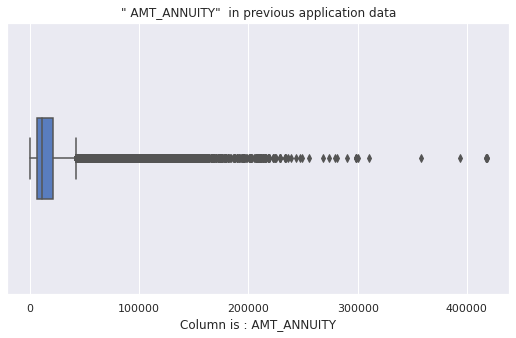

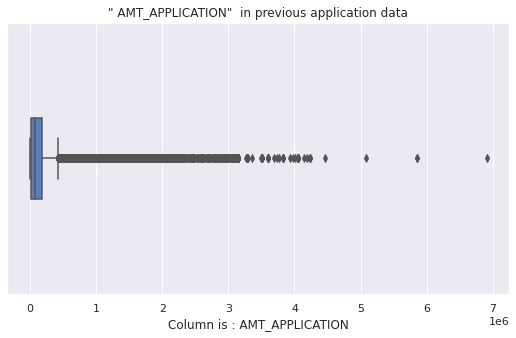

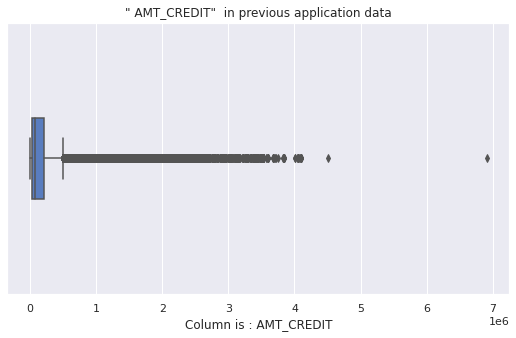

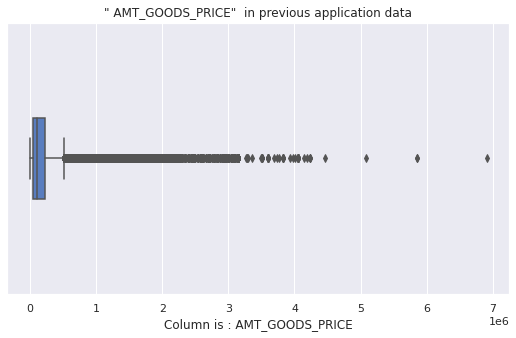

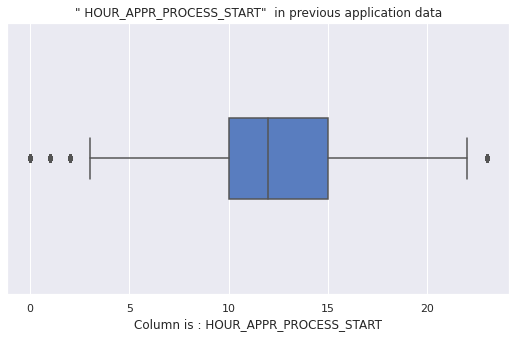

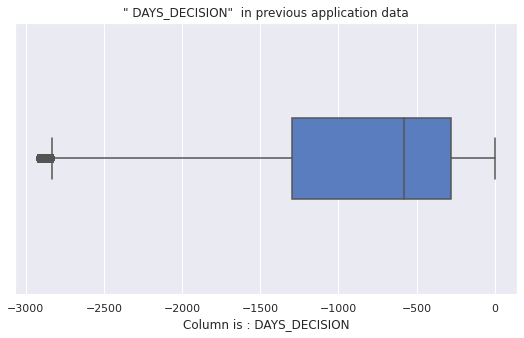

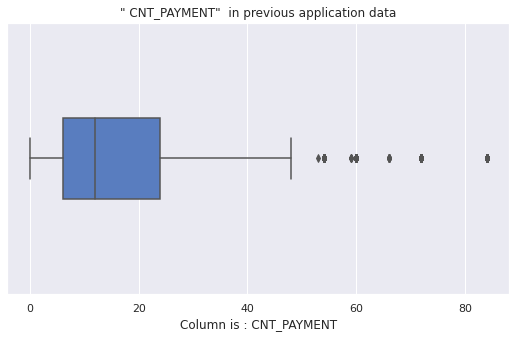

In [0]:
# Loop to detect outliers in all numeric_columns in previous_data:

for col in numeric_columns[:]:
    plt.figure( figsize = (9, 5))
    sns.boxplot(x=previous_app[col], width = 0.3)
    plt.title("\" "+ col + "\" " + " in previous application data")
    plt.xlabel("Column is : " + col)
    plt.show()
    print()
    print()

In [0]:
# Thus we can see clearly from the boxplots where outliers are present in our dataset

# All columns present in numeric_columns contains outliers

In [0]:
# Large number of outliers are present in the following columns:

# "AMT_ANNIUITY"
# "AMT_APPLICATION"
# "AMT_GOODS_PRICE"
# "AMT_CREDIT"

In [0]:
# Outlier detection in app_data dataset:


In [0]:
app_data.select_dtypes(include = ["float64", "int64"]).columns.size

36

In [0]:
app_data.select_dtypes(include = ["float64", "int64"]).columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE'],
      dtype='object')

In [0]:
# Creating list of numeric columns in app_data:

numeric_columns_app_data = app_data.select_dtypes(include = ["float64", "int64"]).columns

In [0]:
numeric_columns_app_data.size

36

In [0]:
app_data["REGION_RATING_CLIENT_W_CITY"].value_counts()

2    229484
3     43860
1     34167
Name: REGION_RATING_CLIENT_W_CITY, dtype: int64

In [0]:
# Removing columns which are not applicable 

In [0]:
# Following columns will be removed from outlier detection step as they are categorical in nature

# FLAG_MOBIL
# FLAG_EMP_PHONE
# FLAG_WORK_PHONE
# FLAG_CONT_MOBILE
# FLAG_PHONE
# FLAG_EMAIL
# REGION_RATING_CLIENT
# REGION_RATING_CLIENT_W_CITY
# REG_REGION_NOT_LIVE_REGION
# REG_REGION_NOT_WORK_REGION
# LIVE_REGION_NOT_WORK_REGION
# REG_CITY_NOT_LIVE_CITY
# REG_CITY_NOT_WORK_CITY
# LIVE_CITY_NOT_WORK_CITY


In [0]:
# List of columns to be dropped from numeric_columns_app_data 
# They are categorical in nature

drop_app_columns = ["FLAG_MOBIL", "FLAG_EMP_PHONE", "FLAG_WORK_PHONE", "FLAG_CONT_MOBILE", "FLAG_PHONE", "FLAG_EMAIL",
                    "REGION_RATING_CLIENT", "REGION_RATING_CLIENT_W_CITY", "REG_REGION_NOT_LIVE_REGION", "REG_REGION_NOT_WORK_REGION",
                    "LIVE_REGION_NOT_WORK_REGION", "REG_CITY_NOT_LIVE_CITY" ,"REG_CITY_NOT_WORK_CITY", "LIVE_CITY_NOT_WORK_CITY"]

In [0]:
numeric_columns_app_data = numeric_columns_app_data.drop(drop_app_columns)

In [0]:
numeric_columns_app_data.size

22

In [0]:
# Columns to be dropped from outlier detection steps :

# TARGET : This is the outcome variable 

In [0]:
numeric_columns_app_data = numeric_columns_app_data.drop(["TARGET"])

In [0]:
numeric_columns_app_data.size
# Total number of numeric_columns in ap_data

21

In [0]:
# Visualization for outlier detection
# Using boxplot to detect outliers in our data

In [0]:
# Boxplots for all numerical data to detect outliers

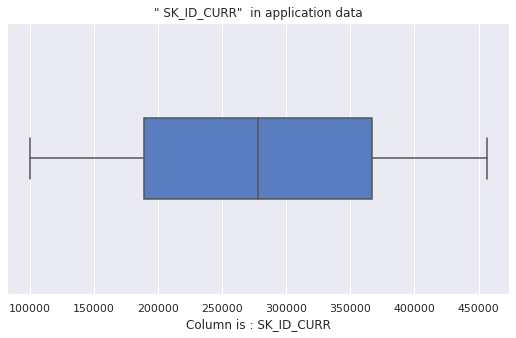

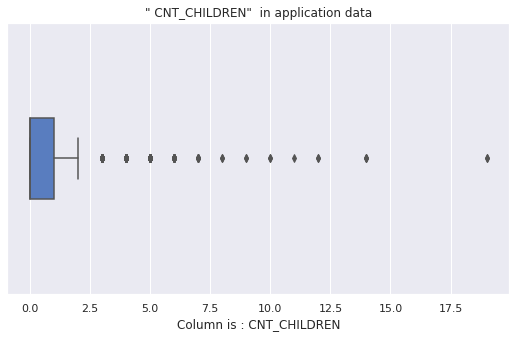

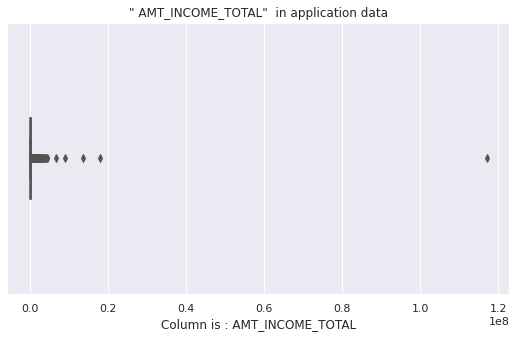

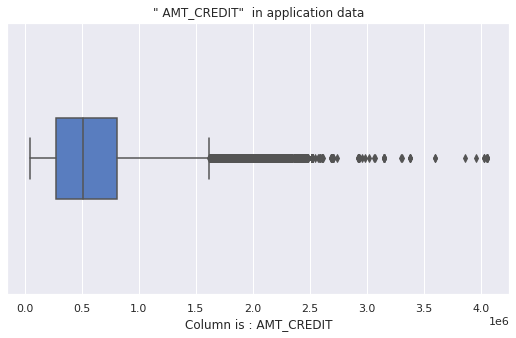

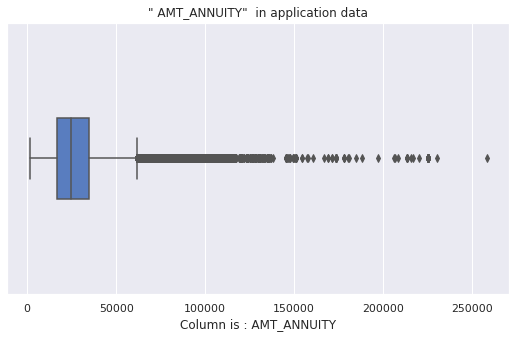

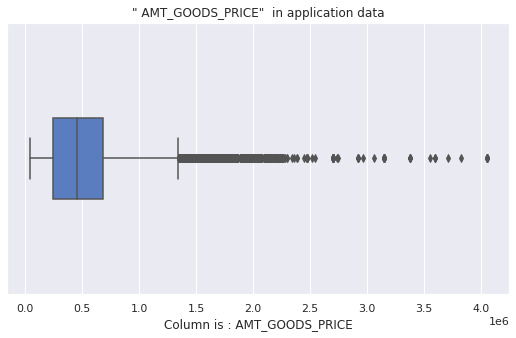

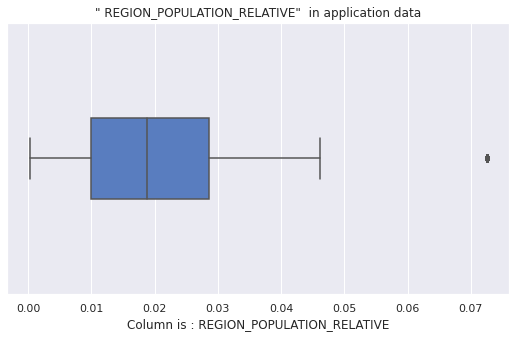

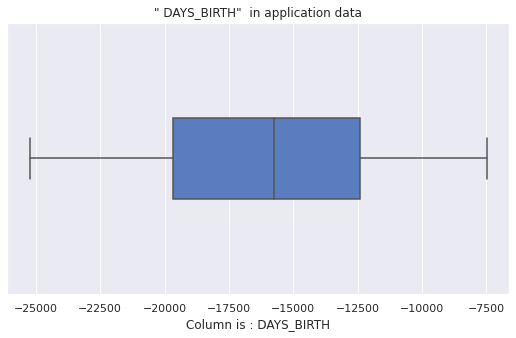

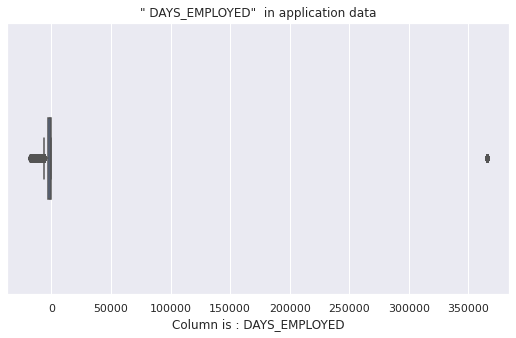

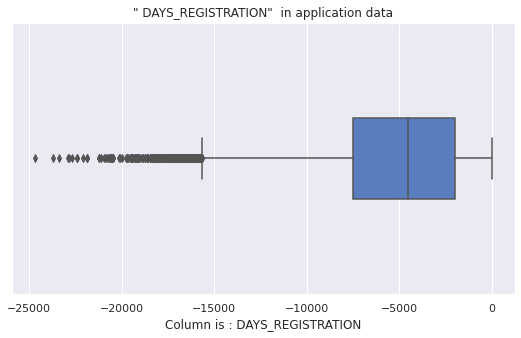

In [0]:
# Outlier detection for first 10 numeric_columns:

for col in numeric_columns_app_data[0:10]:
    plt.figure( figsize = (9, 5))
    sns.boxplot(x=app_data[col], width = 0.3)
    plt.title("\" "+ col + "\" " + " in application data")
    plt.xlabel("Column is : " + col)
    plt.show()
    print()
    print()

In [0]:
# Observations from outlier detection step:

# "SK_ID_CURR" has no outlier : It is unique identifier for each loan with incremental numbers as data
# "DAYS_BIRTH" also has no outliers
# "DAYS_ID_PUBLISH" has no outliers

# "AMT_INCOME_TOTAL" has a lone outlier which is skewing the entire boxplot.(most probably incorect entry)
# "DAYS_EMPLOYED" also has a lone outlier which is skewing the entire data

# "AMT_INCOME_TOTAL", "REGION_POPULATION_RELATIVE" and "DAYS_EMPLOYED"have very few outliers in the entire data
# Rest all columns have outliers in them 

# Outliers should be replaced as they may lead to inaccurate predictions for our data
# Outliers can be replaced with the "MEDIAN" value

In [0]:
app_data["DAYS_EMPLOYED"].value_counts()

 365243    55374
-200         156
-224         152
-199         151
-230         151
           ...  
-11115         1
-11371         1
-11883         1
-13536         1
-8795          1
Name: DAYS_EMPLOYED, Length: 12574, dtype: int64

In [0]:
# Serious outlier present in "DAYS_EMPLOYED " column where one value in a very high positive number 
# and rest all values are negative

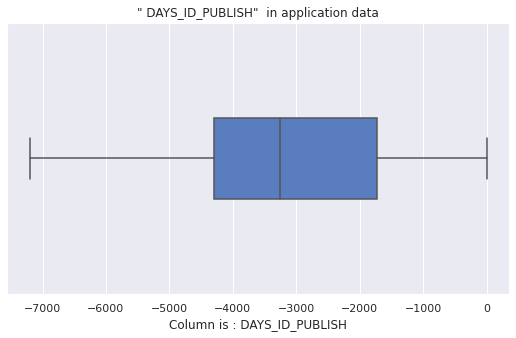

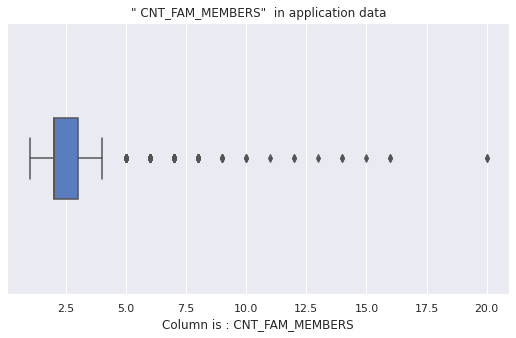

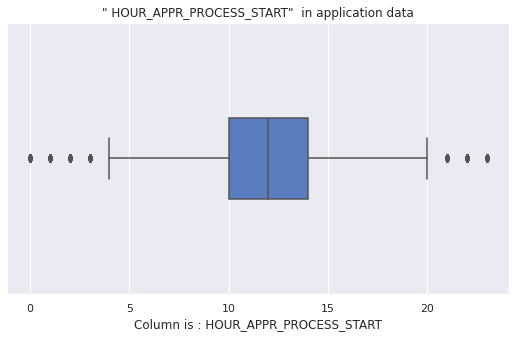

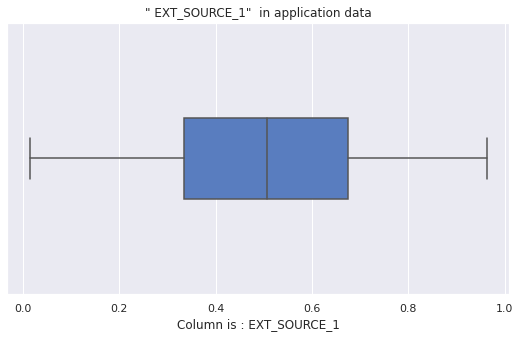

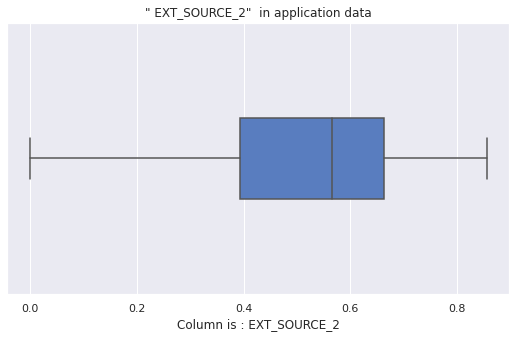

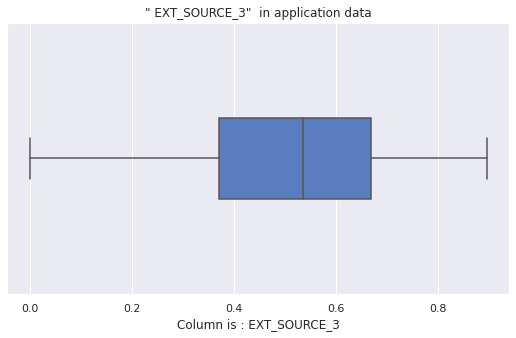

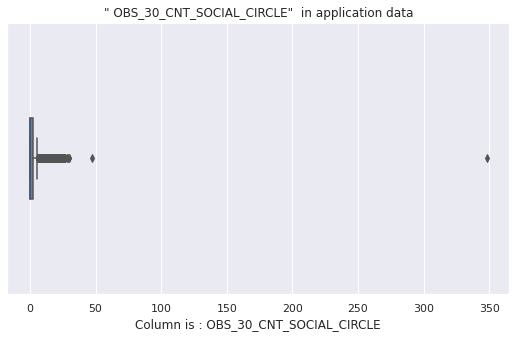

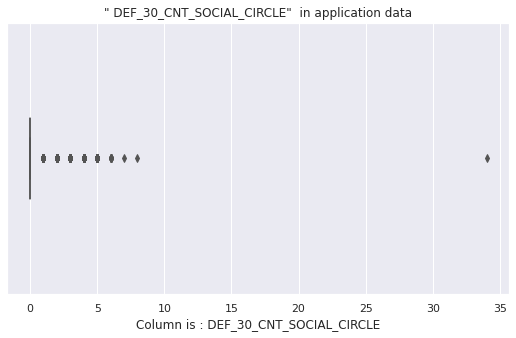

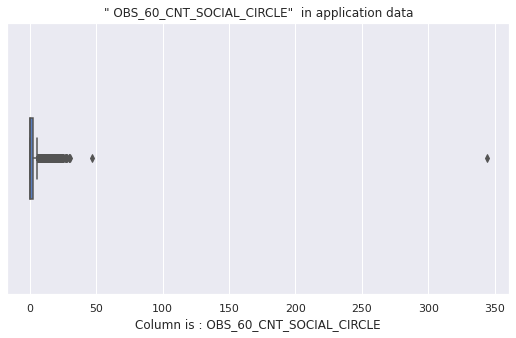

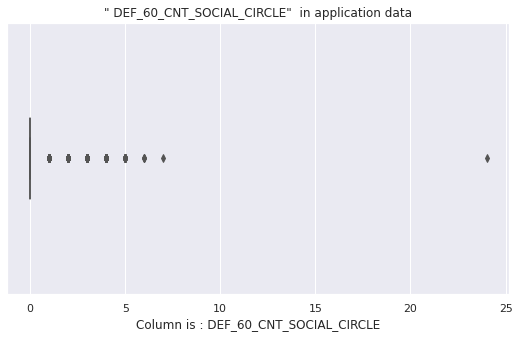

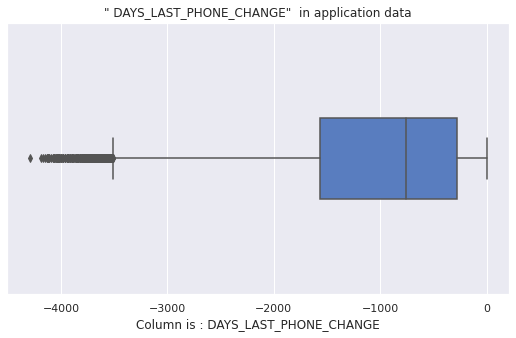

In [0]:
# Outlier detection for all remaining numeric_columns from app_data

for col in numeric_columns_app_data[10:]:
    plt.figure( figsize = (9, 5))
    sns.boxplot(x=app_data[col], width = 0.3)
    plt.title("\" "+ col + "\" " + " in application data")
    plt.xlabel("Column is : " + col)
    plt.show()
    print()
    print()

In [0]:
# Observations from outlier detection step: 

# "DAYS_ID_PUBLISED" has no outliers
# "EXT_SOURCE_1" , "EXT_SOURCE_2"  and "EXT_SOURCE_3" have no outliers in the dataset
# "OBS_30_CNT_SOCIAL_CIRCLE" , "DEF_30_CNT_SOCIAL_CIRCLE" , "OBS_60_CNT_SOCIAL_CIRCLE" 
# and "DEF_60_CNT_SOCIAL_CIRCLE"  have few outliers : They should be removed and replaced with "MEDIAN"

# Rest of the columns also have outliers in them 

In [0]:
# Creating a new column "TARGET_CATEGORICAL"

In [0]:
def f(row):
    if row["TARGET"] == 1:
        val = "Default"
    else:
        val = "Not Default"
    return val

In [0]:
app_data["TARGET_CATEGORICAL"] = app_data.apply(f, axis=1)


In [0]:
# New column created successfully

In [0]:
app_data["TARGET"].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [0]:
app_data["TARGET_CATEGORICAL"].value_counts()

Not Default    282686
Default         24825
Name: TARGET_CATEGORICAL, dtype: int64

In [0]:
# Segmented Outlier detection (Segmentation based on target variable)

In [0]:
# Outlier detection based on data seperated into "DEFAULT" and "NOT DEFAULT" categories

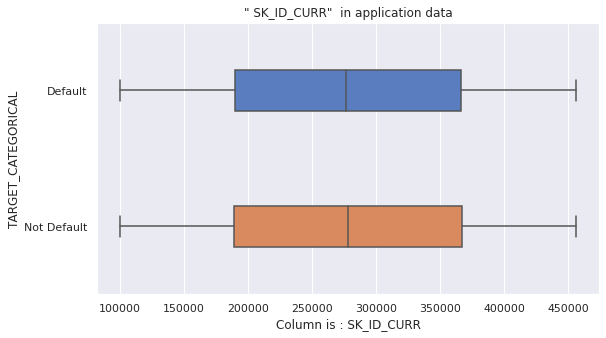

<Figure size 432x288 with 0 Axes>

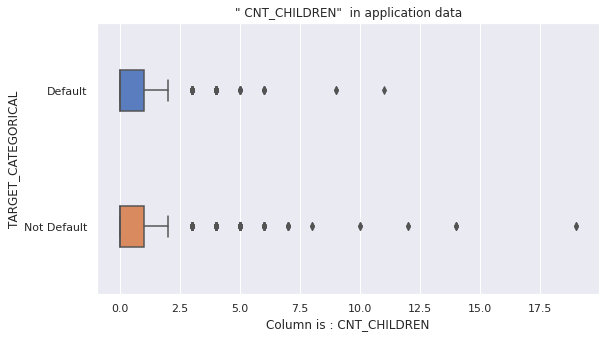

<Figure size 432x288 with 0 Axes>

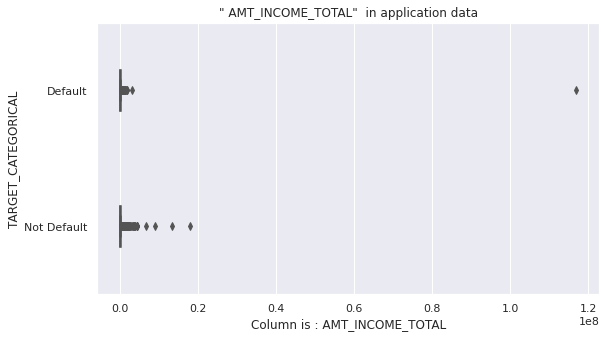

<Figure size 432x288 with 0 Axes>

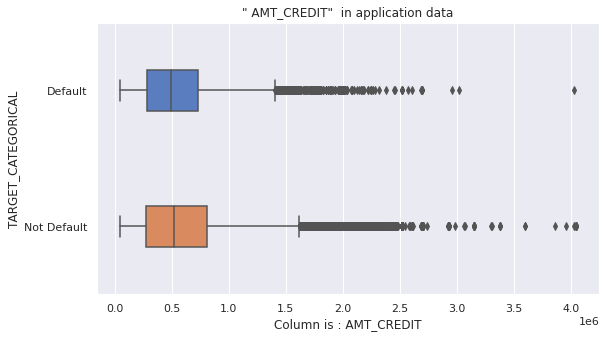

<Figure size 432x288 with 0 Axes>

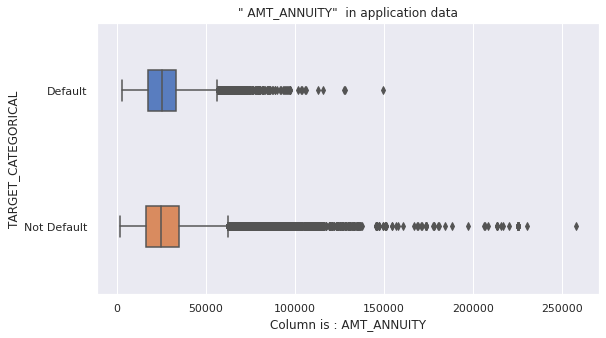

<Figure size 432x288 with 0 Axes>

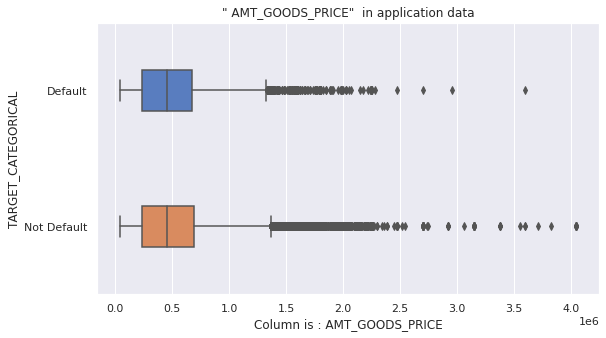

<Figure size 432x288 with 0 Axes>

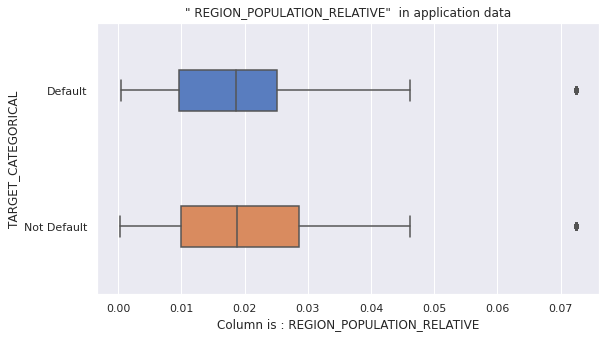

<Figure size 432x288 with 0 Axes>

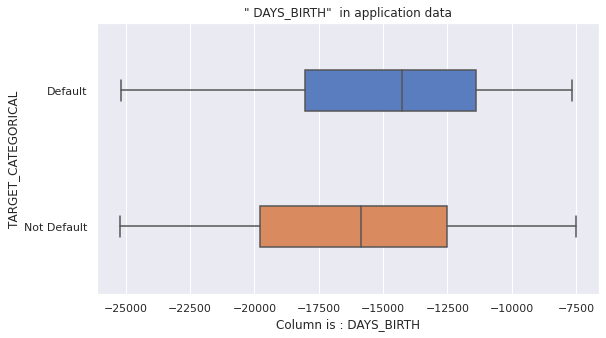

<Figure size 432x288 with 0 Axes>

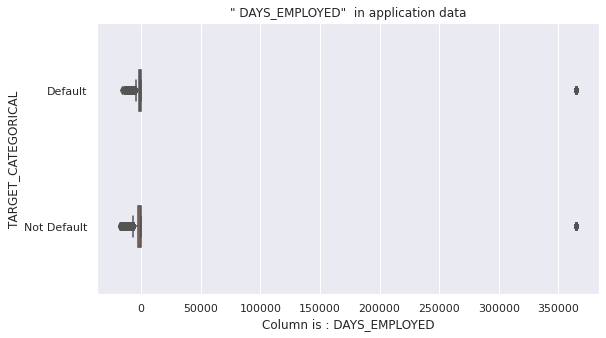

<Figure size 432x288 with 0 Axes>

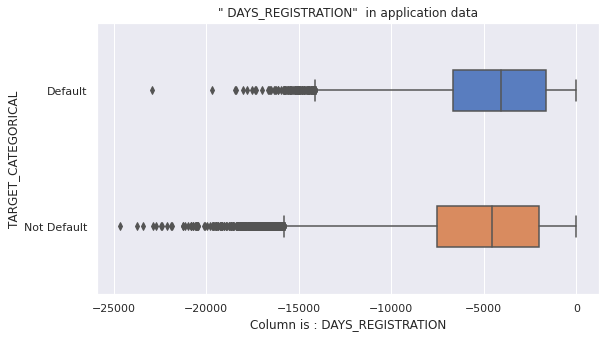

<Figure size 432x288 with 0 Axes>

In [0]:
# Segmented outlier detection for the first 10 numeric_columns

for col in numeric_columns_app_data[0:10]:
    plt.figure( figsize = (9, 5))
    sns.boxplot(x=col, y= "TARGET_CATEGORICAL", data = app_data, width = 0.3)
    plt.title("\" "+ col + "\" " + " in application data")
    plt.xlabel("Column is : " + col)
    plt.show()
    print()
    print()
    plt.tight_layout()


In [0]:
# Observation from segmented outlier detection:

# Outliers are present in all columns except "SK_ID_CURR" and "DAYS_BIRTH" columns
# "DAYS_EMPLOYED" has lone outlier which is skewing the datset for both "DEFAULT" and "NON DEFAULT" cases

# "AMT_INCOME_TOTAL" has lone outlier in "DEFAULT" category 
# -> incorrect information filled by defualter

# "REGION_POPLATION_RELATIVE"  has outlier in both categories 
# -> implying default can occure from low or high population region

# Rest all columns contain outliers

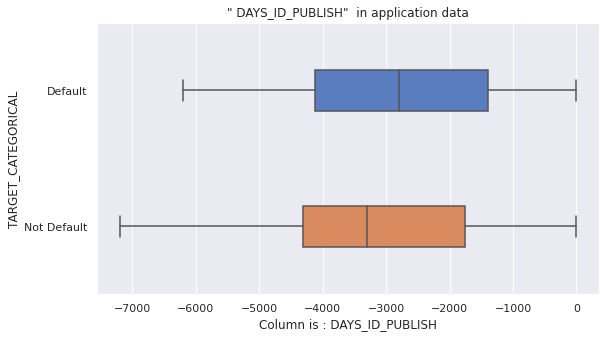

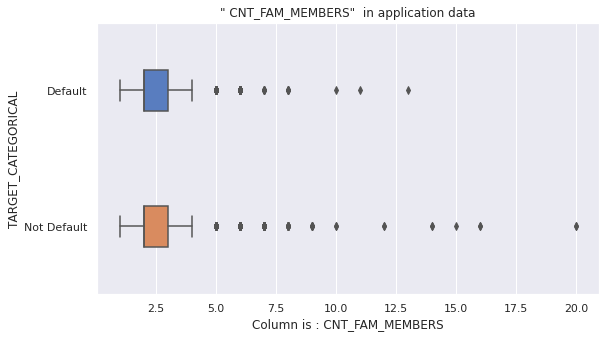

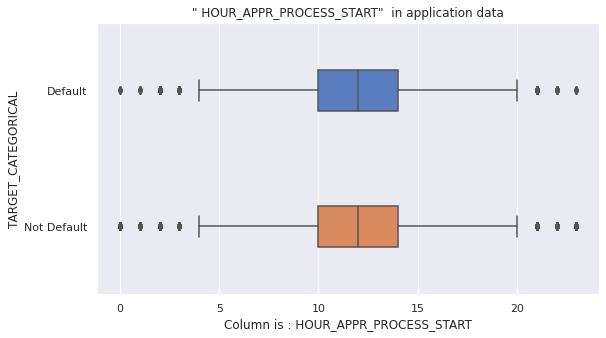

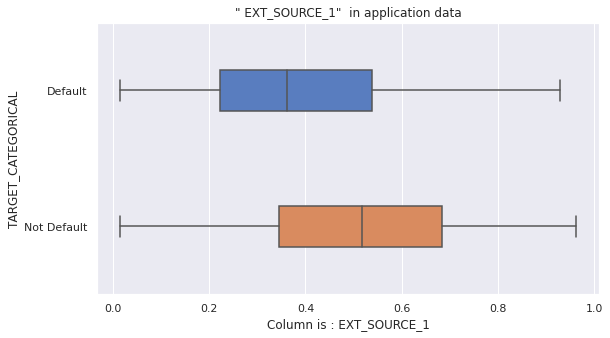

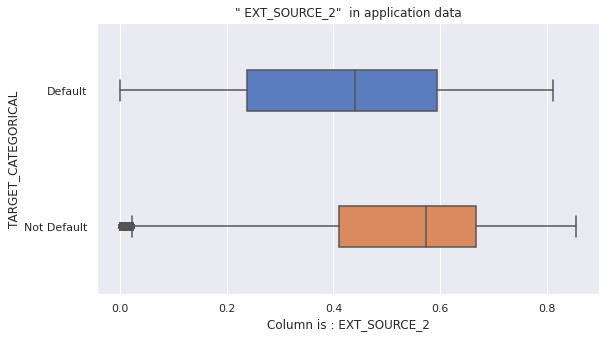

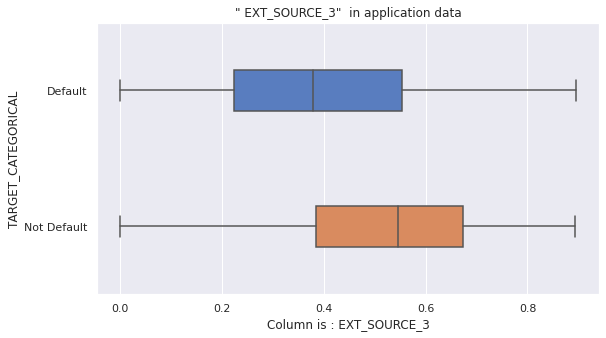

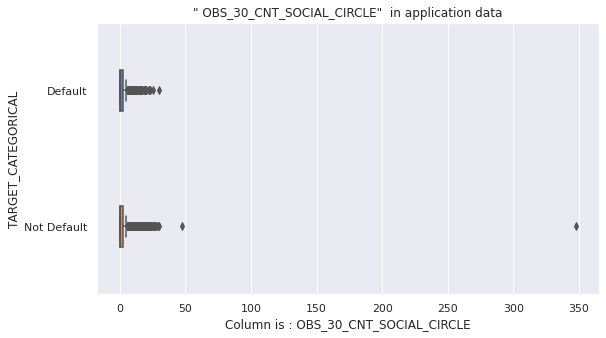

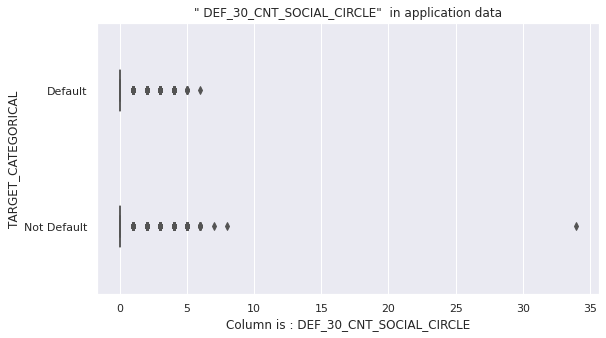

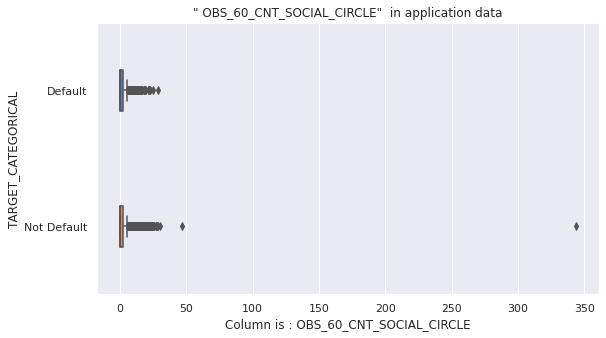

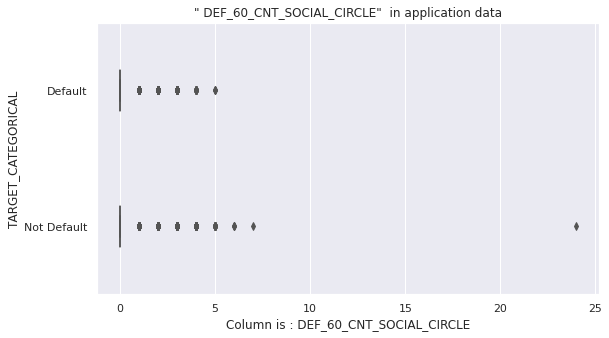

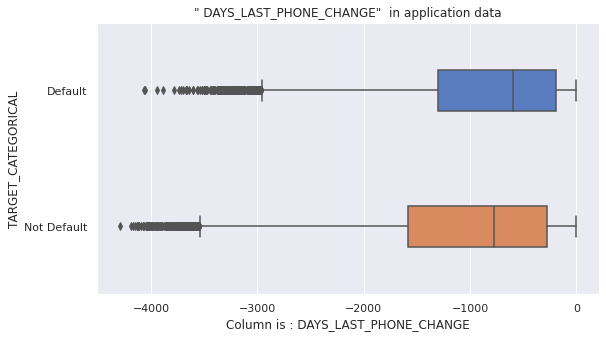

In [0]:
# Segmented outlier detection for remaining columns in numeric_column list:

for col in numeric_columns_app_data[10: ]:
    plt.figure( figsize = (9, 5))
    sns.boxplot(x=col, y= "TARGET_CATEGORICAL", data = app_data, width = 0.3)
    plt.title("\" "+ col + "\" " + " in application data")
    plt.xlabel("Column is : " + col)
    plt.show()
    print()
    print()

In [0]:
# Observations from above dataset:

# No outlier in "DEFAULT_ID_PUBLISH" for both categories
# "EXT_SOURCE_2" has no outliers in "DEFAULT" category
# -> implies that External Source data is useful in "Default" identification

# "SOCIAL_CIRCLE" columns have one or tw wrong entries (as the skewness of the box is high)
# Rest columns have outliers in both categories

In [0]:
####### Identification of Data Imbalance:


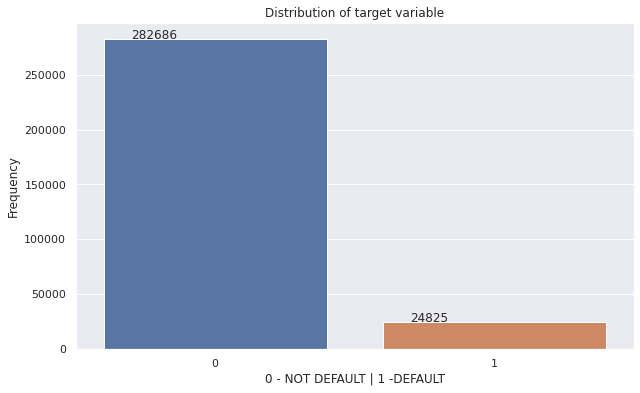

In [0]:
# Plot to visualize data imbalance in the dataset:

sns.set(style="darkgrid")


plt.figure(figsize=(10,6))
ax = sns.countplot(x="TARGET", data=app_data)
plt.title('Distribution of target variable')
plt.xlabel('0 - NOT DEFAULT | 1 -DEFAULT')
plt.ylabel('Frequency')

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

In [0]:
# Very less number of variables have been identified as "DEFAULT" in comparison to the entire dataset

# Hence, data is highly imbalanced.

In [0]:
# Percentage of data imbalance 

In [0]:
# Percentage of dafault vs Non default
print("Percentage of Non Default")
print(((app_data["TARGET"].value_counts()[0]/app_data.shape[0])*100).round(2))
print()
print("Percentage of Default")
print(((app_data["TARGET"].value_counts()[1]/app_data.shape[0])*100).round(2))

Percentage of Non Default
91.93

Percentage of Default
8.07


In [0]:
# Ratio of data imbalance

In [0]:
# Ratio of default vs Non default
print("Ratio of Non Default")
print(((app_data["TARGET"].value_counts()[0]/app_data.shape[0])).round(2))
print()
print("Ration of Default")
print(((app_data["TARGET"].value_counts()[1]/app_data.shape[0])).round(2))


Ratio of Non Default
0.92

Ration of Default
0.08


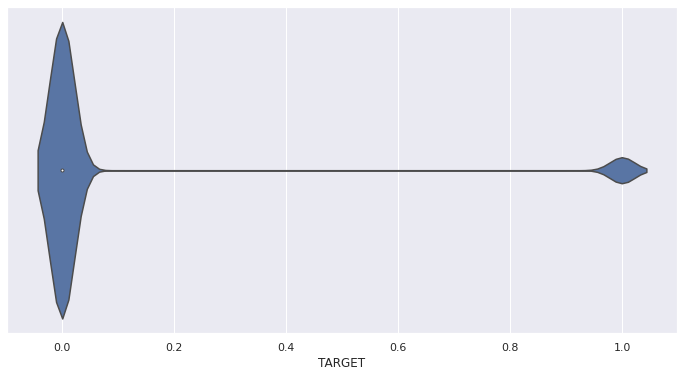

In [0]:
# Another plot to show data imbalance

sns.set(style="darkgrid")
plt.figure(figsize = (12, 6))
sns.violinplot(x = app_data["TARGET"])
plt.show()

In [0]:
# Data imbalance can be seen with the relative width of the figure at 
# 1 -> Default
# 0 -> Non default

In [0]:
# Plotting in terms of percentage of data

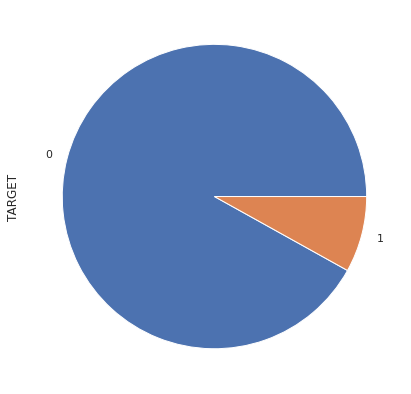

In [0]:
# Pie chart can be used to demonstrate data imbalance

plt.figure(figsize = (7, 7))
app_data["TARGET"].value_counts().plot.pie()
plt.show()

# 0 -> No Default
# 1 -> Default

In [0]:
###### UNIVARIATE and BIVARIATE analysis with respect to the TARGET variable

In [0]:
# UNIVARIATE analysis w.r.t TARGET variable

In [0]:
app_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CI

In [0]:
app_data.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
FLAG_MOBIL                       int64
FLAG_EMP_PHONE                   int64
FLAG_WORK_PHONE                  int64
FLAG_CONT_MOBILE                 int64
FLAG_PHONE               

In [0]:
# Separating categorical and continuous columns

In [0]:
cat_list = []
con_list = []
cat_flag_list = []


In [0]:
# Categorical list

cat_list.append("NAME_CONTRACT_TYPE")
cat_list.append("CODE_GENDER") 
cat_list.append("CNT_CHILDREN")
cat_list.append("NAME_TYPE_SUITE")
cat_list.append("NAME_INCOME_TYPE")
cat_list.append("NAME_EDUCATION_TYPE")
cat_list.append("NAME_FAMILY_STATUS")
cat_list.append("NAME_HOUSING_TYPE")
cat_list.append("OCCUPATION_TYPE")
cat_list.append("CNT_FAM_MEMBERS")
cat_list.append("REGION_RATING_CLIENT")
cat_list.append("REGION_RATING_CLIENT_W_CITY")
cat_list.append("WEEKDAY_APPR_PROCESS_START")
cat_list.append("ORGANIZATION_TYPE")


In [0]:
# Categorical Flag list

cat_flag_list.append("FLAG_OWN_CAR")
cat_flag_list.append("FLAG_OWN_REALTY")
cat_flag_list.append("FLAG_MOBIL")
cat_flag_list.append("FLAG_EMP_PHONE")
cat_flag_list.append("FLAG_WORK_PHONE")
cat_flag_list.append("FLAG_CONT_MOBILE")
cat_flag_list.append("FLAG_PHONE")
cat_flag_list.append("FLAG_EMAIL")
cat_flag_list.append("REG_REGION_NOT_LIVE_REGION")
cat_flag_list.append("REG_REGION_NOT_WORK_REGION")
cat_flag_list.append("LIVE_REGION_NOT_WORK_REGION")
cat_flag_list.append("REG_CITY_NOT_LIVE_CITY")
cat_flag_list.append("REG_CITY_NOT_WORK_CITY")
cat_flag_list.append("LIVE_CITY_NOT_WORK_CITY")


In [0]:
# Continuous column list

con_list.append("AMT_INCOME_TOTAL")
con_list.append("AMT_CREDIT")
con_list.append("AMT_ANNUITY")
con_list.append("AMT_GOODS_PRICE")
con_list.append("REGION_POPULATION_RELATIVE")
con_list.append("DAYS_BIRTH")
con_list.append("DAYS_EMPLOYED")
con_list.append("DAYS_REGISTRATION")
con_list.append("DAYS_ID_PUBLISH")
con_list.append("HOUR_APPR_PROCESS_START")
con_list.append("EXT_SOURCE_1")
con_list.append("EXT_SOURCE_2")
con_list.append("EXT_SOURCE_3")
con_list.append("OBS_30_CNT_SOCIAL_CIRCLE")
con_list.append("DEF_30_CNT_SOCIAL_CIRCLE")
con_list.append("OBS_60_CNT_SOCIAL_CIRCLE")
con_list.append("DEF_60_CNT_SOCIAL_CIRCLE")
con_list.append("DAYS_LAST_PHONE_CHANGE")


In [0]:
# Number of columns in which the data is continuous:
len(con_list)

18

In [0]:
# Number of columns in which the data is categorical:
len(cat_list)

14

In [0]:
# Number of columns in which the data is categorical and divided into 2 flags categories
len(cat_flag_list)

14

In [0]:
# UNIVARIATE ANALYSIS:

In [0]:
# Continuous variables:

In [0]:
# Function to plot for continuous variables in the app_data:

def continuous_variable_plot(column):
    
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,3), dpi=90)
    
    # Plot without default status
    
    sns.distplot(app_data.loc[app_data[column].notnull(), column], kde=False, ax=ax1)
    ax1.set_title(column +" distribution")
    ax1.set_xlabel(column)
    ax1.set_ylabel('')

    # Plot with default status
    
    sns.boxplot(x=column, y='TARGET_CATEGORICAL', data=app_data, ax=ax2, palette="ch:.25")
    ax2.set_ylabel('')
    ax2.set_title(column + ' by Default Status')
    
    ax2.set_xlabel(column)
    
    plt.tight_layout()
    print()
    print()

<Figure size 720x216 with 0 Axes>

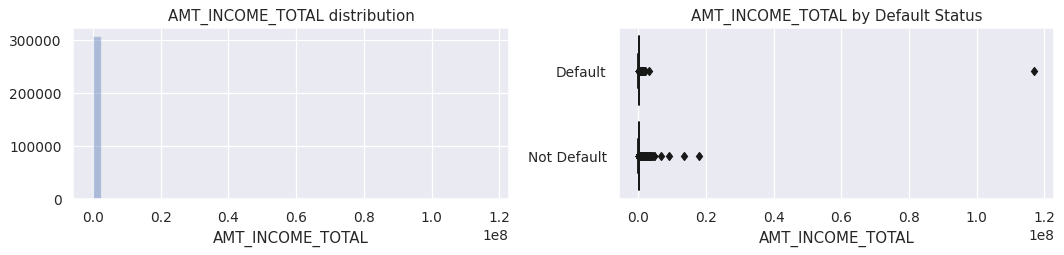

<Figure size 720x216 with 0 Axes>

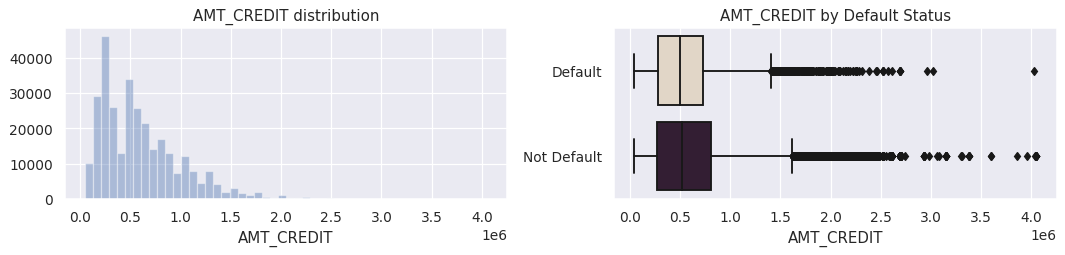

<Figure size 720x216 with 0 Axes>

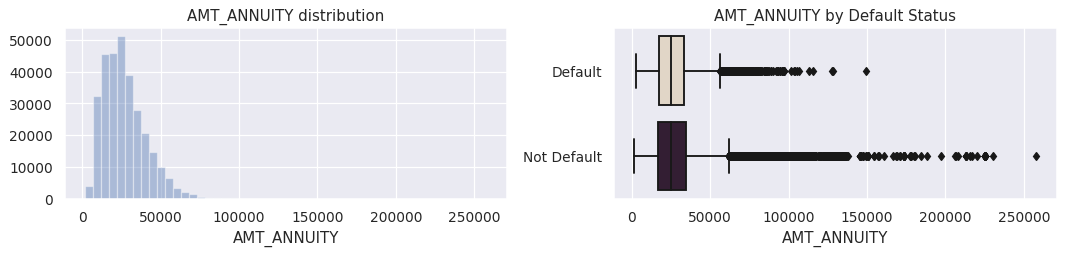

<Figure size 720x216 with 0 Axes>

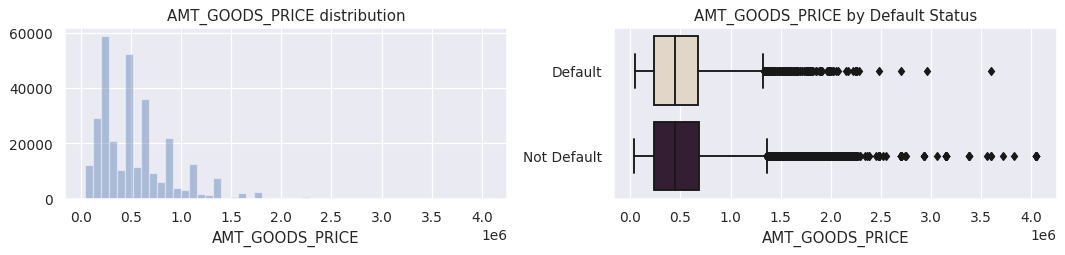

<Figure size 720x216 with 0 Axes>

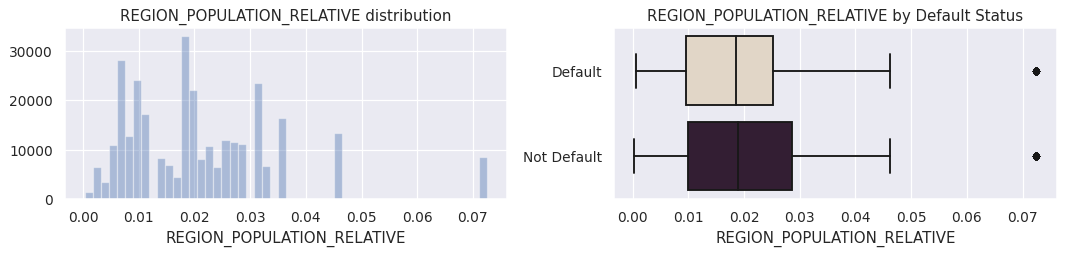

<Figure size 720x216 with 0 Axes>

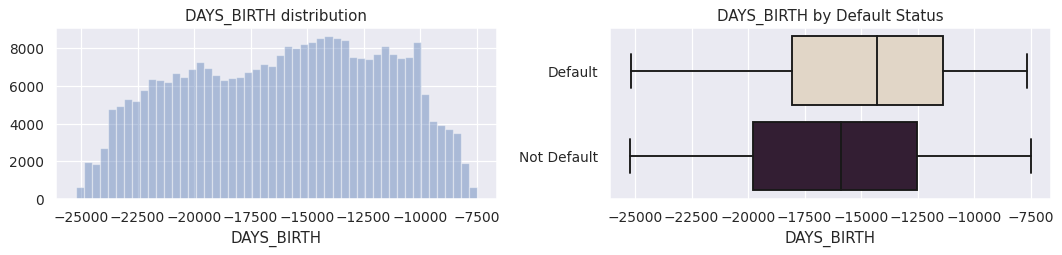

<Figure size 720x216 with 0 Axes>

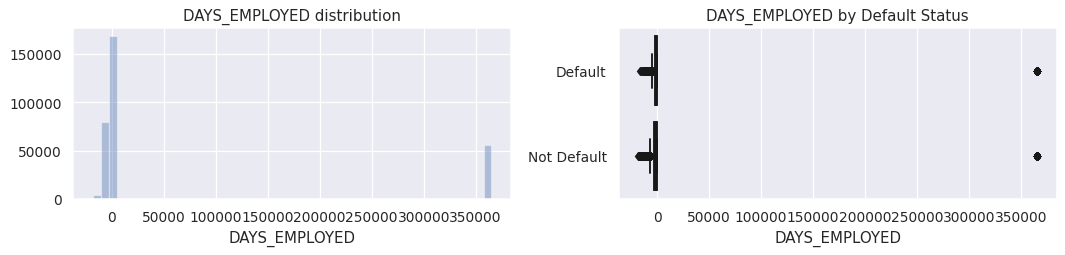

<Figure size 720x216 with 0 Axes>

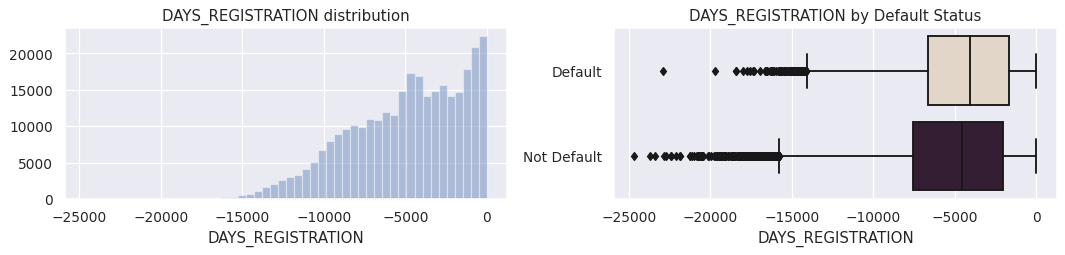

<Figure size 720x216 with 0 Axes>

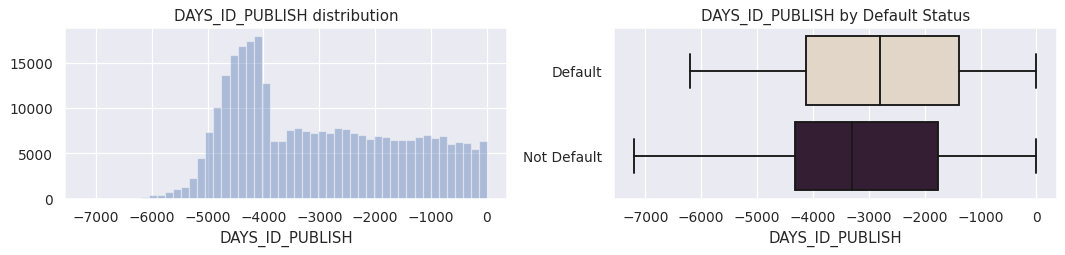

<Figure size 720x216 with 0 Axes>

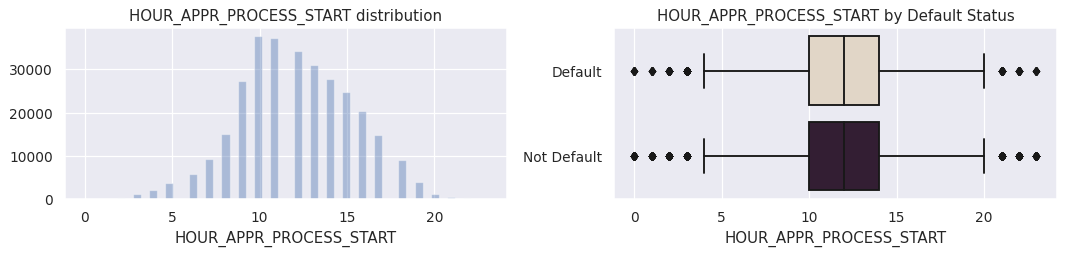

In [0]:
# Plots for 1-10 CONTINUOUS columns in app_data

for column in con_list[0:10]:
  plt.figure(figsize = (10, 3))
  continuous_variable_plot(column)
  plt.show()
  print()
  print()

In [0]:
# Observations from above plots:

# columns with skewed distribution are : "AMT_INCOME_TOTAL" , "AMT_GOODS_PRICE", "DAYS_EMPLOYED", 

# columns with uniform fare distribution : "DAYS_BIRTH", "HOUR_APPR_PROCESS_START"

# columns that are left skewed : "AMT_ANNIUITY", "AMT_CREDIT", "AMT_GOODS_PRICE"

# columns that are right skewed : "DAYS_REGISTRATION", ""

<Figure size 720x216 with 0 Axes>

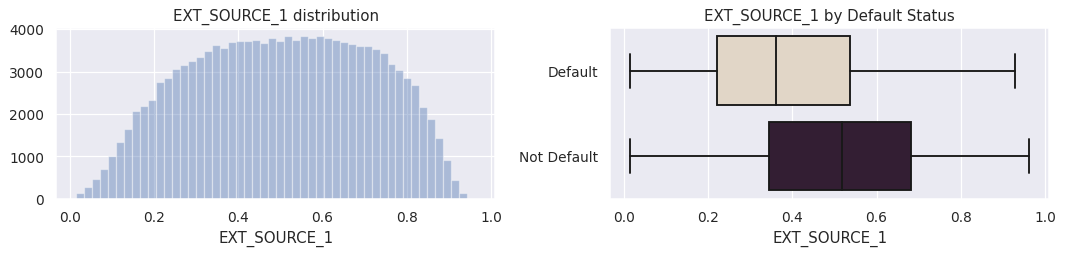

<Figure size 720x216 with 0 Axes>

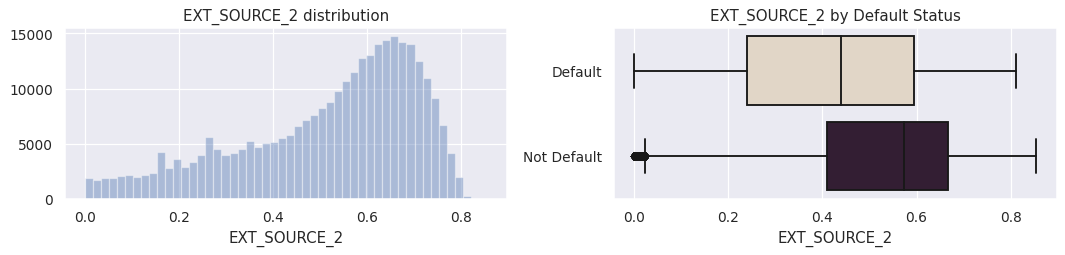

<Figure size 720x216 with 0 Axes>

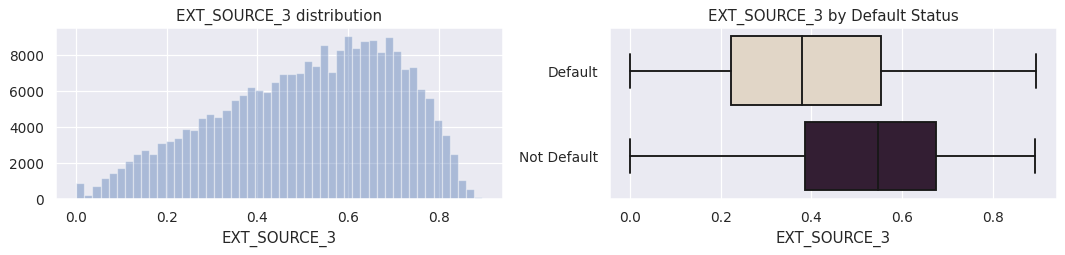

<Figure size 720x216 with 0 Axes>

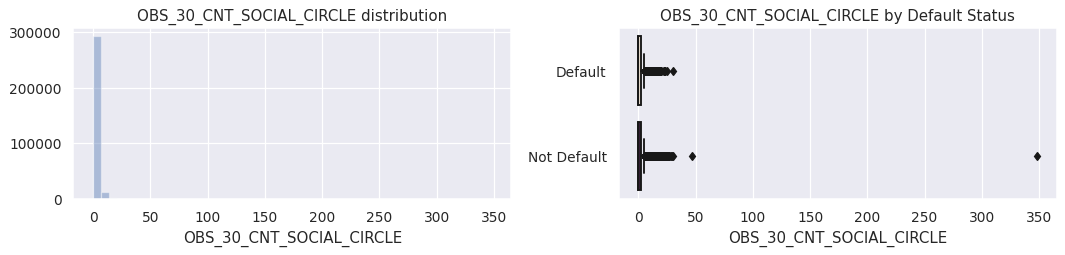

<Figure size 720x216 with 0 Axes>

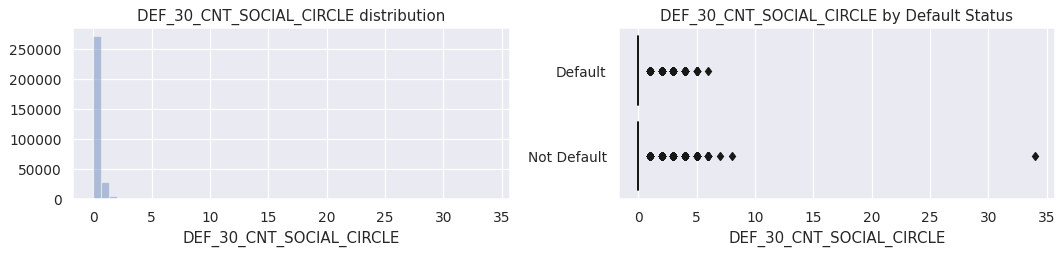

<Figure size 720x216 with 0 Axes>

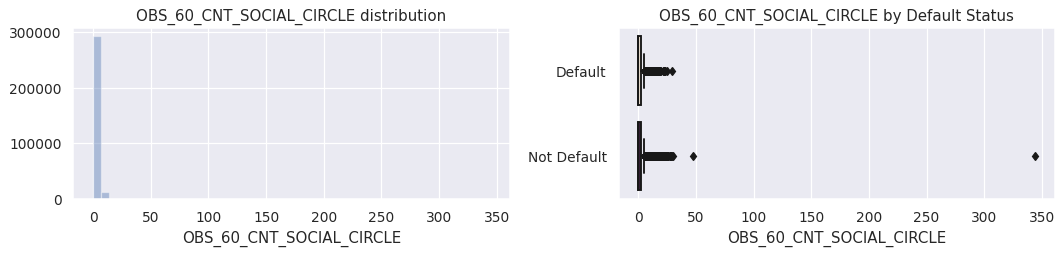

<Figure size 720x216 with 0 Axes>

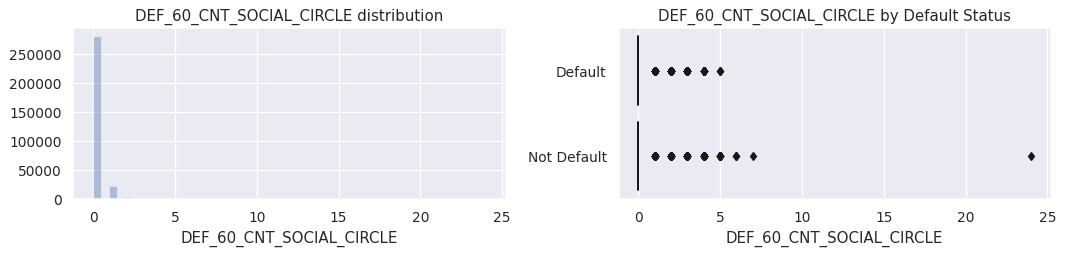

<Figure size 720x216 with 0 Axes>

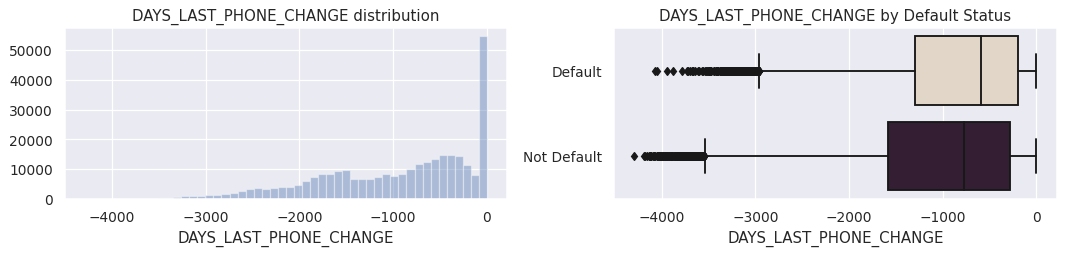

In [0]:
# Plots for 10-18 CONTINUOUS columns in app_data

for column in con_list[10:]:
  plt.figure(figsize = (10, 3))
  continuous_variable_plot(column)
  plt.show()
  print()
  print()

In [0]:
# Observations from above distribution:

# Uniform distributions have no outliers

# Distributions with outliers are skewed

# "DAYS_LAST_PHONE_CHANGE" have maximum number of inputs in with value 0
# -> indicating no change in phone for a large number of entries

In [0]:
# Categorical Variable Analysis

In [0]:
# Function for analysis of categorical columns 

def categorical_variable_plot(column):
    
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(9, 8), dpi=90)
    
    # Plot without default status
    
    sns.countplot(x = app_data.loc[app_data[column].notnull(), column], ax=ax1)
    plt.xticks(rotation = 45)
    ax1.set_title(column +" distribution")
    ax1.set_xlabel(column)
    ax1.set_ylabel('')
    

    # Plot with default status
    
    data = app_data.groupby(column)['TARGET_CATEGORICAL'].value_counts().to_frame('proportion').reset_index()        
    sns.barplot(x = column, y = 'proportion', hue= "TARGET_CATEGORICAL", data = data, saturation=1, ax=ax2)
    ax2.set_ylabel('Default status')
    ax2.set_title('Default Status distribution')
    plt.xticks(rotation = 45)
    ax2.set_xlabel(column)
    
    plt.tight_layout()
    print()
    print()

<Figure size 648x576 with 0 Axes>

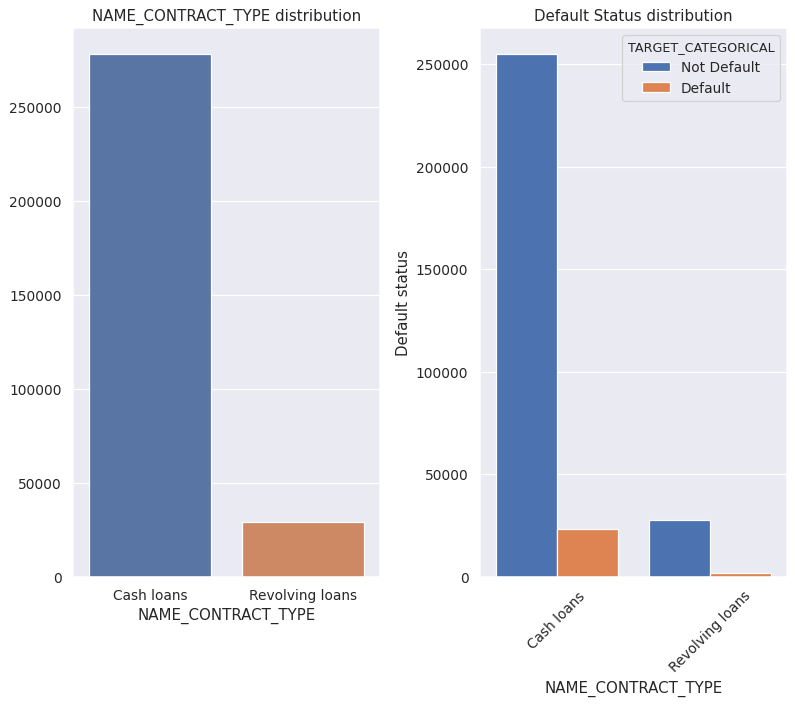

<Figure size 648x576 with 0 Axes>

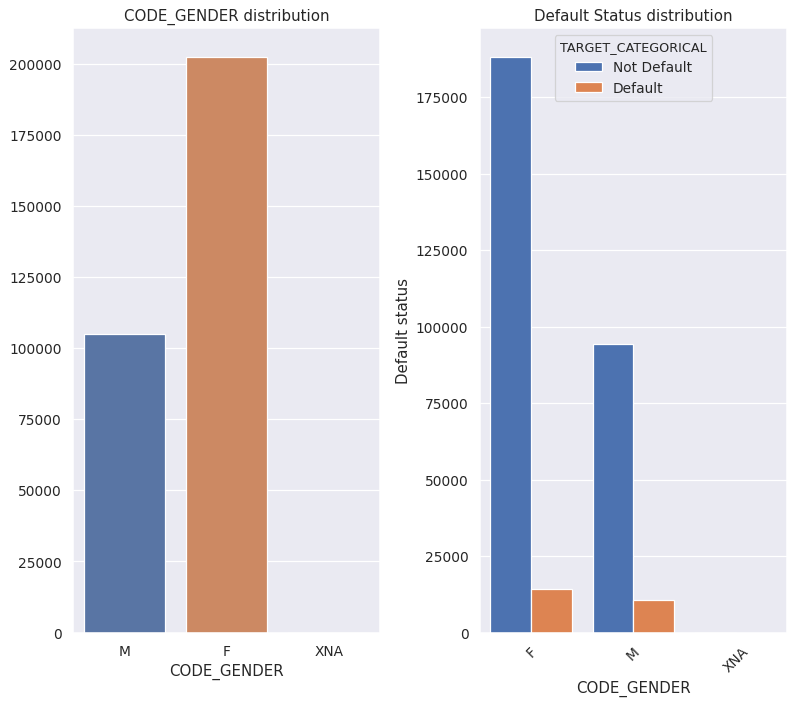

<Figure size 648x576 with 0 Axes>

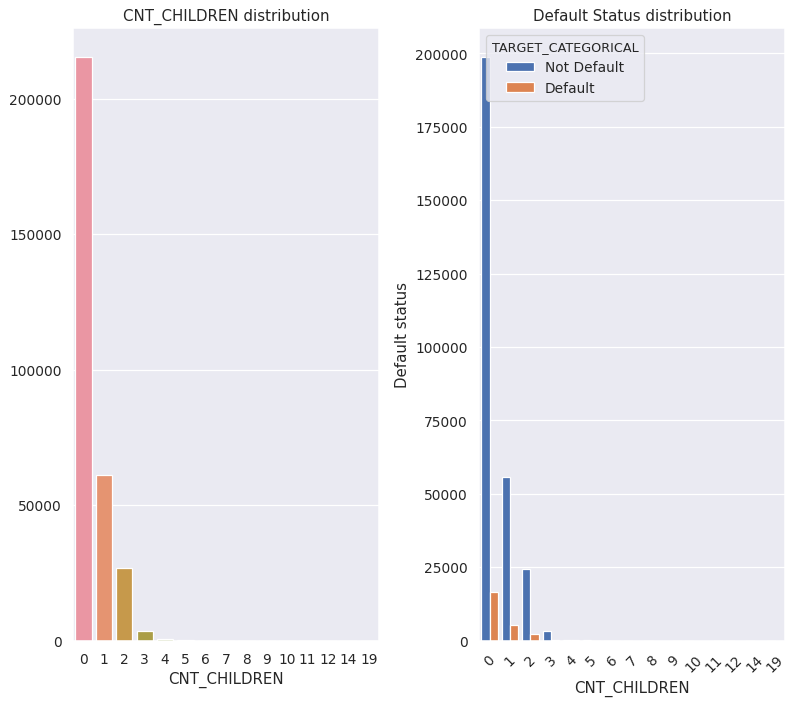

<Figure size 648x576 with 0 Axes>

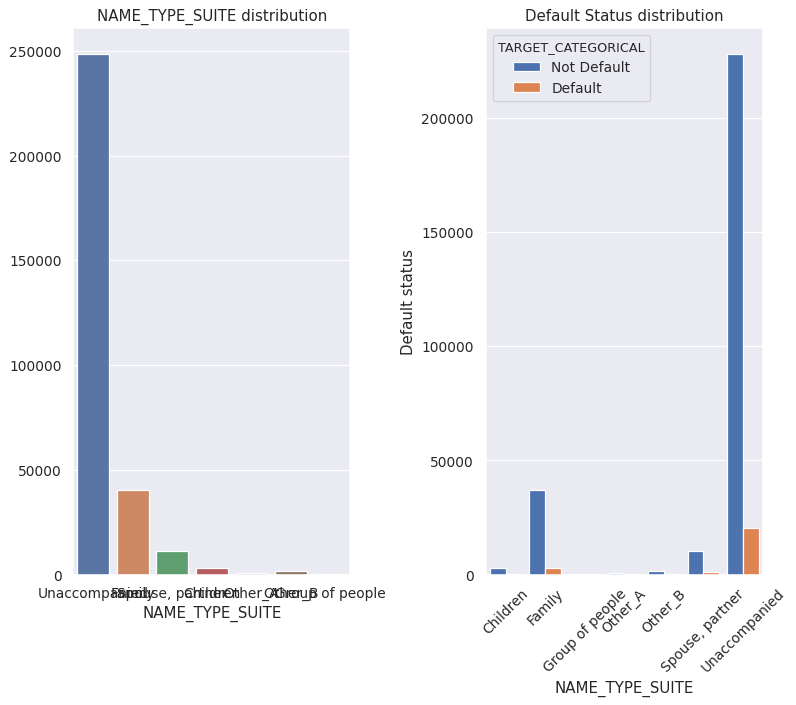

<Figure size 648x576 with 0 Axes>

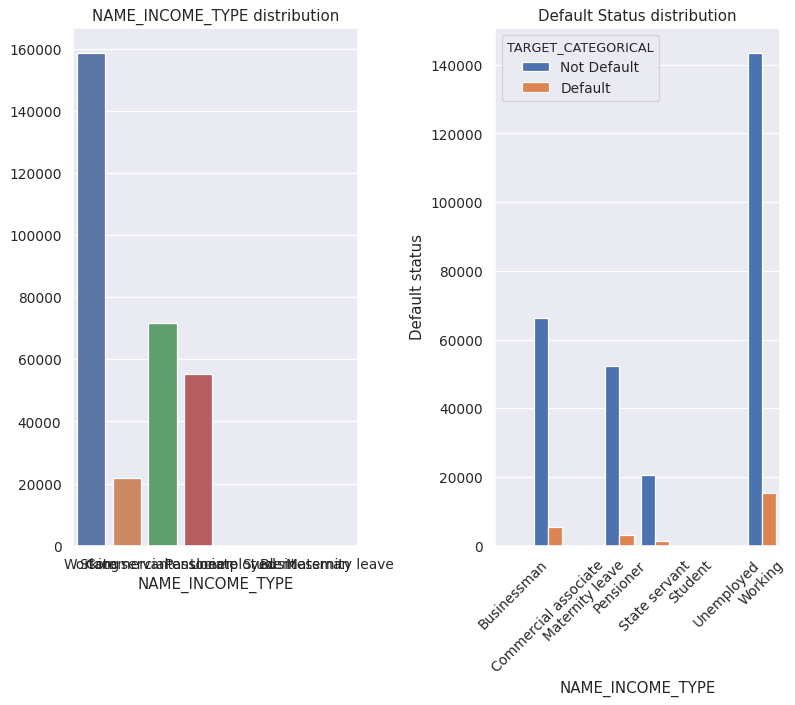

<Figure size 648x576 with 0 Axes>

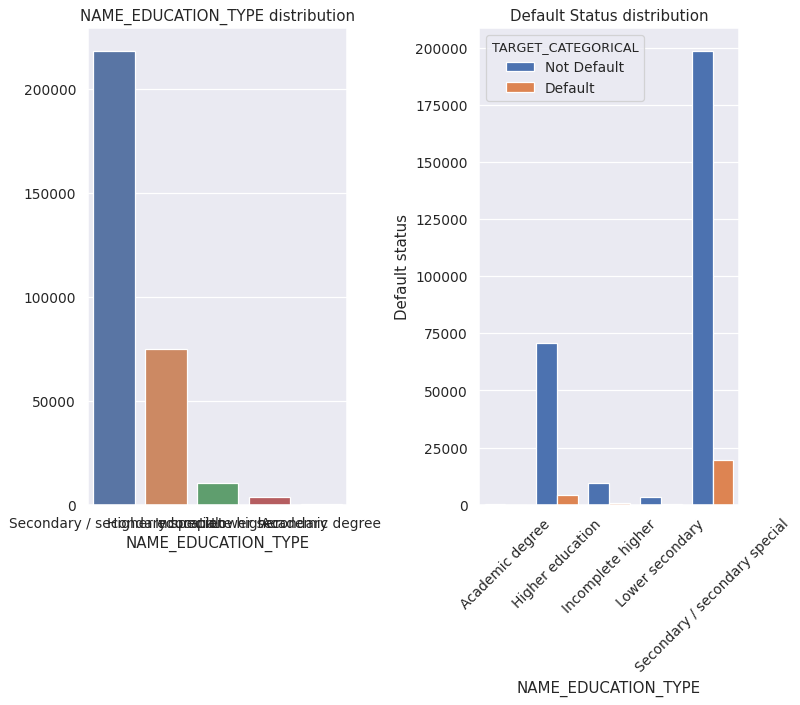

<Figure size 648x576 with 0 Axes>

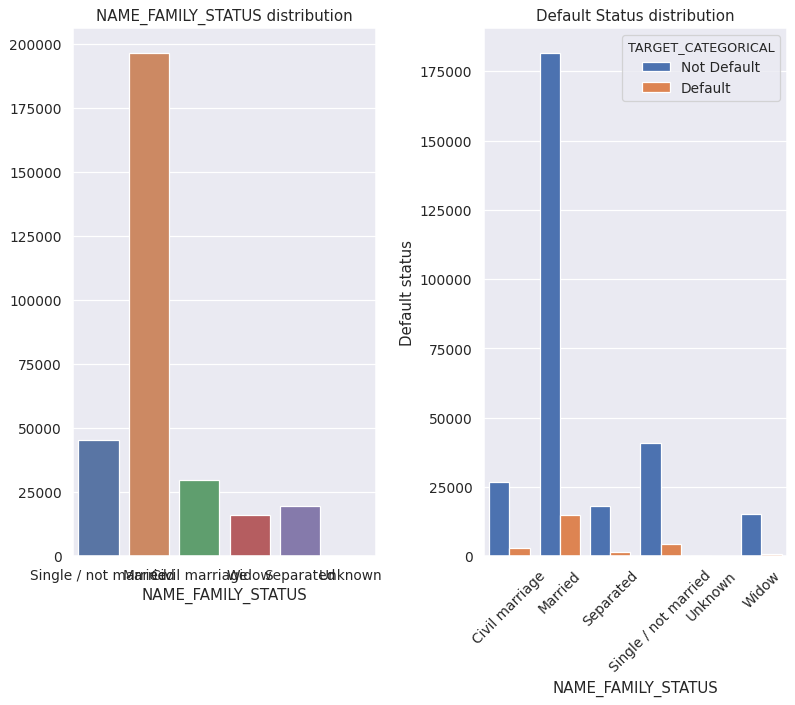

In [0]:
# Analyzing first 1-7 columns in catogorical columns list for app_data

for column in cat_list[0:7]:
  plt.figure(figsize = (9, 8))
  categorical_variable_plot(column)
  plt.show()
  print()
  print()

<Figure size 648x576 with 0 Axes>

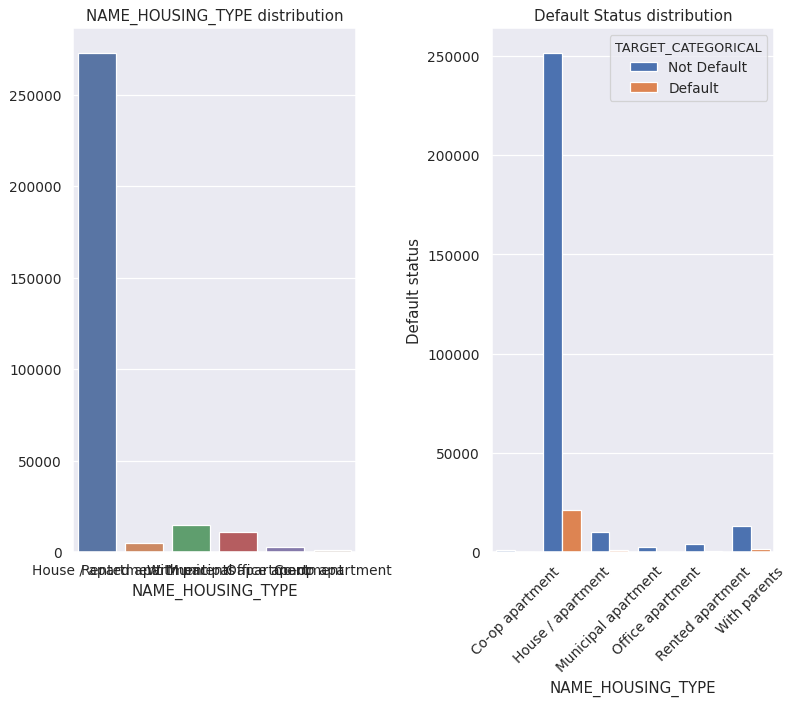

<Figure size 648x576 with 0 Axes>

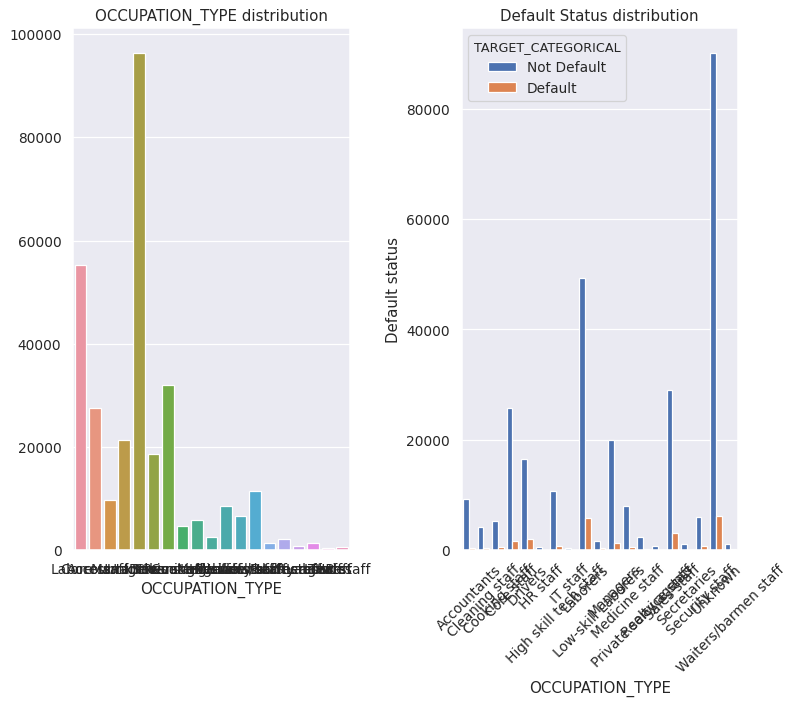

<Figure size 648x576 with 0 Axes>

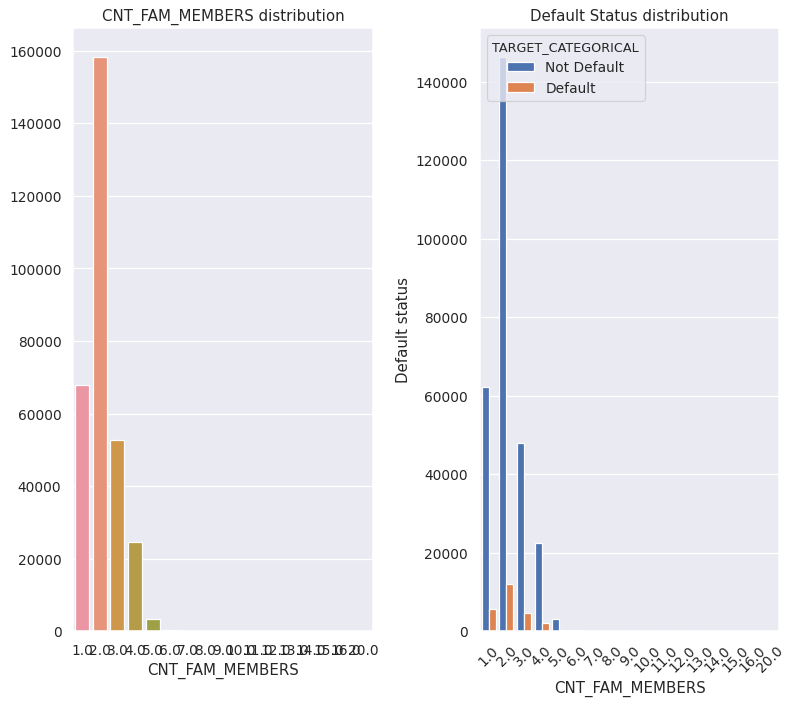

<Figure size 648x576 with 0 Axes>

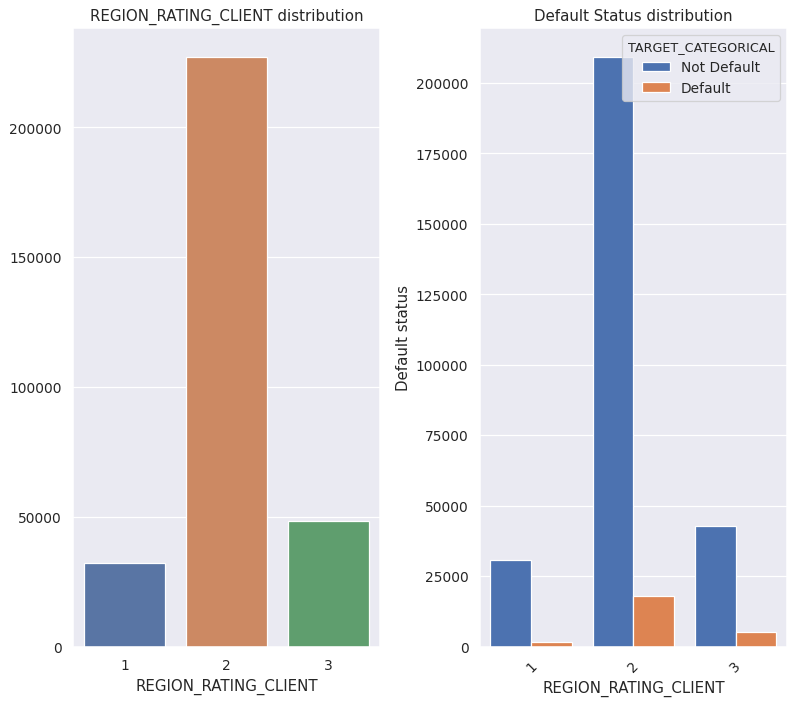

<Figure size 648x576 with 0 Axes>

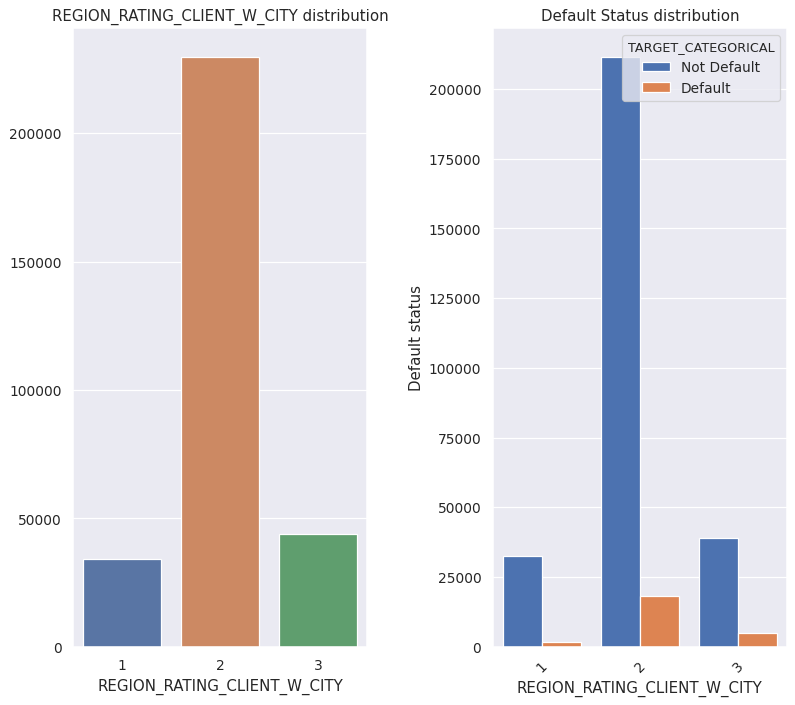

<Figure size 648x576 with 0 Axes>

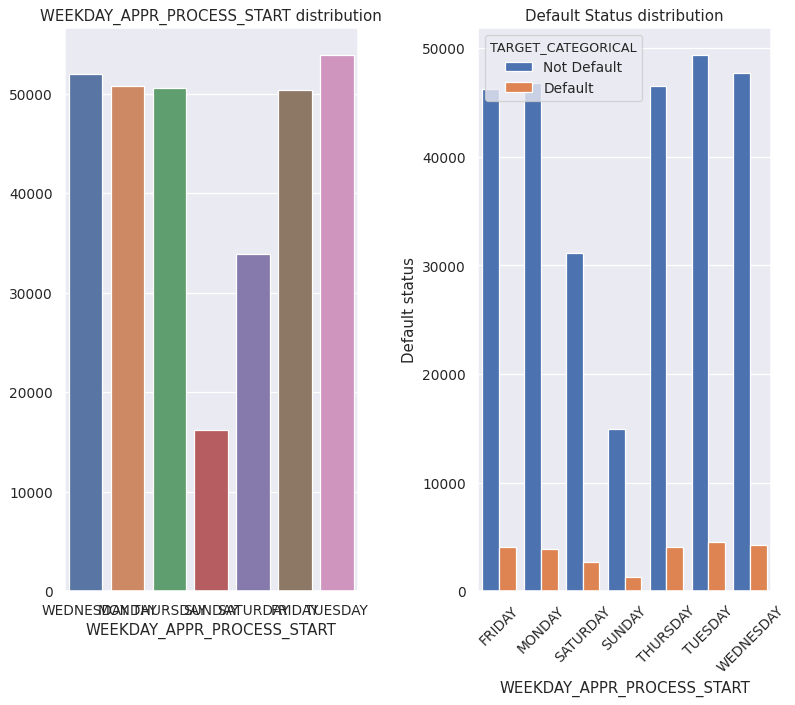

<Figure size 648x576 with 0 Axes>

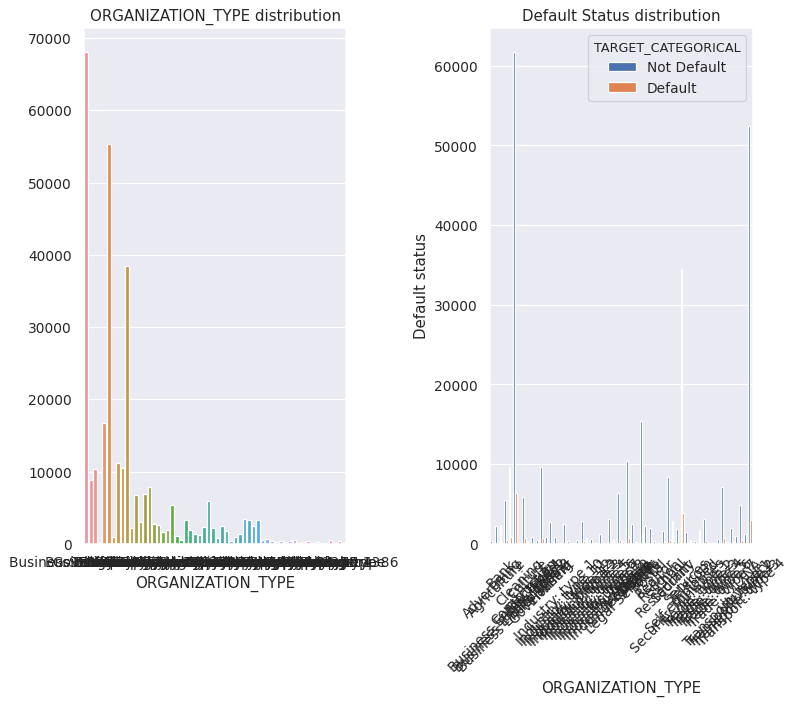

In [0]:
# Analyzing first 7-14 columns in catogorical columns list for app_data

for column in cat_list[7:]:
  plt.figure(figsize = (9, 8))
  categorical_variable_plot(column)
  plt.show()
  print()
  print()

In [0]:
# Flag Categorical variables

In [0]:
def categorical_flag_variable_plot(column):
    
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,4), dpi=90)
    
    # Plot without default status
    
    sns.countplot(x = app_data.loc[app_data[column].notnull(), column], ax=ax1)
    #plt.xticks(rotation = 45)
    ax1.set_title(column +" distribution")
    ax1.set_xlabel(column)
    ax1.set_ylabel('')
    

    # Plot with default status
    
    data = app_data.groupby(column)['TARGET_CATEGORICAL'].value_counts().to_frame('proportion').reset_index()        
    sns.barplot(x = column, y = 'proportion', hue= "TARGET_CATEGORICAL", data = data, saturation=1, ax=ax2)
    ax2.set_ylabel('Default status')
    ax2.set_title('Default Status distribution')
    #plt.xticks(rotation = 45)
    ax2.set_xlabel(column)
    
    plt.tight_layout()
    print()
    print()

<Figure size 720x216 with 0 Axes>

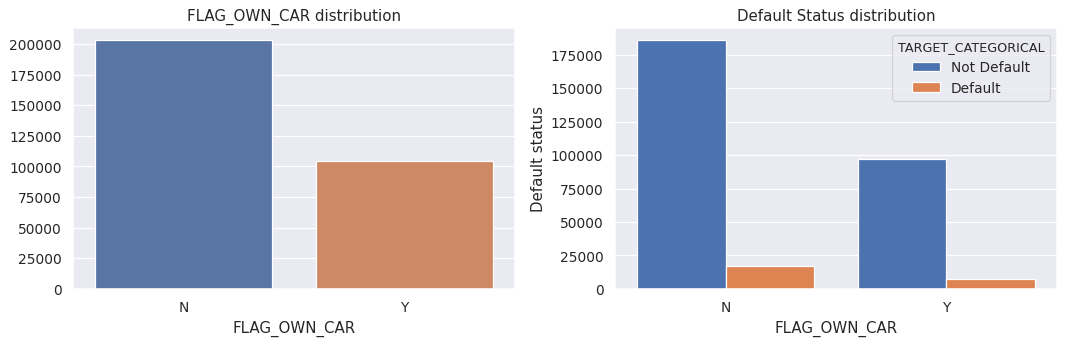

<Figure size 720x216 with 0 Axes>

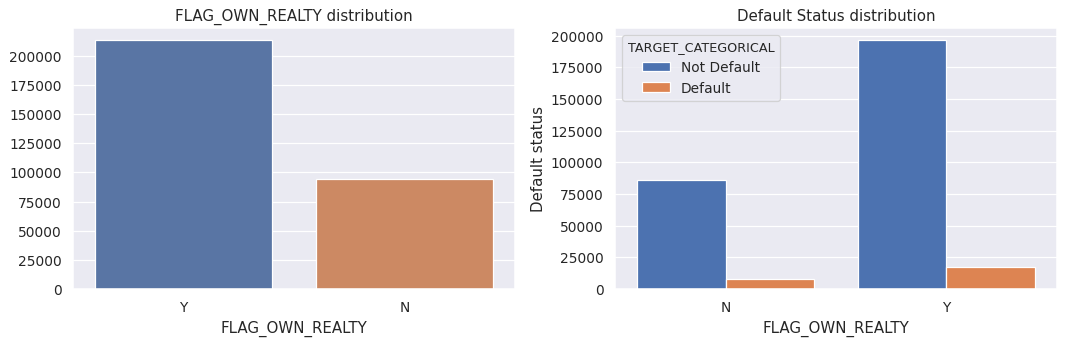

<Figure size 720x216 with 0 Axes>

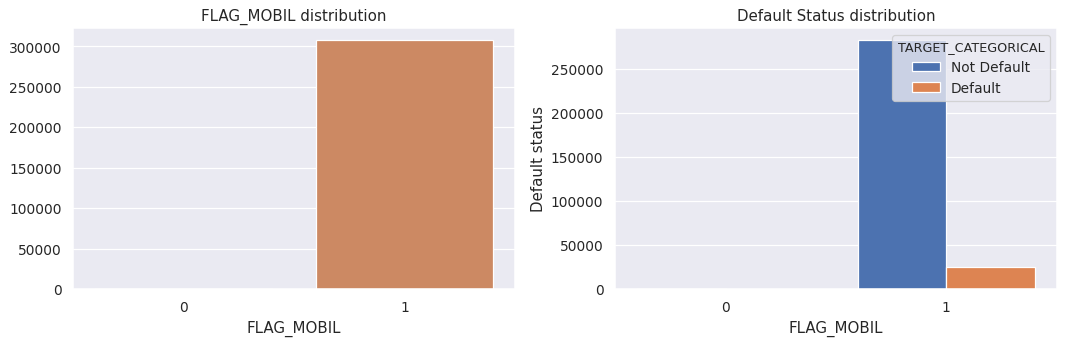

<Figure size 720x216 with 0 Axes>

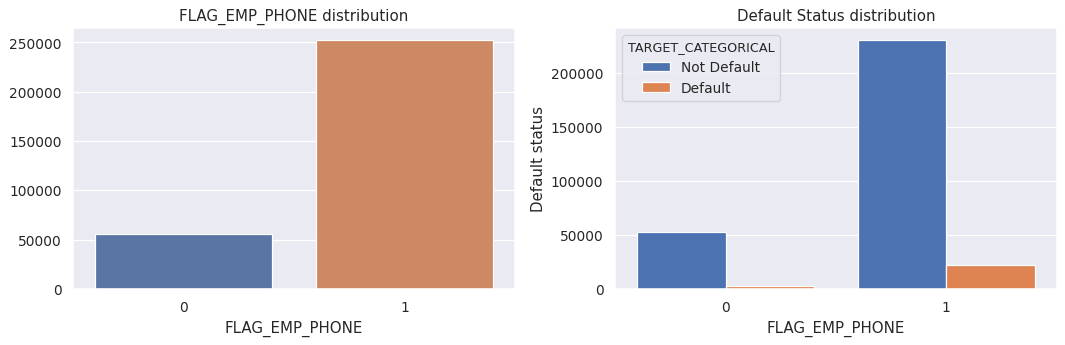

<Figure size 720x216 with 0 Axes>

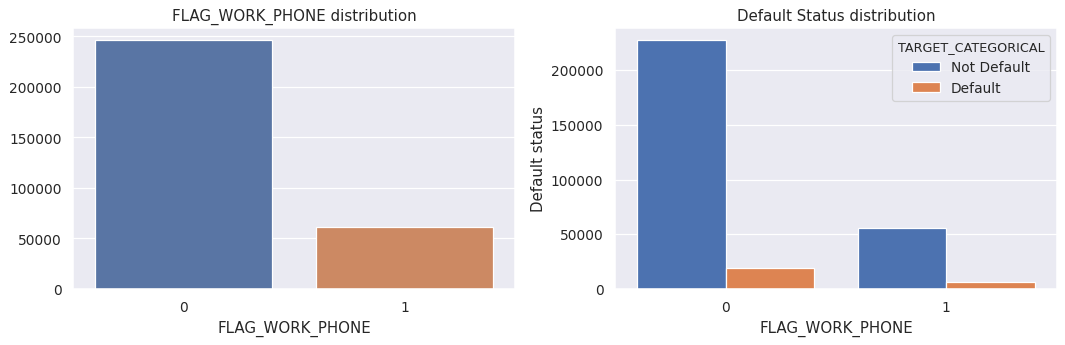

<Figure size 720x216 with 0 Axes>

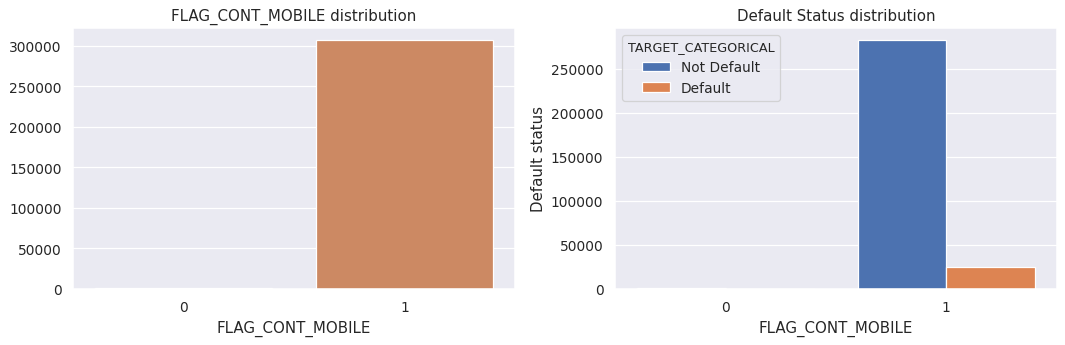

<Figure size 720x216 with 0 Axes>

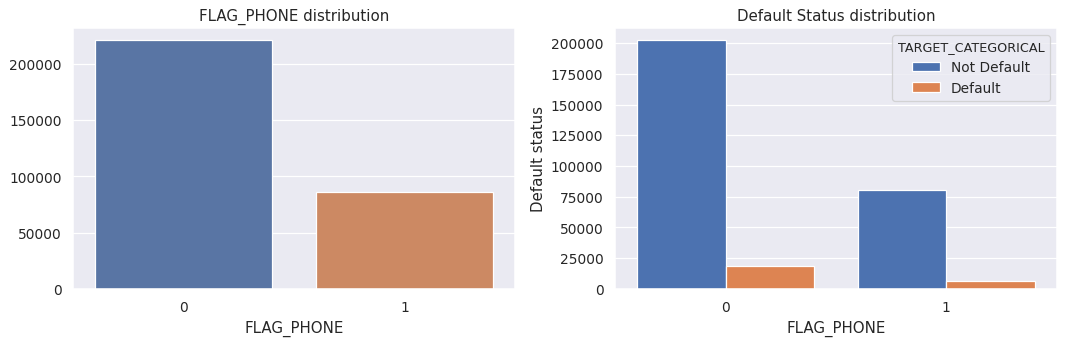

In [0]:
# Plots for 1-7 columns in the flag categorical columns list for app_data:

for column in cat_flag_list[0:7]:
  plt.figure(figsize = (10, 3))
  categorical_flag_variable_plot(column)
  plt.show()
  print()
  print()

<Figure size 720x216 with 0 Axes>

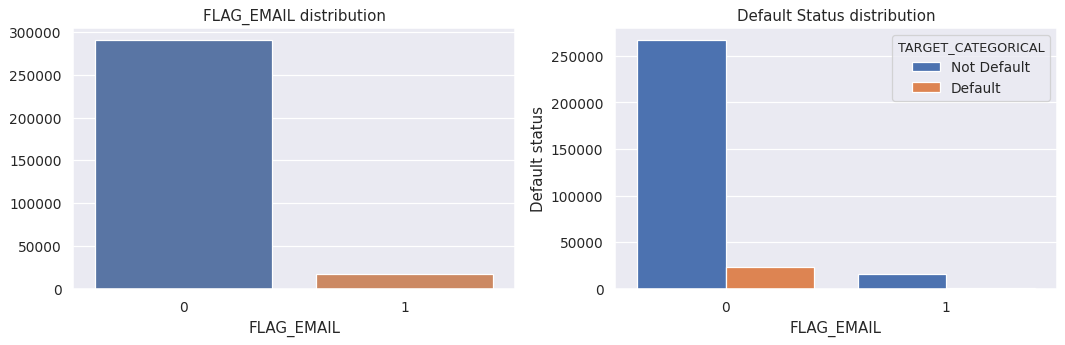

<Figure size 720x216 with 0 Axes>

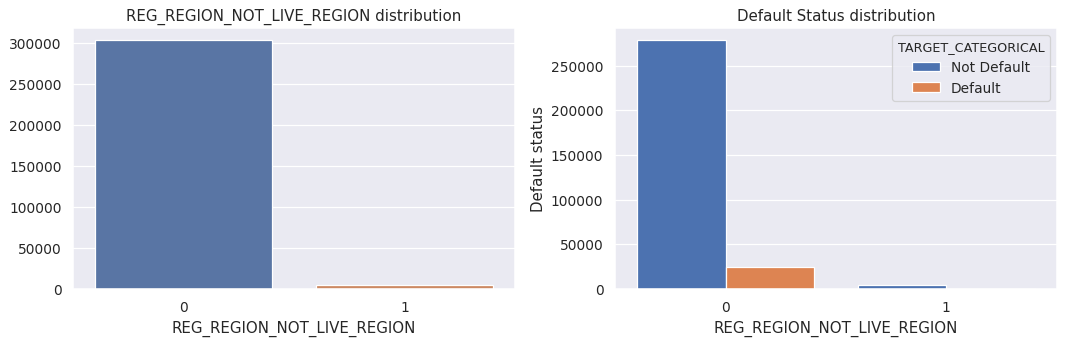

<Figure size 720x216 with 0 Axes>

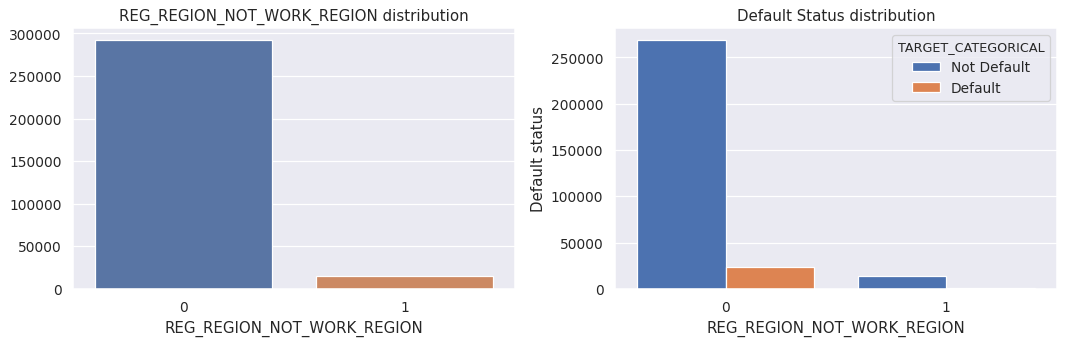

<Figure size 720x216 with 0 Axes>

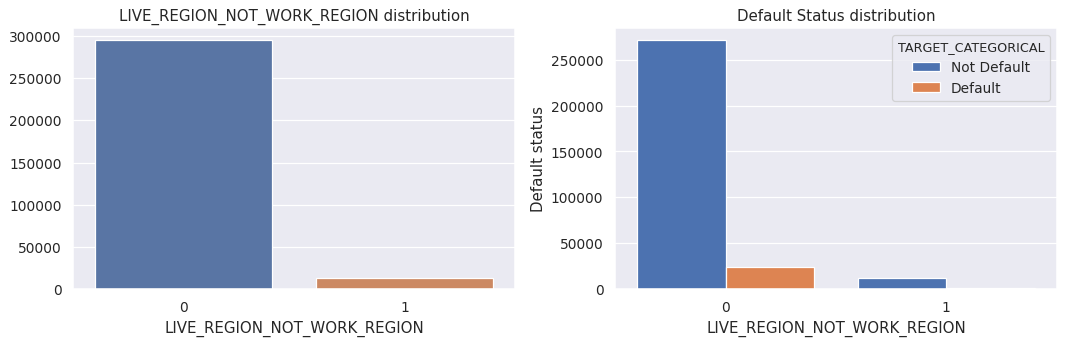

<Figure size 720x216 with 0 Axes>

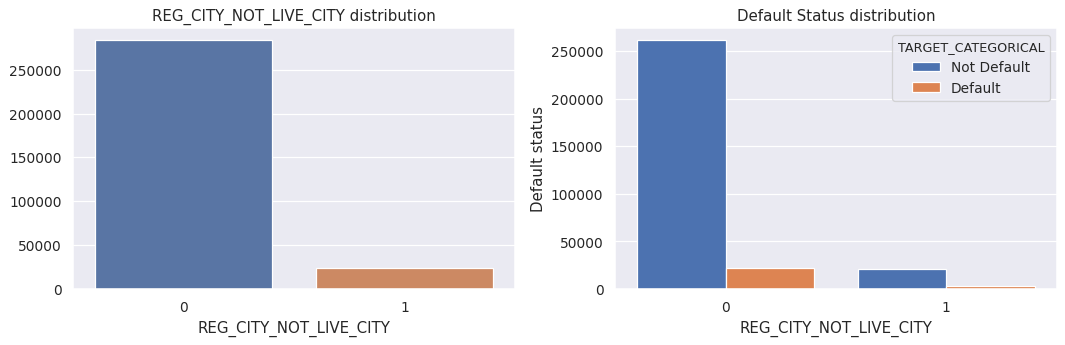

<Figure size 720x216 with 0 Axes>

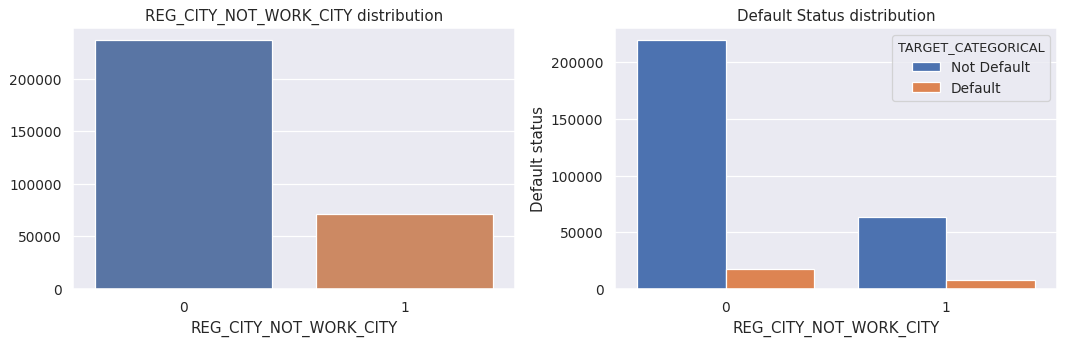

<Figure size 720x216 with 0 Axes>

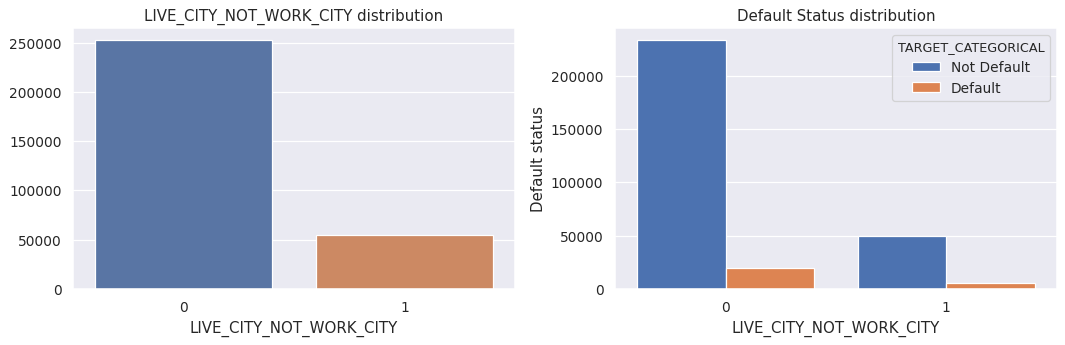

In [0]:
# Plots for 7-14 columns in the flag categorical columns list for app_data:

for column in cat_flag_list[7:]:
  plt.figure(figsize = (10, 3))
  categorical_flag_variable_plot(column)
  plt.show()
  print()
  print()

In [0]:
###### Segmenting dataset into Default and Non Deafault data separately:

In [0]:
# Creating new dataframe with "DEFAULT" category only "app_data_defaulter"

app_data_defaulter = app_data[app_data["TARGET"] == 1].copy()

In [0]:
# Creating new dataframe with "NON DEFAULT" category only "app_data_non_defaulter"

app_data_non_defaulter = app_data[app_data["TARGET"] == 0].copy()

In [0]:
app_data_defaulter.shape 

# 24825 rows for "DEFAULT" category

(24825, 49)

In [0]:
app_data_non_defaulter.shape

# 282686 rows for "NON DEFAULT" category

(282686, 49)

In [0]:
# Analysis of "DEFAULT" data only:

# In the following plots data from "app_data_defaulter" has been used.
# 

In [0]:
# First "Continuous" columns have been analyzed followed by "Categorical" columns

In [0]:
# Function to analyze CONTINUOUS columns on the Segmented data

def continuous_variable_plot_default(column):    
    # Plot without default status
    plt.figure(figsize = (10, 5))
    sns.distplot(a = app_data_defaulter.loc[app_data_defaulter[column].notnull(), column], hist = True, kde = False)
    plt.title(column)
    plt.xlabel("")
    plt.ylabel("")

<Figure size 720x216 with 0 Axes>

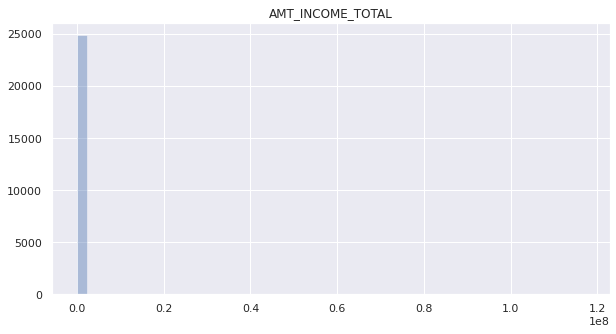

<Figure size 720x216 with 0 Axes>

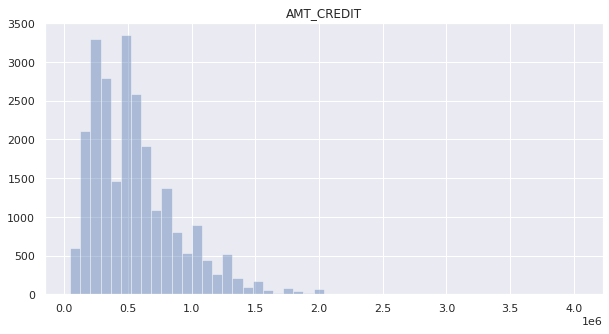

<Figure size 720x216 with 0 Axes>

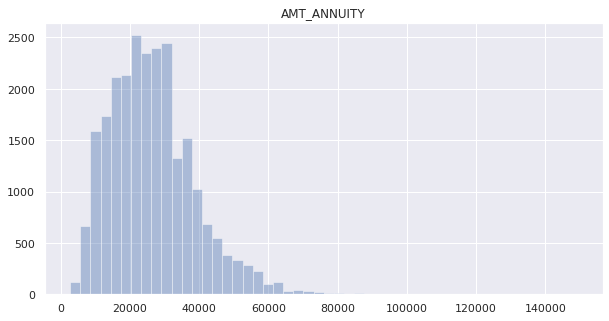

<Figure size 720x216 with 0 Axes>

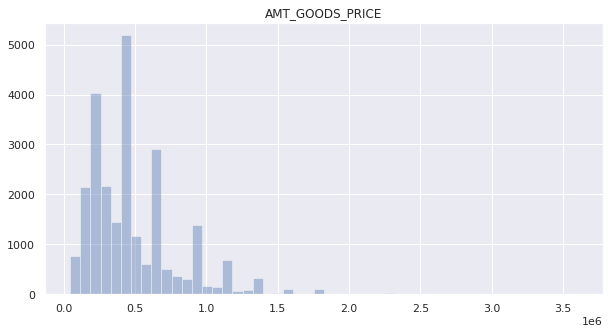

<Figure size 720x216 with 0 Axes>

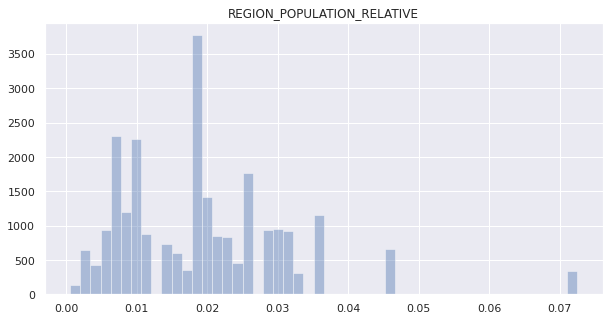

In [0]:
# Plots for 1-5 Continuous columns on segmented data

for column in con_list[0:5]: 
  plt.figure(figsize= (10, 3))
  continuous_variable_plot_default(column)
  plt.show()
  print()
  print()

In [0]:
# Observations from above distribution:

# "REGION_POPULATION_RELATIVE" has values 0.00 - 0.02 where maximum defaulter lie
# "AMT_GOODS_PRICE" have low value for defaulters -> graph is left skewed
# "AMT_ANNUITY" has in range 0-60000 for defaulters -> defaulters have low annuity
# "AMOUNT_CREDIT" is low in case of defaulters

<Figure size 720x216 with 0 Axes>

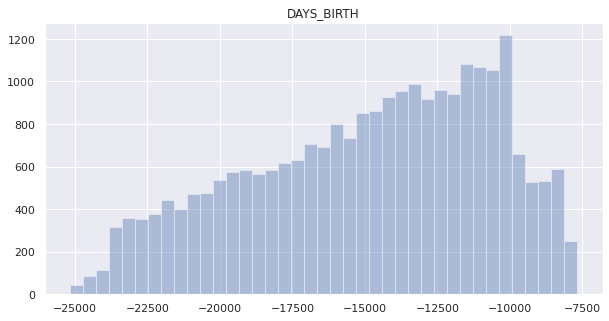

<Figure size 720x216 with 0 Axes>

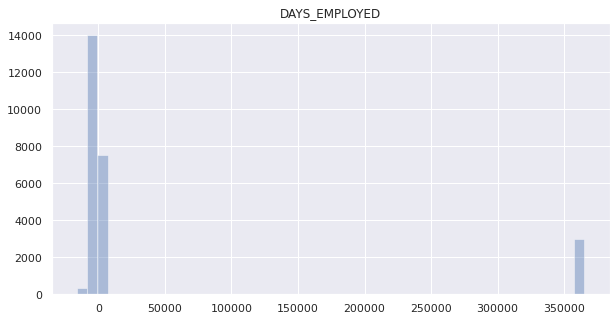

<Figure size 720x216 with 0 Axes>

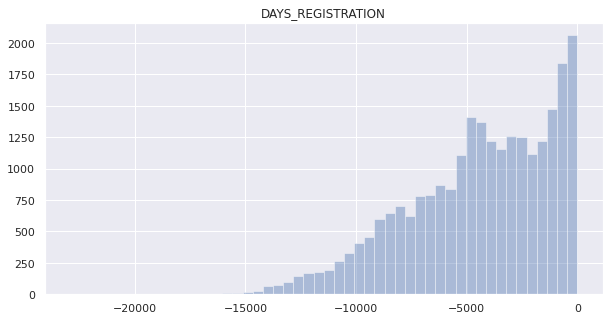

<Figure size 720x216 with 0 Axes>

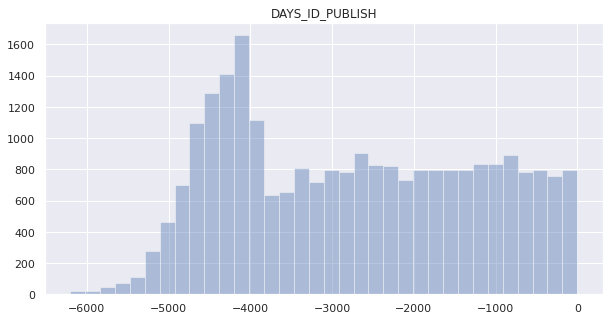

<Figure size 720x216 with 0 Axes>

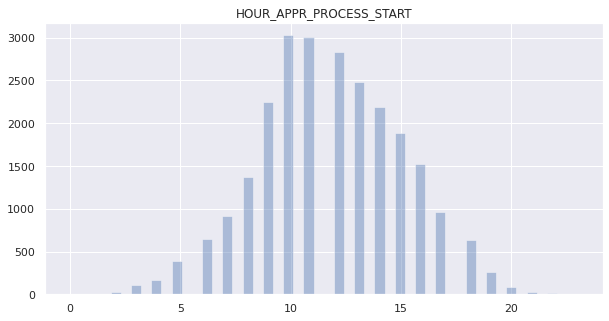

In [0]:
# Plots for 5-10 Continuous columns on segmented data

for column in con_list[5:10]:
  plt.figure(figsize= (10, 3))
  continuous_variable_plot_default(column)
  plt.show()
  print()
  print()

In [0]:
# Observations from above plots:

#"DAYS_EMPLOYED" has high number in low values -> Defaulters are ones with low employment, 

# Who are not employed continuously are more likely to be defaulters.



<Figure size 720x216 with 0 Axes>

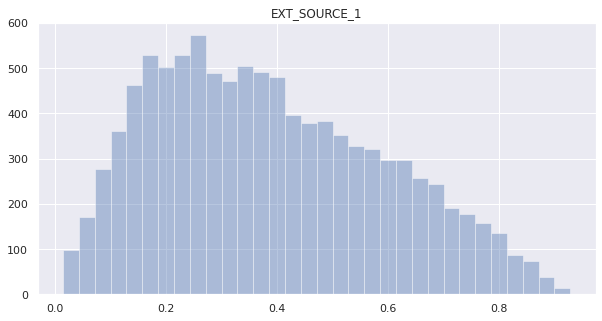

<Figure size 720x216 with 0 Axes>

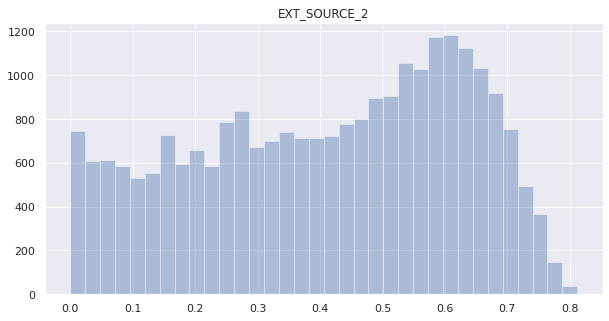

<Figure size 720x216 with 0 Axes>

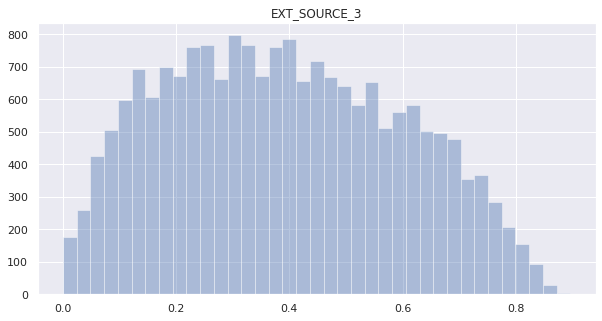

<Figure size 720x216 with 0 Axes>

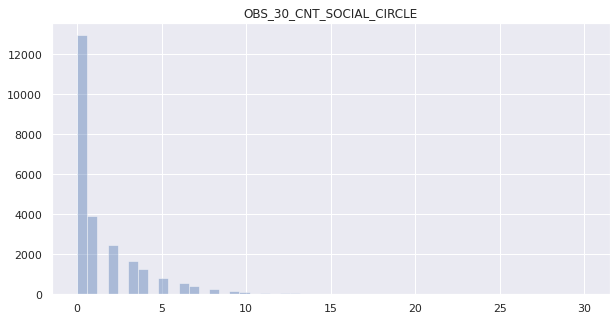

<Figure size 720x216 with 0 Axes>

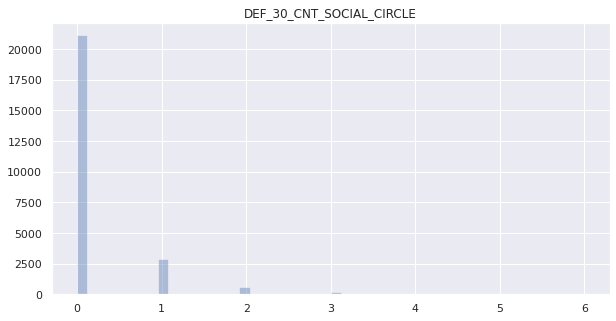

<Figure size 720x216 with 0 Axes>

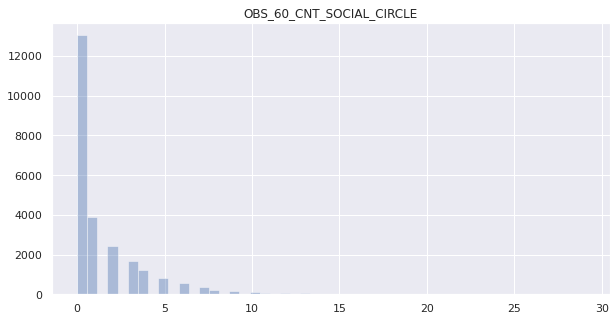

<Figure size 720x216 with 0 Axes>

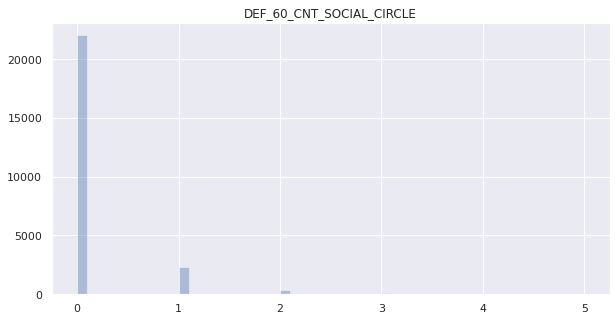

<Figure size 720x216 with 0 Axes>

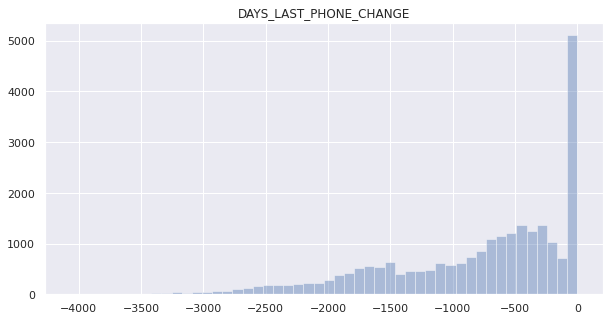

In [0]:
# Plots for 10-18 Continuous columns on segmented data

for column in con_list[10:]:
  plt.figure(figsize= (10, 3))
  continuous_variable_plot_default(column)
  plt.show()
  print()
  print()

In [0]:
# Observations from above analysis:

# "DEF_30_CNT_SOCIAL_CIRCLE"  and "DEF_60_CNT_SOCIAL_CIRCLE "value is 0 for maximum defaulters 
#-> this implies in the last 60 days data, defaulters neighbours did not default

# "OBS_30_CNT_SOCIAL_CIRCLE" and "OBS_60_CNT_SOCIAL_CIRCLE"value is 0 for maximum cases
# -> observable days past due for defaulters neighbours in less in last 60 days data

# "EXT_SOURCE_1", "EXT_SOURCE_2" and "EXT_SOURCE_3" is fairly uniform in case of defaulters.

In [0]:
# Analysis of Catogorical columns of the segmented data:

In [0]:
# Function to analyze CATEGORICAL columns on segmented data

def categorical_variable_plot_default(column):    
    # Plot without default status
    plt.figure(figsize = (10, 5))
    sns.countplot(app_data_defaulter.loc[app_data_defaulter[column].notnull(), column])
    plt.xticks(rotation = 45)
    plt.title(column)
    plt.xlabel("")
    plt.ylabel("")

<Figure size 720x216 with 0 Axes>

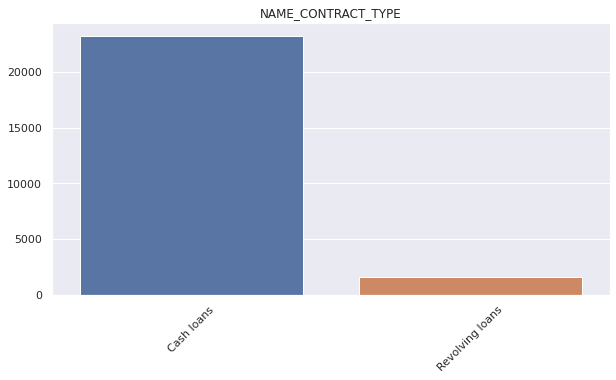

<Figure size 720x216 with 0 Axes>

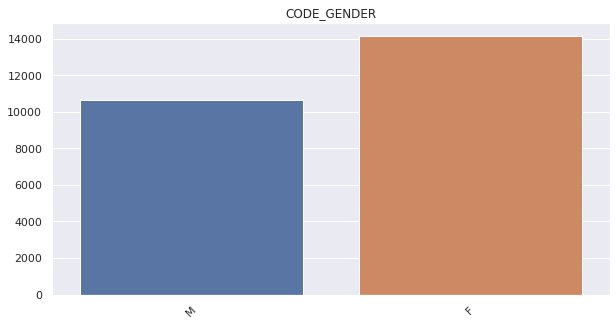

<Figure size 720x216 with 0 Axes>

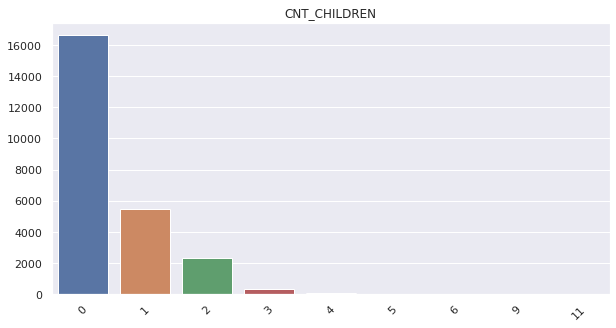

<Figure size 720x216 with 0 Axes>

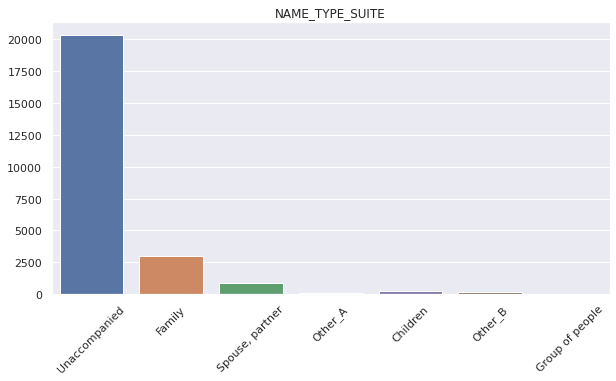

<Figure size 720x216 with 0 Axes>

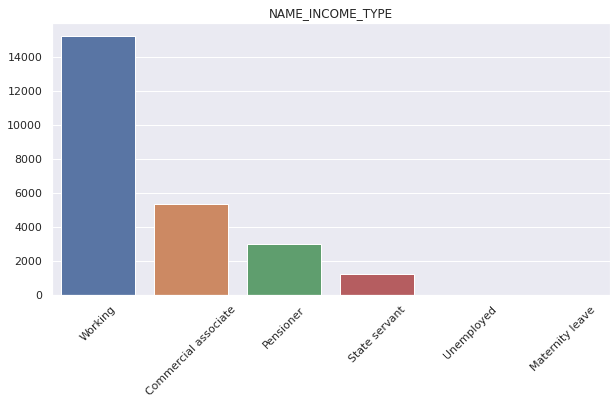

<Figure size 720x216 with 0 Axes>

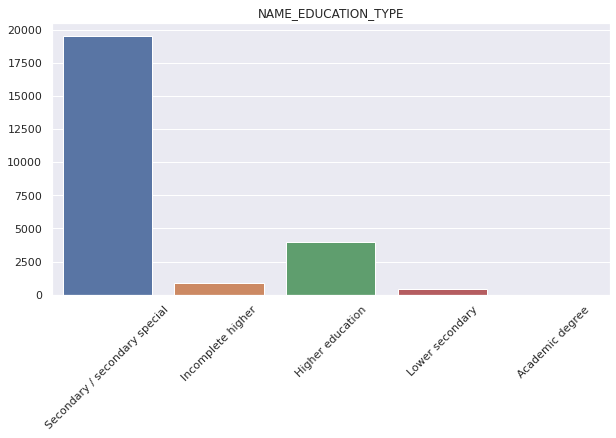

<Figure size 720x216 with 0 Axes>

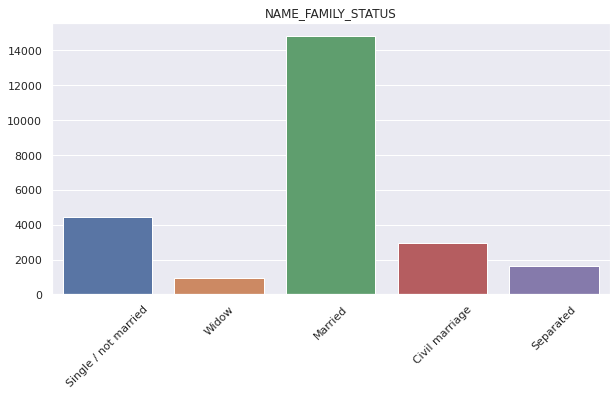

In [0]:
# Plots for 1-7 Categorical columns on segmented data

for column in cat_list[0:7]:
  plt.figure(figsize= (10, 3))
  categorical_variable_plot_default(column)
  plt.show()
  print()
  print()

In [0]:
# Observation from above analysis on Segmented data :


# "Married" status people are more likely to default 

# "Secondary/secondary special" people are most likely to default according to our data

# "Working" people have maximum count in case of defaulters : This may be result of data non uniformity 

# "Gender" doesn't affect the tendency to default.

# People with no children have defaulted most.

# "CONTRACT_TYPE" as Cash loans have more number of defaulters

<Figure size 720x216 with 0 Axes>

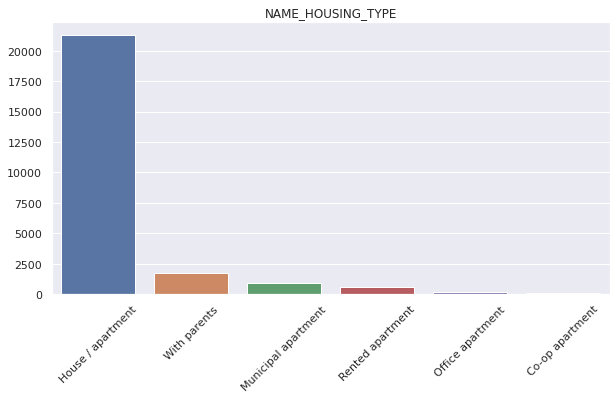

<Figure size 720x216 with 0 Axes>

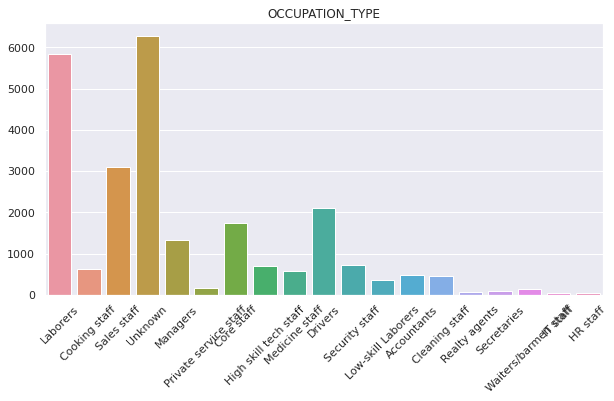

<Figure size 720x216 with 0 Axes>

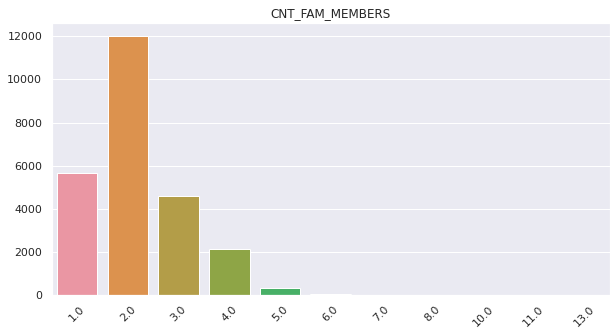

<Figure size 720x216 with 0 Axes>

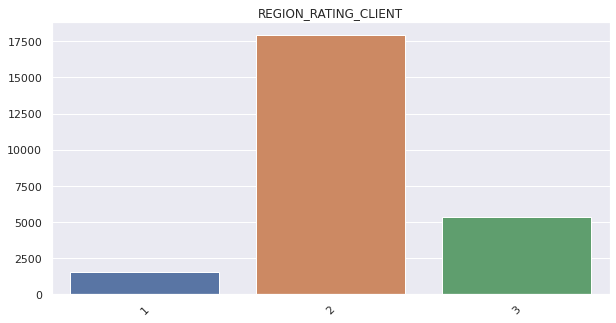

<Figure size 720x216 with 0 Axes>

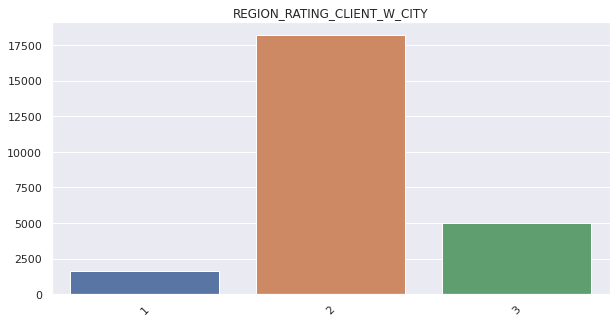

<Figure size 720x216 with 0 Axes>

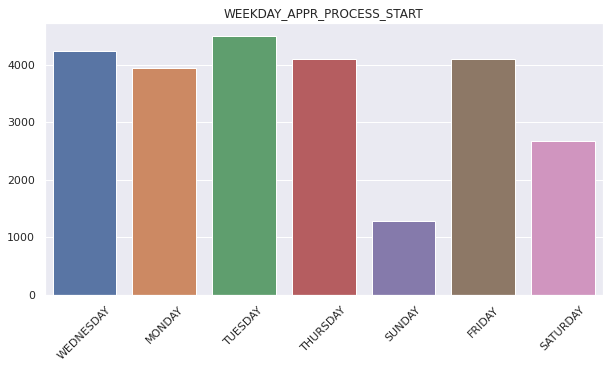

<Figure size 720x216 with 0 Axes>

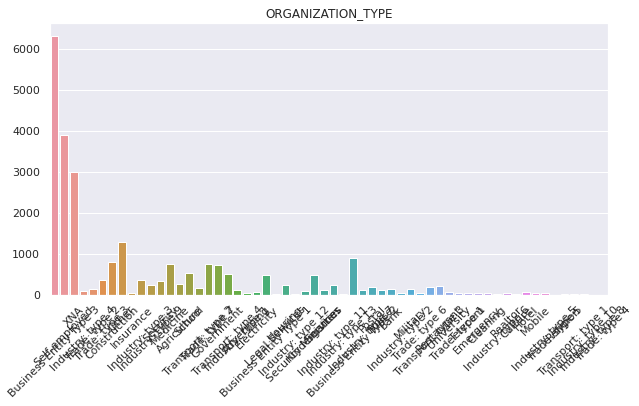

In [0]:
 # Plots for 7-14 Categorical columns on segmented data

for column in cat_list[7:]:
  plt.figure(figsize= (10, 3))
  categorical_variable_plot_default(column)
  plt.show()
  print()
  print()

In [0]:
# Observation from above plots on segmented data:

# Weekday dose't matter in the tendency to default
# "REGION_RATING_CLIENT_W_CITY" as 2 has maximum default tendency to default
# "REGION_RATING_CLIENT" as 2 also has maximum tendency to default
# Laboures and Sales staff account for maximum number of defaulters
# "Unknown" occupation type also has more defaulters
 
# People with their own houses and apartments also are seen more to default

# Observations can be baised if their is a larger proportion of input that is of the same type.

In [0]:
## All insights from the data is mentioned after each analysis in all categories.

In [0]:
# Analysis of Non default data:

In [0]:
# Function to plot continuous variable of the non default data

def continuous_variable_plot_non_default(column):    
    # Plot without default status
    plt.figure(figsize = (10, 5))
    sns.distplot(a = app_data_non_defaulter.loc[app_data_non_defaulter[column].notnull(), column], hist = True, kde = False)
    plt.title(column)
    plt.xlabel("")
    plt.ylabel("")

<Figure size 720x216 with 0 Axes>

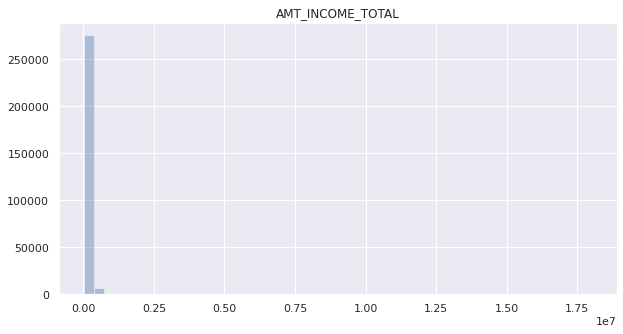

<Figure size 720x216 with 0 Axes>

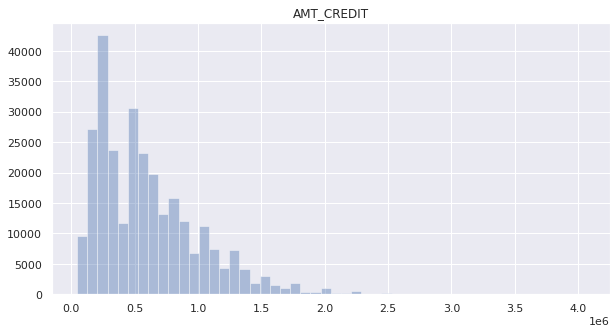

<Figure size 720x216 with 0 Axes>

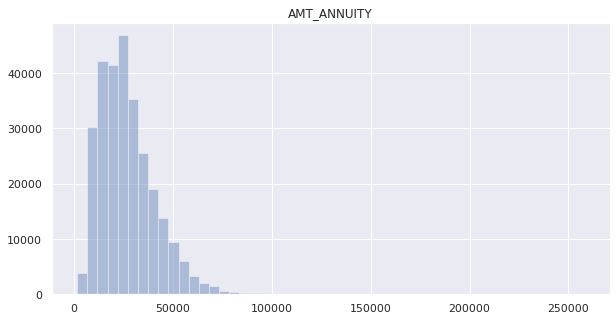

<Figure size 720x216 with 0 Axes>

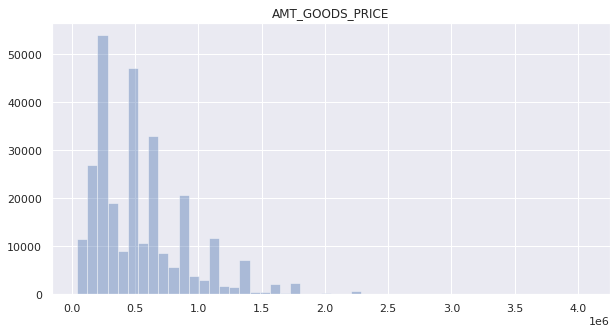

<Figure size 720x216 with 0 Axes>

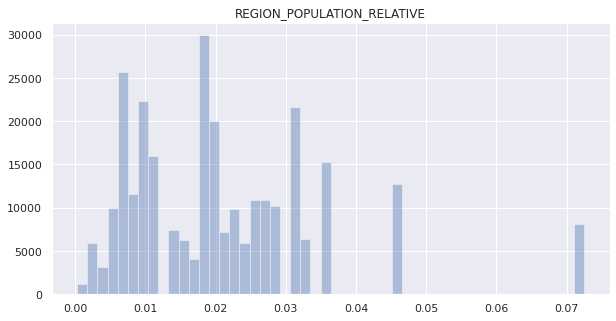

<Figure size 720x216 with 0 Axes>

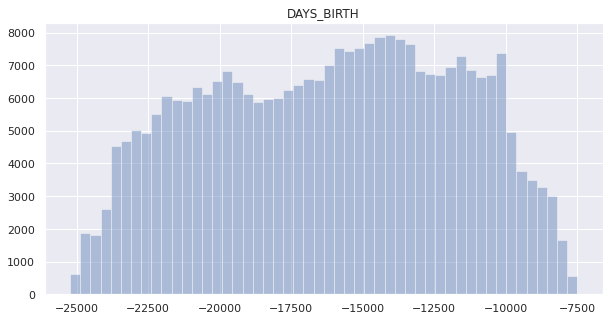

<Figure size 720x216 with 0 Axes>

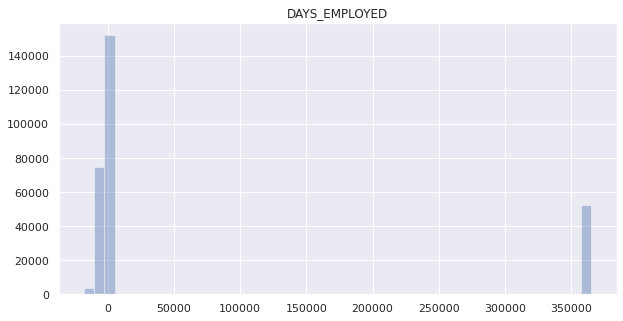

<Figure size 720x216 with 0 Axes>

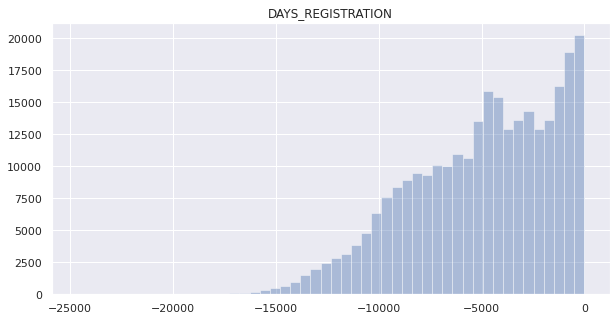

<Figure size 720x216 with 0 Axes>

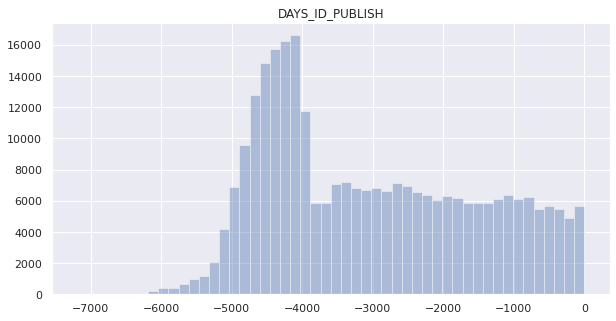

<Figure size 720x216 with 0 Axes>

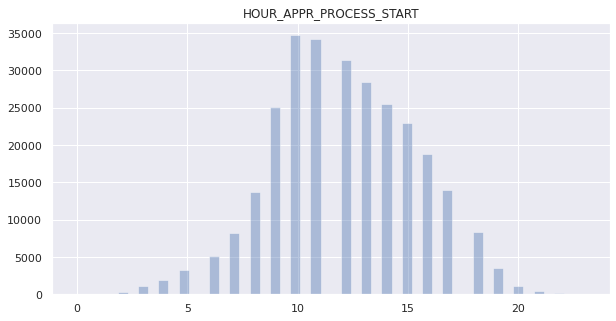

In [0]:
# Plot columns 1-10 Of Continuous type in the Non default data segment

for column in con_list[0:10]:
  plt.figure(figsize= (10, 3))
  continuous_variable_plot_non_default(column)
  plt.show()
  print()
  print()

<Figure size 720x216 with 0 Axes>

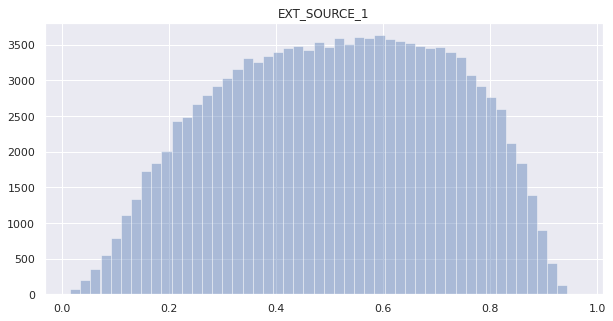

<Figure size 720x216 with 0 Axes>

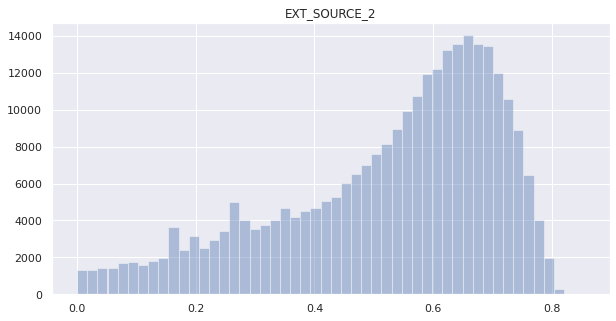

<Figure size 720x216 with 0 Axes>

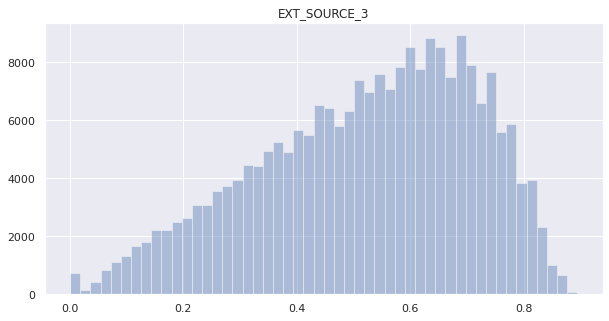

<Figure size 720x216 with 0 Axes>

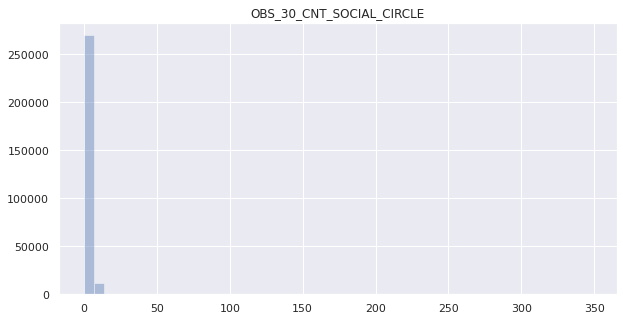

<Figure size 720x216 with 0 Axes>

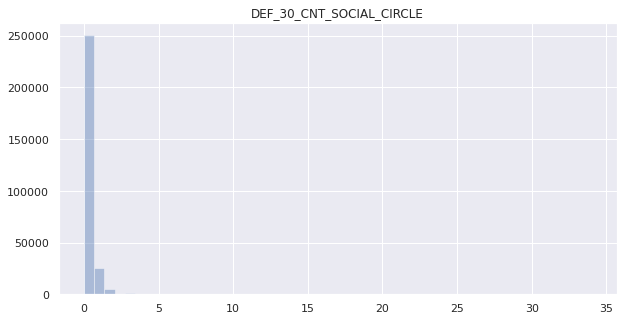

<Figure size 720x216 with 0 Axes>

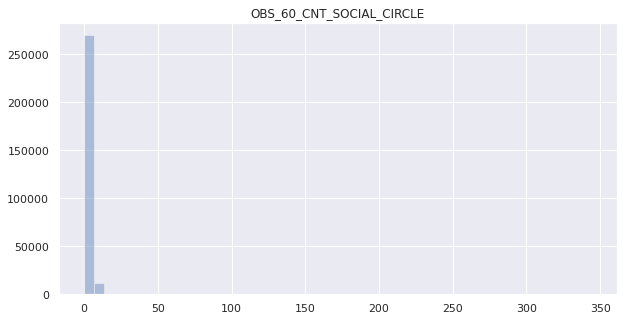

<Figure size 720x216 with 0 Axes>

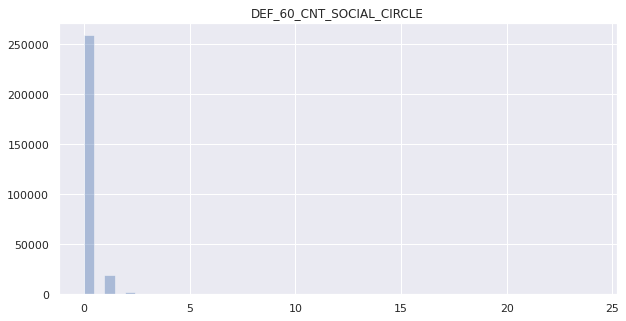

<Figure size 720x216 with 0 Axes>

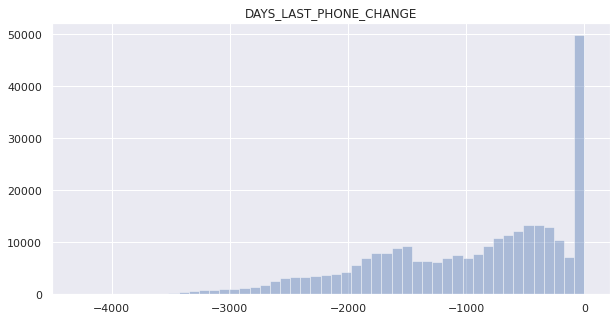

In [0]:
# Plot columns 10-18 Of Continuous type in the Non default data segment

for column in con_list[10:]:
  plt.figure(figsize= (10, 3))
  continuous_variable_plot_non_default(column)
  plt.show()
  print()
  print()

In [0]:
# Function to plot continuous variable of the non default data

def categorical_variable_plot_non_default(column):    
    # Plot without default status
    plt.figure(figsize = (10, 5))
    sns.countplot(app_data_non_defaulter.loc[app_data_non_defaulter[column].notnull(), column])
    plt.xticks(rotation = 45)
    plt.title(column)
    plt.xlabel("")
    plt.ylabel("")

<Figure size 720x216 with 0 Axes>

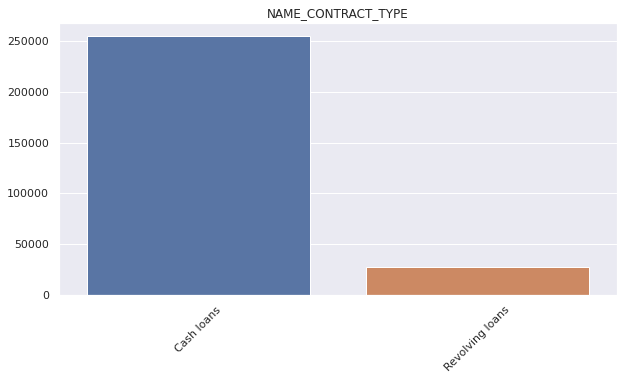

<Figure size 720x216 with 0 Axes>

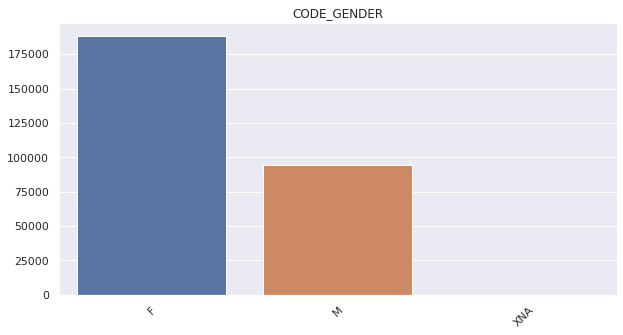

<Figure size 720x216 with 0 Axes>

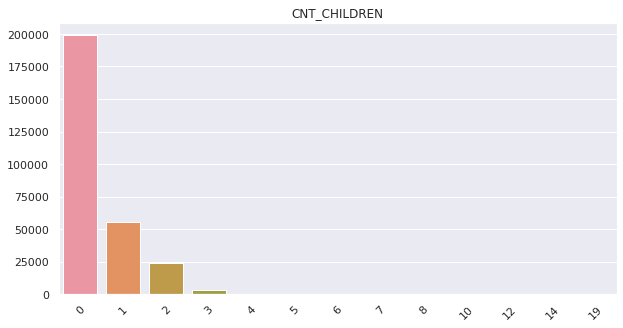

<Figure size 720x216 with 0 Axes>

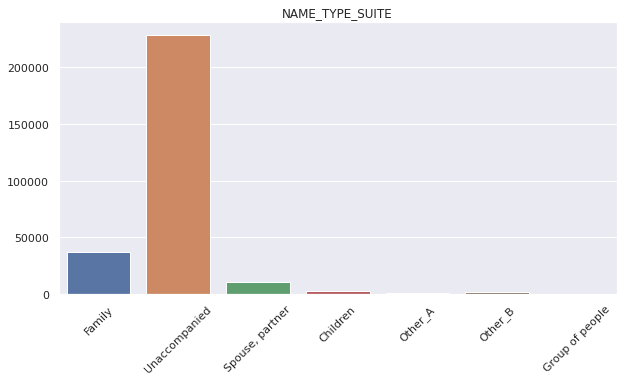

<Figure size 720x216 with 0 Axes>

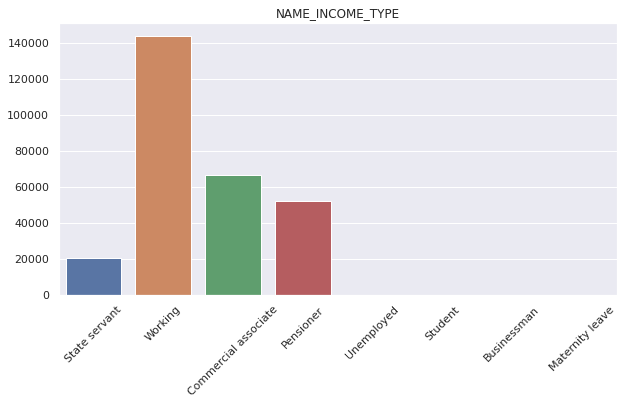

<Figure size 720x216 with 0 Axes>

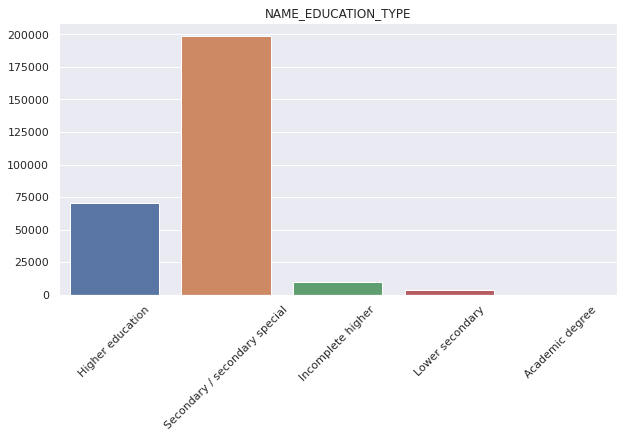

<Figure size 720x216 with 0 Axes>

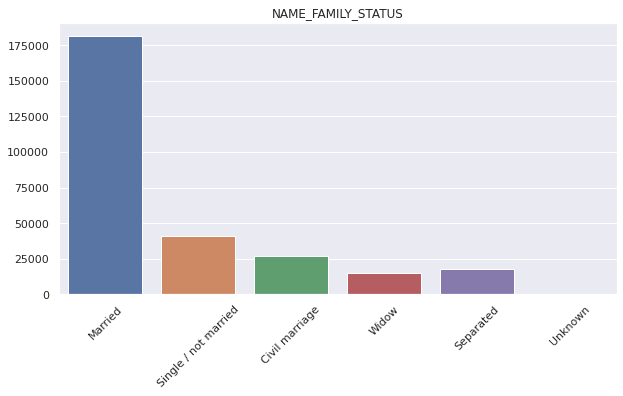

In [0]:
# Plot columns 1-7 Of Categorical type in the Non default data segment

for column in cat_list[0:7]:
  plt.figure(figsize= (10, 3))
  categorical_variable_plot_non_default(column)
  plt.show()
  print()
  print()

<Figure size 720x216 with 0 Axes>

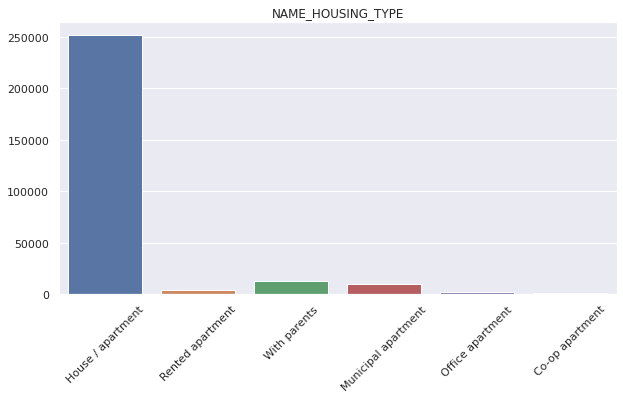

<Figure size 720x216 with 0 Axes>

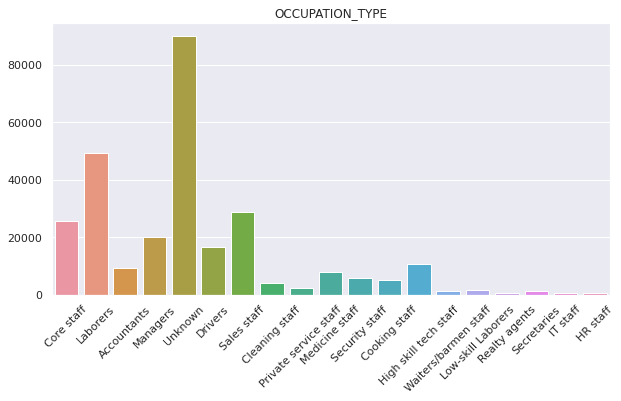

<Figure size 720x216 with 0 Axes>

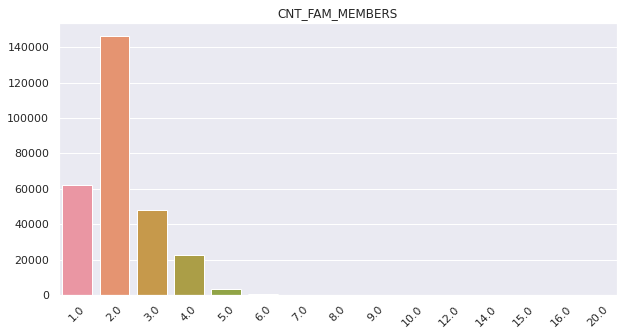

<Figure size 720x216 with 0 Axes>

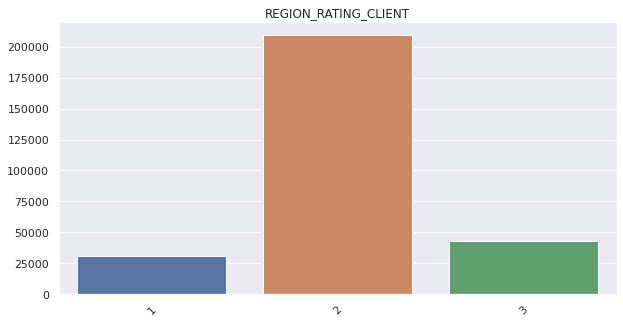

<Figure size 720x216 with 0 Axes>

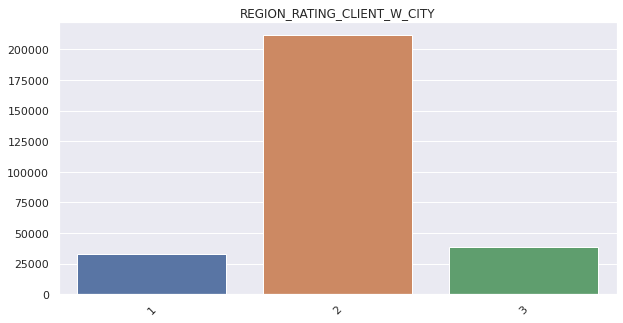

<Figure size 720x216 with 0 Axes>

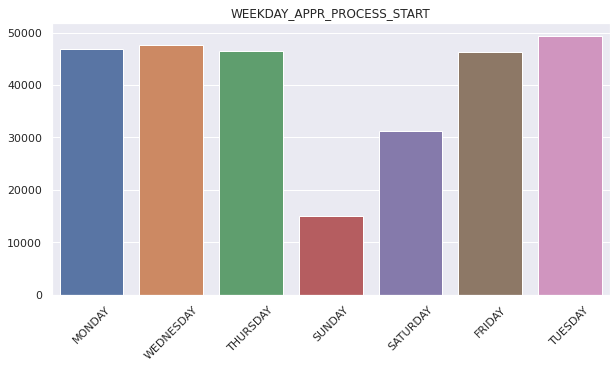

<Figure size 720x216 with 0 Axes>

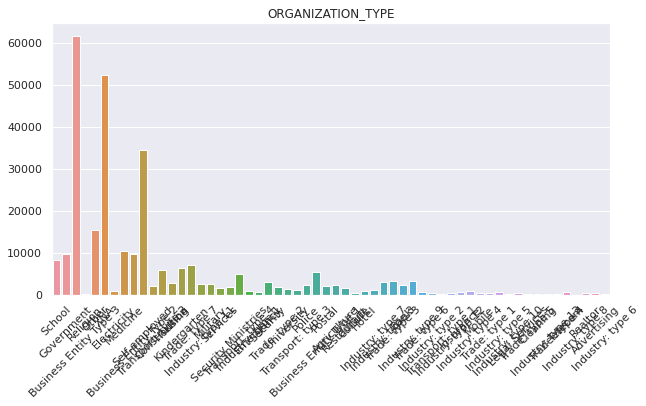

In [0]:
# Plot columns 7-14 Of Categorical type in the Non default data segment

for column in cat_list[7:]:
  plt.figure(figsize= (10, 3))
  categorical_variable_plot_non_default(column)
  plt.show()
  print()
  print()

In [0]:
###### Top 10 Correlations:

In [0]:
# Has to be done for each of the segmented data

In [0]:
# Correlation matrix for defaulter segment
app_data_defaulter.corr()

SK_ID_CURR  ...  DAYS_LAST_PHONE_CHANGE
SK_ID_CURR                     1.000000  ...                0.002455
TARGET                              NaN  ...                     NaN
CNT_CHILDREN                  -0.005144  ...                0.011547
AMT_INCOME_TOTAL              -0.010165  ...               -0.002429
AMT_CREDIT                    -0.001290  ...               -0.110851
AMT_ANNUITY                   -0.007578  ...               -0.079870
AMT_GOODS_PRICE               -0.001816  ...               -0.118303
REGION_POPULATION_RELATIVE     0.006301  ...               -0.055139
DAYS_BIRTH                    -0.001254  ...                0.111199
DAYS_EMPLOYED                 -0.005151  ...                0.003227
DAYS_REGISTRATION              0.006342  ...                0.071727
DAYS_ID_PUBLISH               -0.002539  ...                0.123951
FLAG_MOBIL                          NaN  ...                     NaN
FLAG_EMP_PHONE                 0.005248  ...               -0.000933
FLAG_WORK_PHONE                0.004970  ...               -0.041707
FLAG_CONT_MOBILE              -0.003039  ...               -0.025803
FLAG_PHONE                     0.018246  ...               -0.072827
FLAG_EMAIL                     0.000831  ...               -0.011295
CNT_FAM_MEMBERS               -0.003816  ...               -0.013360
REGION_RATING_CLIENT          -0.005936  ...                0.017637
REGION_RATING_CLIENT_W_CITY   -0.004135  ...                0.019109
HOUR_APPR_PROCESS_START        0.005004  ...               -0.022809
REG_REGION_NOT_LIVE_REGION    -0.004249  ...                0.034209
REG_REGION_NOT_WORK_REGION     0.004120  ...                0.034912
LIVE_REGION_NOT_WORK_REGION    0.004303  ...                0.020890
REG_CITY_NOT_LIVE_CITY         0.008328  ...                0.063716
REG_CITY_NOT_WORK_CITY         0.000787  ...                0.064554
LIVE_CITY_NOT_WORK_CITY       -0.002929  ...                0.027388
EXT_SOURCE_1                  -0.002236  ...               -0.129570
EXT_SOURCE_2                   0.006452  ...               -0.207900
EXT_SOURCE_3                  -0.008178  ...               -0.065142
OBS_30_CNT_SOCIAL_CIRCLE      -0.009395  ...               -0.028851
DEF_30_CNT_SOCIAL_CIRCLE      -0.005549  ...                0.000228
OBS_60_CNT_SOCIAL_CIRCLE      -0.009058  ...               -0.029353
DEF_60_CNT_SOCIAL_CIRCLE      -0.009428  ...                0.004630
DAYS_LAST_PHONE_CHANGE         0.002455  ...                1.000000

[36 rows x 36 columns]

In [0]:
# Finding Constant features in the defaulter segment data:


find_constant_features(app_data_defaulter)

['TARGET', 'FLAG_MOBIL', 'TARGET_CATEGORICAL']

In [0]:
# The Above are constant features in our dataset

# TARGET and TARGET_CATEGORICAL are constant because they represent "Default" status which is 
# same for all values in this segment 



In [0]:
app_data_defaulter["FLAG_MOBIL"].value_counts()

1    24825
Name: FLAG_MOBIL, dtype: int64

In [0]:
# All values are flaged as 1 in "FLAG_MOBIL" column

In [0]:
# HEATMAP code

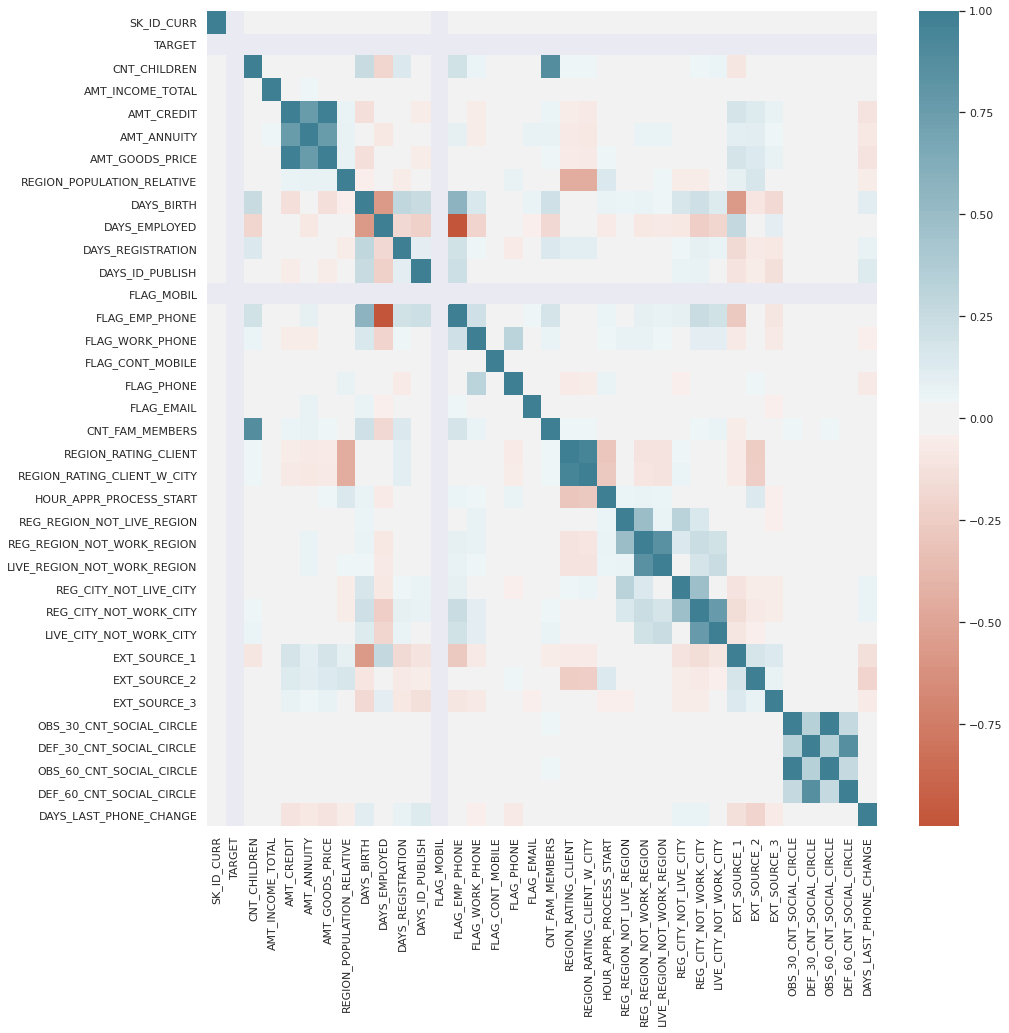

In [0]:
plt.figure(figsize = (15, 15))
sns.heatmap(app_data_defaulter.corr(), cmap=sns.diverging_palette(20, 220, n=200))
#sns.heatmap(app_data_defaulter.corr(), cmap="RdYlGn")

plt.show()

In [0]:
# For finding top 10 corelations we need only the continuous variables and not the categorical variables

In [0]:
# Creating a subset dataframe from the defaulter dataframe that includes only numeric type columns

app_data_defaulter_continuous = app_data_defaulter.select_dtypes(exclude=["object"]).copy()

In [0]:
app_data_defaulter_continuous.shape

# Contains only numeric_columns of the segmented data

(24825, 36)

In [0]:
# Finding top 10 unique absolute correlations

In [0]:
def get_redundant_pairs(df):
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations for DEFAULT category are as follows :")
print()
print(get_top_abs_correlations(app_data_defaulter_continuous, 10))

Top Absolute Correlations for DEFAULT category are as follows :

DAYS_EMPLOYED               FLAG_EMP_PHONE                 0.999702
OBS_30_CNT_SOCIAL_CIRCLE    OBS_60_CNT_SOCIAL_CIRCLE       0.998269
AMT_CREDIT                  AMT_GOODS_PRICE                0.983103
REGION_RATING_CLIENT        REGION_RATING_CLIENT_W_CITY    0.956637
CNT_CHILDREN                CNT_FAM_MEMBERS                0.885484
DEF_30_CNT_SOCIAL_CIRCLE    DEF_60_CNT_SOCIAL_CIRCLE       0.868994
REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION    0.847885
REG_CITY_NOT_WORK_CITY      LIVE_CITY_NOT_WORK_CITY        0.778540
AMT_ANNUITY                 AMT_GOODS_PRICE                0.752699
AMT_CREDIT                  AMT_ANNUITY                    0.752195
dtype: float64


In [0]:
def top_corelations_plot(column1, column2):    
    # Plot without default status
    plt.figure(figsize = (10, 5))
    sns.scatterplot(x = column1, y = column2, data = app_data_defaulter_continuous)
    plt.title("")
    plt.xlabel("")
    plt.ylabel("")

In [0]:
# Scatter Plots of top 5 correlations

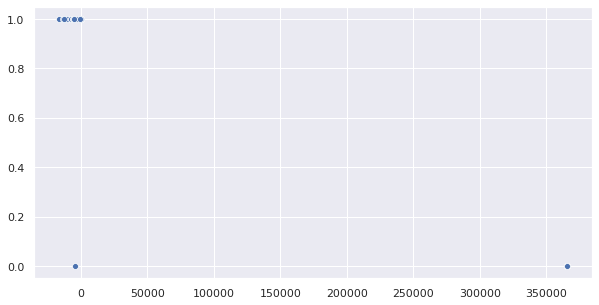

In [0]:
top_corelations_plot("DAYS_EMPLOYED", "FLAG_EMP_PHONE")

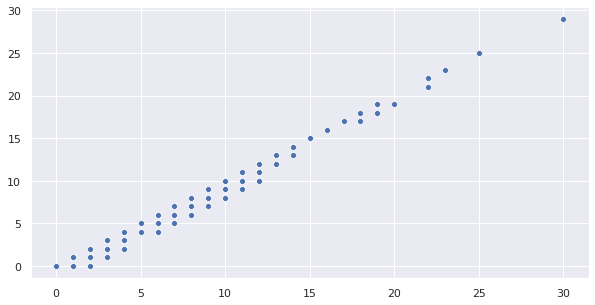

In [0]:
top_corelations_plot("OBS_30_CNT_SOCIAL_CIRCLE", "OBS_60_CNT_SOCIAL_CIRCLE")

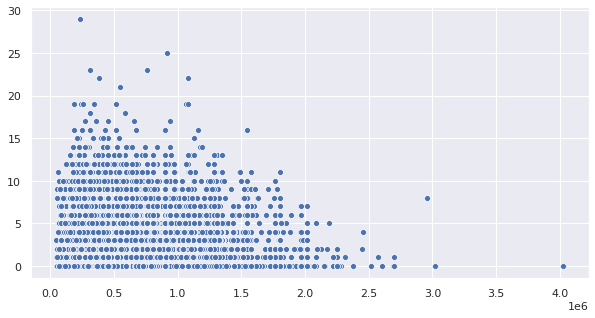

In [0]:
top_corelations_plot("AMT_CREDIT", "OBS_60_CNT_SOCIAL_CIRCLE")

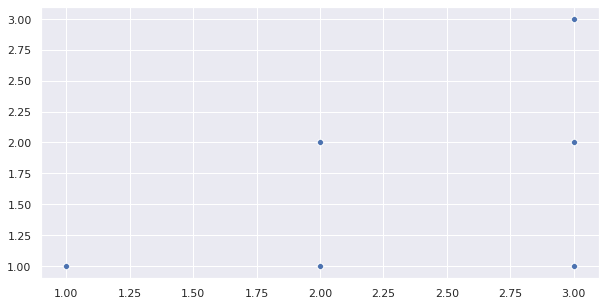

In [0]:
top_corelations_plot("REGION_RATING_CLIENT", "REGION_RATING_CLIENT_W_CITY")

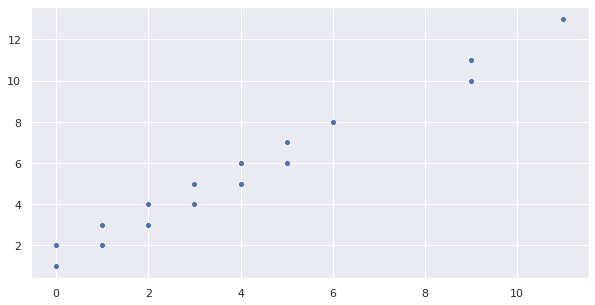

In [0]:
top_corelations_plot("CNT_CHILDREN", "CNT_FAM_MEMBERS")

In [0]:
# Top 10 corelations for Non-default data

In [0]:
app_data_non_defaulter.corr()

SK_ID_CURR  ...  DAYS_LAST_PHONE_CHANGE
SK_ID_CURR                     1.000000  ...               -0.000998
TARGET                              NaN  ...                     NaN
CNT_CHILDREN                  -0.000716  ...               -0.008501
AMT_INCOME_TOTAL               0.001739  ...               -0.041338
AMT_CREDIT                    -0.000342  ...               -0.069540
AMT_ANNUITY                    0.000068  ...               -0.062013
AMT_GOODS_PRICE               -0.000205  ...               -0.071373
REGION_POPULATION_RELATIVE     0.000360  ...               -0.041164
DAYS_BIRTH                    -0.001346  ...                0.076510
DAYS_EMPLOYED                  0.001744  ...                0.027081
DAYS_REGISTRATION             -0.001475  ...                0.053533
DAYS_ID_PUBLISH               -0.000077  ...                0.082949
FLAG_MOBIL                     0.002925  ...                     NaN
FLAG_EMP_PHONE                -0.001717  ...               -0.025237
FLAG_WORK_PHONE               -0.000854  ...               -0.043369
FLAG_CONT_MOBILE               0.003319  ...               -0.029275
FLAG_PHONE                     0.001408  ...               -0.065766
FLAG_EMAIL                     0.000229  ...               -0.020050
CNT_FAM_MEMBERS               -0.002790  ...               -0.028888
REGION_RATING_CLIENT          -0.000519  ...                0.023265
REGION_RATING_CLIENT_W_CITY   -0.000739  ...                0.022702
HOUR_APPR_PROCESS_START       -0.000115  ...               -0.012854
REG_REGION_NOT_LIVE_REGION     0.000104  ...                0.037970
REG_REGION_NOT_WORK_REGION     0.000836  ...                0.036186
LIVE_REGION_NOT_WORK_REGION    0.002784  ...                0.021277
REG_CITY_NOT_LIVE_CITY        -0.002885  ...                0.050903
REG_CITY_NOT_WORK_CITY        -0.001696  ...                0.042355
LIVE_CITY_NOT_WORK_CITY        0.000428  ...                0.018981
EXT_SOURCE_1                   0.000529  ...               -0.127122
EXT_SOURCE_2                   0.001589  ...               -0.188399
EXT_SOURCE_3                   0.000309  ...               -0.067497
OBS_30_CNT_SOCIAL_CIRCLE      -0.000695  ...               -0.014246
DEF_30_CNT_SOCIAL_CIRCLE       0.000556  ...               -0.001526
OBS_60_CNT_SOCIAL_CIRCLE      -0.000741  ...               -0.014650
DEF_60_CNT_SOCIAL_CIRCLE       0.002382  ...               -0.000156
DAYS_LAST_PHONE_CHANGE        -0.000998  ...                1.000000

[36 rows x 36 columns]

In [0]:
find_constant_features(app_data_non_defaulter)

['TARGET', 'TARGET_CATEGORICAL']

In [0]:
# No constan feature except "TARGET" and "TARGET_CATEGORICAL" variales:

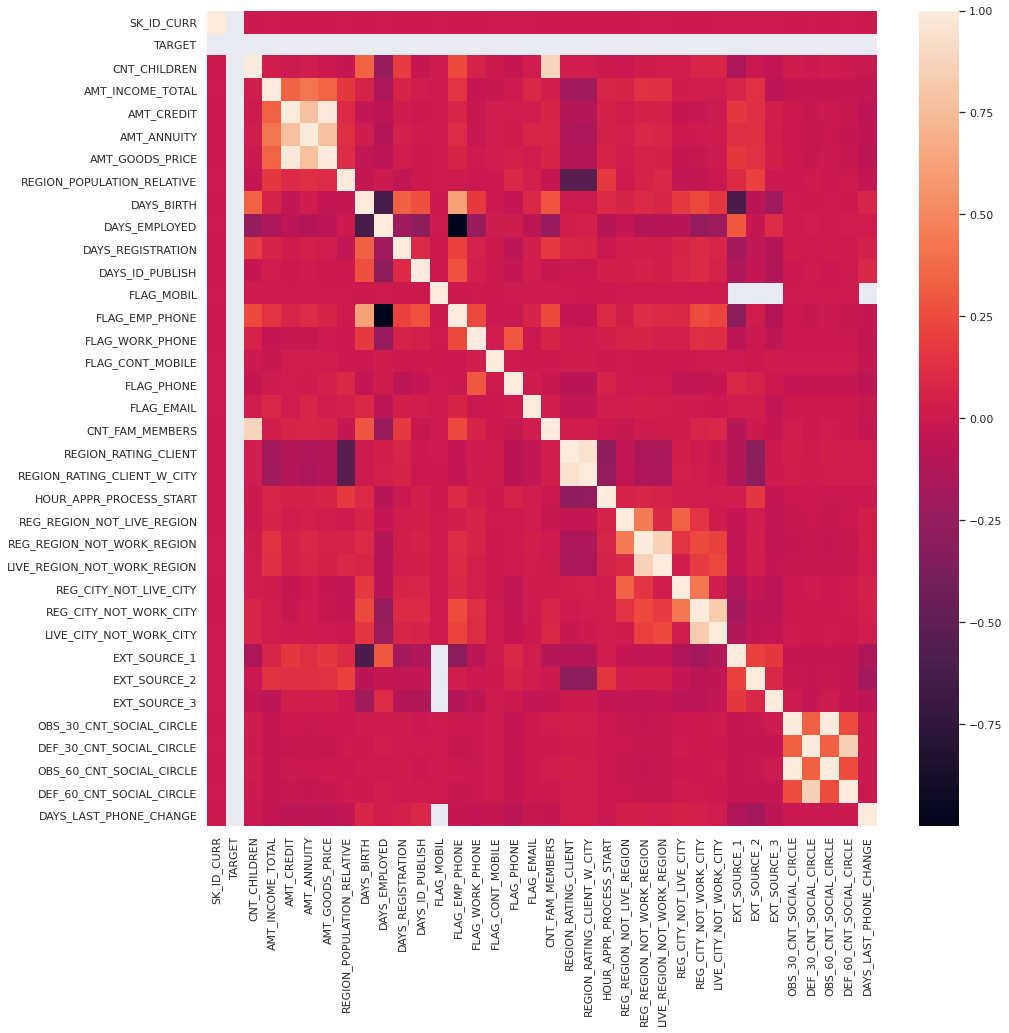

In [0]:
# Heatmap for Non default segment

plt.figure(figsize = (15, 15))
sns.heatmap(app_data_non_defaulter.corr())
plt.show()

In [0]:
# Extracting continuous variables for "Non defaulter" data

In [0]:
# New dataframe that contains only continuous variables of non default segment of data

app_data_non_defaulter_continuous = app_data_non_defaulter.select_dtypes(exclude=["object"]).copy()

In [0]:
app_data_non_defaulter_continuous.shape

(282686, 36)

In [0]:
# Continuous variables have been separated

In [0]:
print("Top Absolute Correlations for NON DEFAULT category are as follows :")
print()
print(get_top_abs_correlations(app_data_non_defaulter_continuous, 10))

Top Absolute Correlations for NON DEFAULT category are as follows :

DAYS_EMPLOYED               FLAG_EMP_PHONE                 0.999758
OBS_30_CNT_SOCIAL_CIRCLE    OBS_60_CNT_SOCIAL_CIRCLE       0.998508
AMT_CREDIT                  AMT_GOODS_PRICE                0.987250
REGION_RATING_CLIENT        REGION_RATING_CLIENT_W_CITY    0.950149
CNT_CHILDREN                CNT_FAM_MEMBERS                0.878571
REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION    0.861861
DEF_30_CNT_SOCIAL_CIRCLE    DEF_60_CNT_SOCIAL_CIRCLE       0.859332
REG_CITY_NOT_WORK_CITY      LIVE_CITY_NOT_WORK_CITY        0.830381
AMT_ANNUITY                 AMT_GOODS_PRICE                0.776686
AMT_CREDIT                  AMT_ANNUITY                    0.771309
dtype: float64


In [0]:
# Scatter Plots for the Non default data

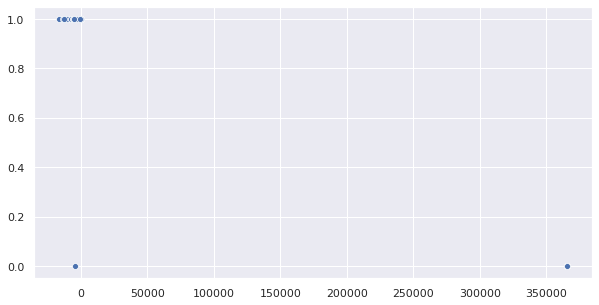

In [0]:
top_corelations_plot("DAYS_EMPLOYED", "FLAG_EMP_PHONE")

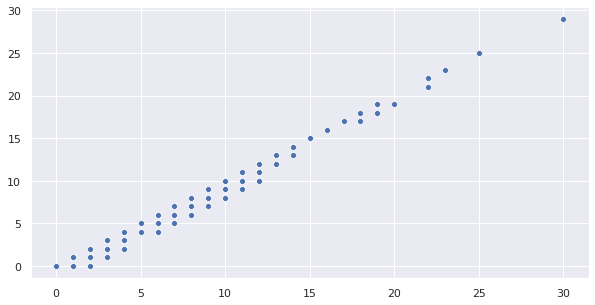

In [0]:
top_corelations_plot("OBS_30_CNT_SOCIAL_CIRCLE", "OBS_60_CNT_SOCIAL_CIRCLE")

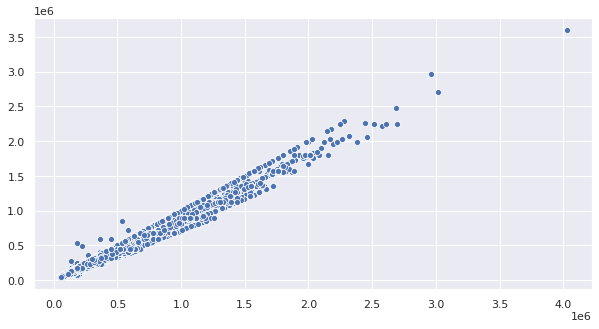

In [0]:
top_corelations_plot("AMT_CREDIT", "AMT_GOODS_PRICE")

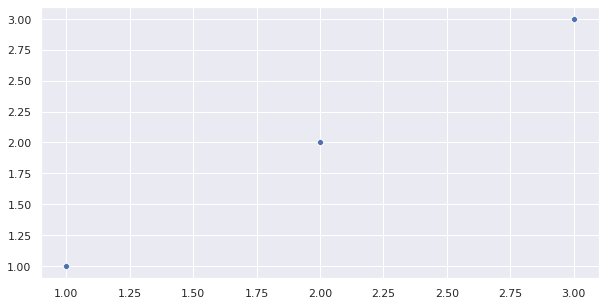

In [0]:
top_corelations_plot("REGION_RATING_CLIENT", "REGION_RATING_CLIENT")

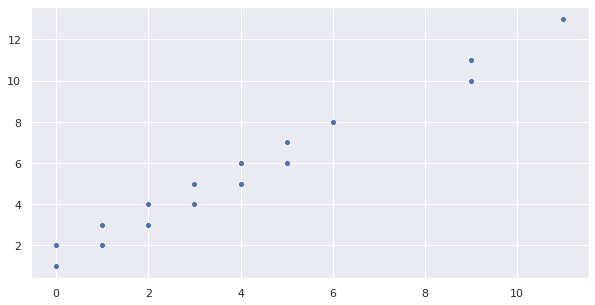

In [0]:
top_corelations_plot("CNT_CHILDREN", "CNT_FAM_MEMBERS")

In [0]:
## Additions made 

In [0]:
# Analysis of previous_app data

In [0]:
## Target Variable is "NAME_CONTRACT_STATUS"

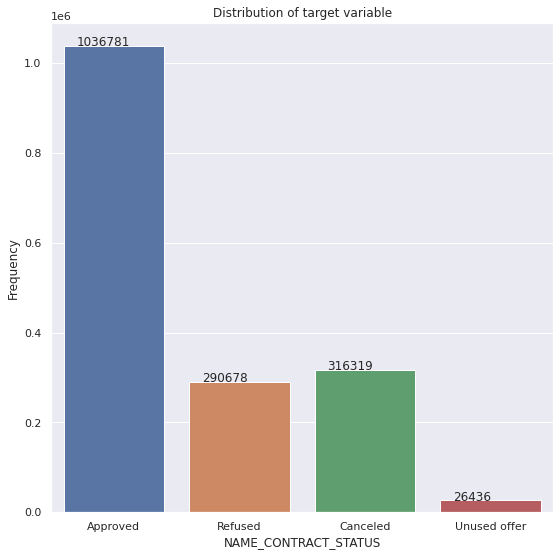

In [0]:
# Plotting the distribution of target variable
sns.set(style="darkgrid")

plt.figure(figsize = (9, 9))
ax = sns.countplot(x = "NAME_CONTRACT_STATUS", data = previous_app)
plt.title('Distribution of target variable')
plt.ylabel('Frequency')

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

In [0]:
# The target variable is categorical in nature

In [0]:
previous_app.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

In [0]:
# Removing unnecessary columns :

# "WEEKDAY_APPR_PROCESS_START", "HOUR_APPR_PROCESS_START" are not useful for our analysis

previous_app.drop(columns=["WEEKDAY_APPR_PROCESS_START", "HOUR_APPR_PROCESS_START"], inplace = True)

In [0]:
previous_app.corr()



SK_ID_PREV  SK_ID_CURR  ...  SELLERPLACE_AREA  CNT_PAYMENT
SK_ID_PREV                1.000000   -0.000321  ...         -0.001079     0.015589
SK_ID_CURR               -0.000321    1.000000  ...          0.001265     0.000031
AMT_ANNUITY               0.011459    0.000577  ...         -0.015027     0.394535
AMT_APPLICATION           0.003302    0.000280  ...         -0.007649     0.680630
AMT_CREDIT                0.003659    0.000195  ...         -0.009567     0.674278
AMT_GOODS_PRICE           0.015293    0.000369  ...         -0.015842     0.672129
NFLAG_LAST_APPL_IN_DAY   -0.002828    0.000098  ...          0.000912     0.063347
DAYS_DECISION             0.019100   -0.000637  ...         -0.018382     0.246453
SELLERPLACE_AREA         -0.001079    0.001265  ...          1.000000    -0.010646
CNT_PAYMENT               0.015589    0.000031  ...         -0.010646     1.000000

[10 rows x 10 columns]

In [0]:
previous_app_continuous = previous_app.select_dtypes(exclude = ["object"]).copy()

In [0]:
print("Top Absolute Correlations previous_app data are as follows :")
print()
print(get_top_abs_correlations(previous_app_continuous, 5))

Top Absolute Correlations previous_app data are as follows :

AMT_APPLICATION  AMT_GOODS_PRICE    0.999884
AMT_CREDIT       AMT_GOODS_PRICE    0.993087
AMT_APPLICATION  AMT_CREDIT         0.975824
AMT_ANNUITY      AMT_GOODS_PRICE    0.820895
                 AMT_CREDIT         0.816429
dtype: float64


In [0]:
# Columns with very high correlation >= 0.97 can be dropped
# They have similar effect on output data

In [0]:
# Dropping "AMT_APPLICATION" and "AMT_GOODS_PRICE" from the dataset:
previous_app.drop(columns=["AMT_APPLICATION", "AMT_GOODS_PRICE"], inplace = True)


In [0]:
previous_app.columns.size

22

In [0]:
# Function for numeric and categorical plotting for previous_app data

def previous_app_numeric_categorical(cat_col, num_col):
    
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,7), dpi=90)
    
    sns.stripplot(x = cat_col, y = num_col, data = previous_app, jitter = True, hue = "NAME_CONTRACT_STATUS", dodge = True, ax = ax1) 
    ax1.set_title("Stripplot for " + cat_col + " and "+ num_col + " ")
    ax1.set_xlabel(cat_col)
    ax1.set_ylabel(num_col)
    
    sns.boxplot(x = cat_col, y = num_col, data = previous_app, hue = "NAME_CONTRACT_STATUS", ax = ax2) 
    ax2.set_ylabel(num_col)
    ax2.set_title("Boxplot for " + cat_col + " and "+ num_col + " ")
    ax2.set_xlabel(cat_col)
    ax2.set_ylabel(num_col)

    plt.tight_layout()
    print()
    print()

In [0]:
# Plots for categorical_column vs "AMT_ANNUITY" in previous_data

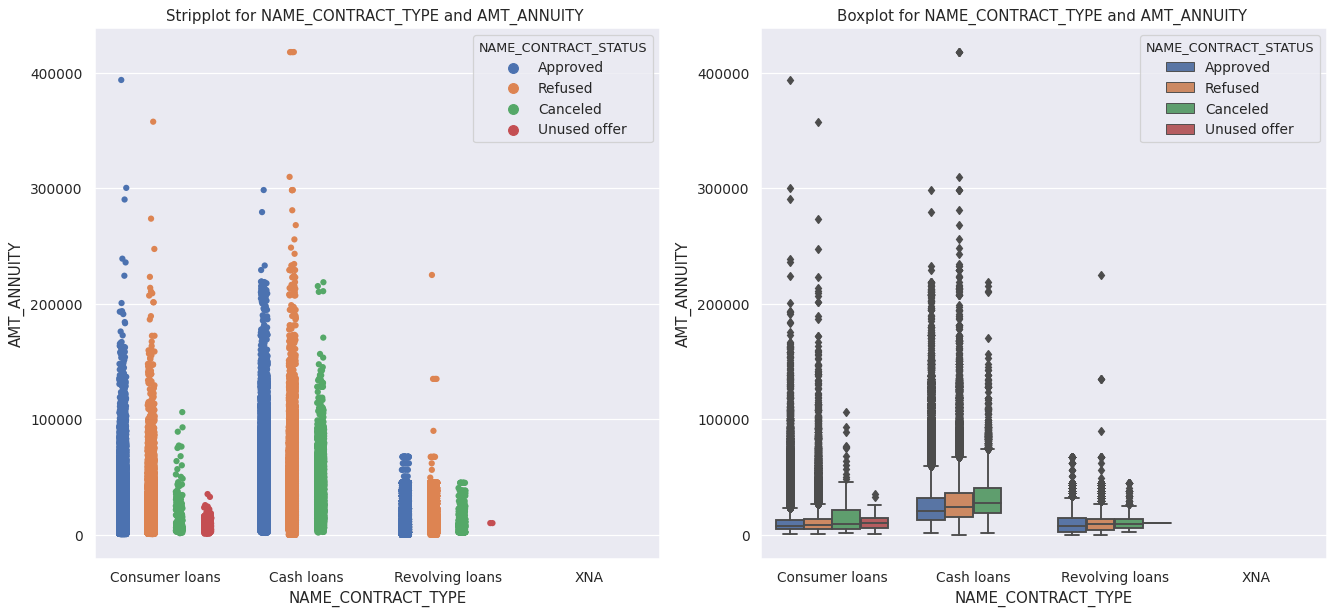

In [0]:
previous_app_numeric_categorical("NAME_CONTRACT_TYPE", "AMT_ANNUITY")

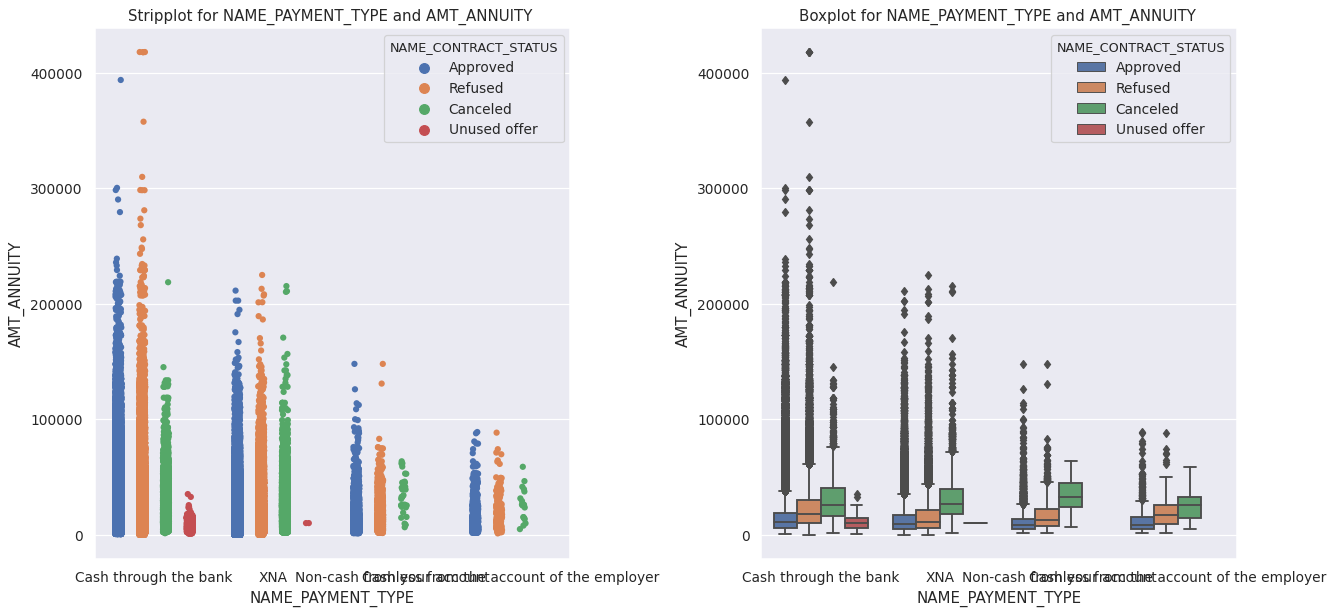

In [0]:
previous_app_numeric_categorical("NAME_PAYMENT_TYPE", "AMT_ANNUITY")

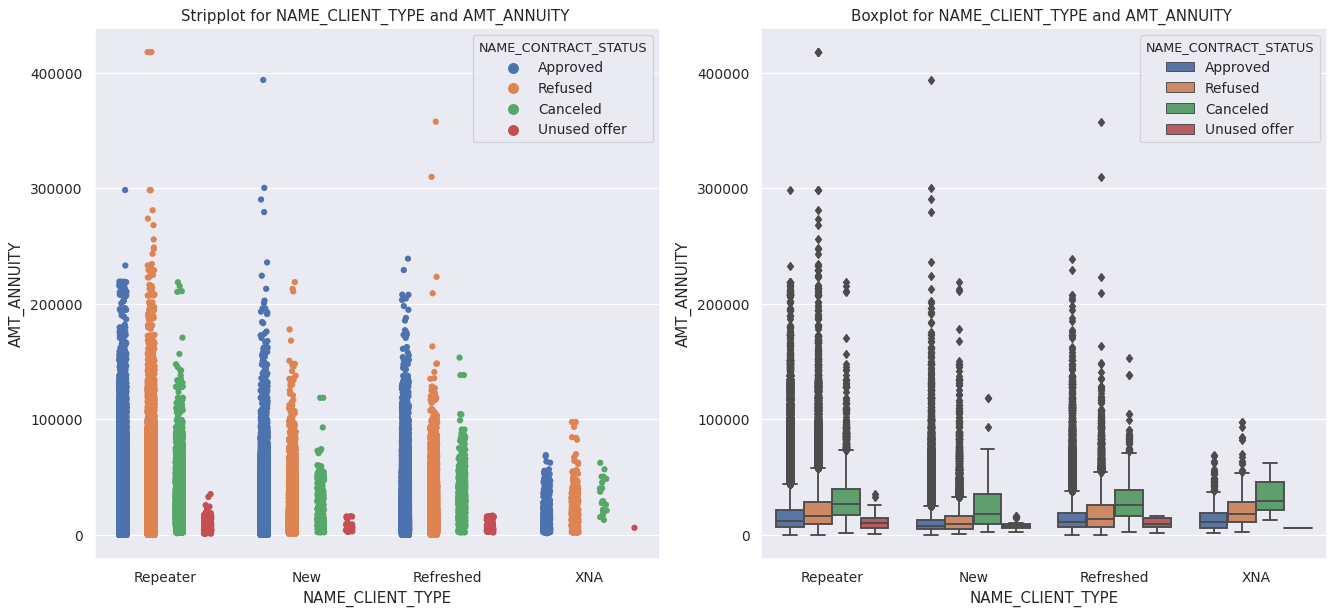

In [0]:
previous_app_numeric_categorical("NAME_CLIENT_TYPE", "AMT_ANNUITY")

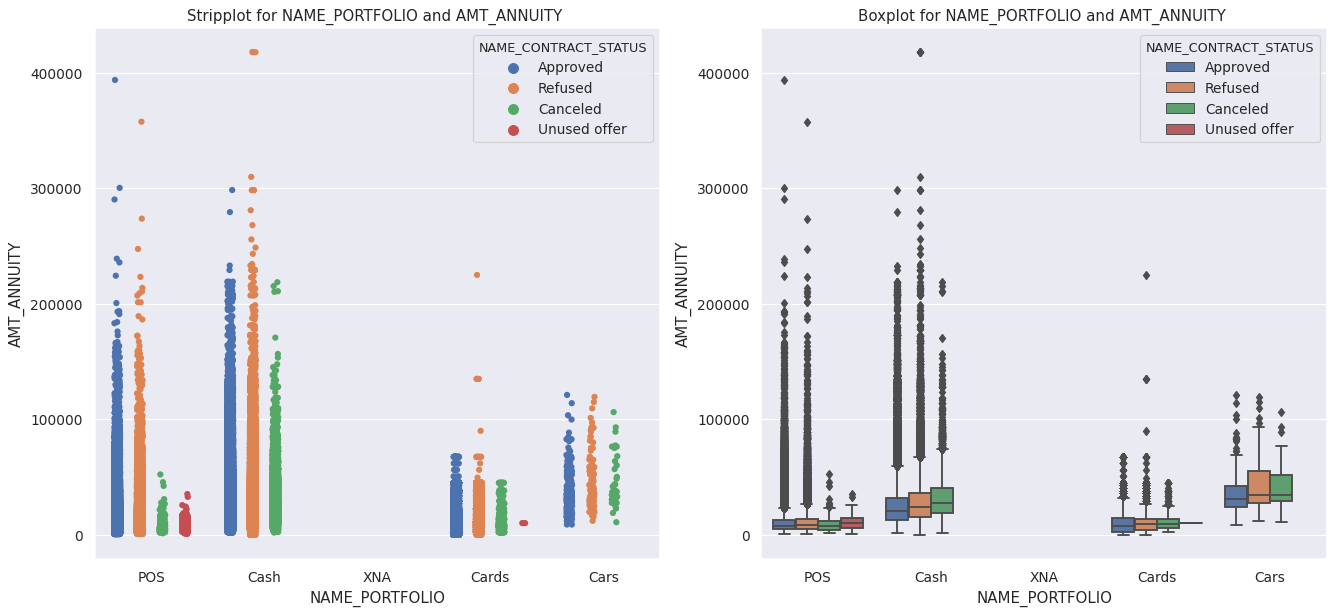

In [0]:
previous_app_numeric_categorical("NAME_PORTFOLIO", "AMT_ANNUITY")

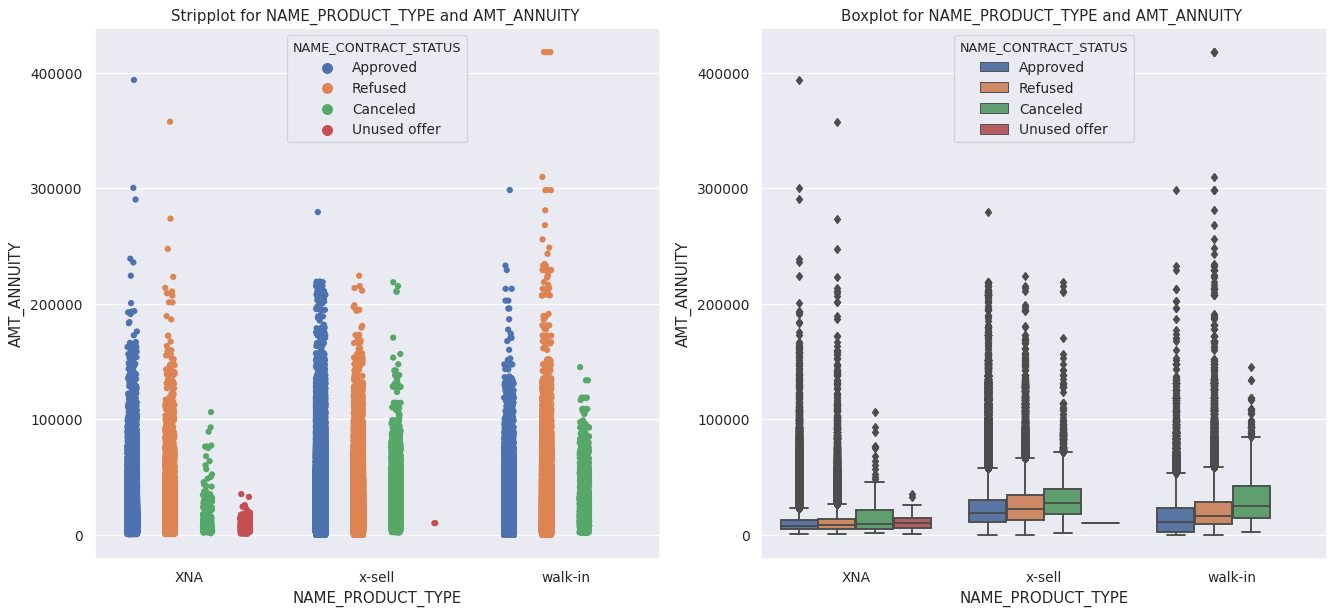

In [0]:
previous_app_numeric_categorical("NAME_PRODUCT_TYPE", "AMT_ANNUITY")

In [0]:
# Plots for categorical_column vs "DAYS_DECISION" in previous_data

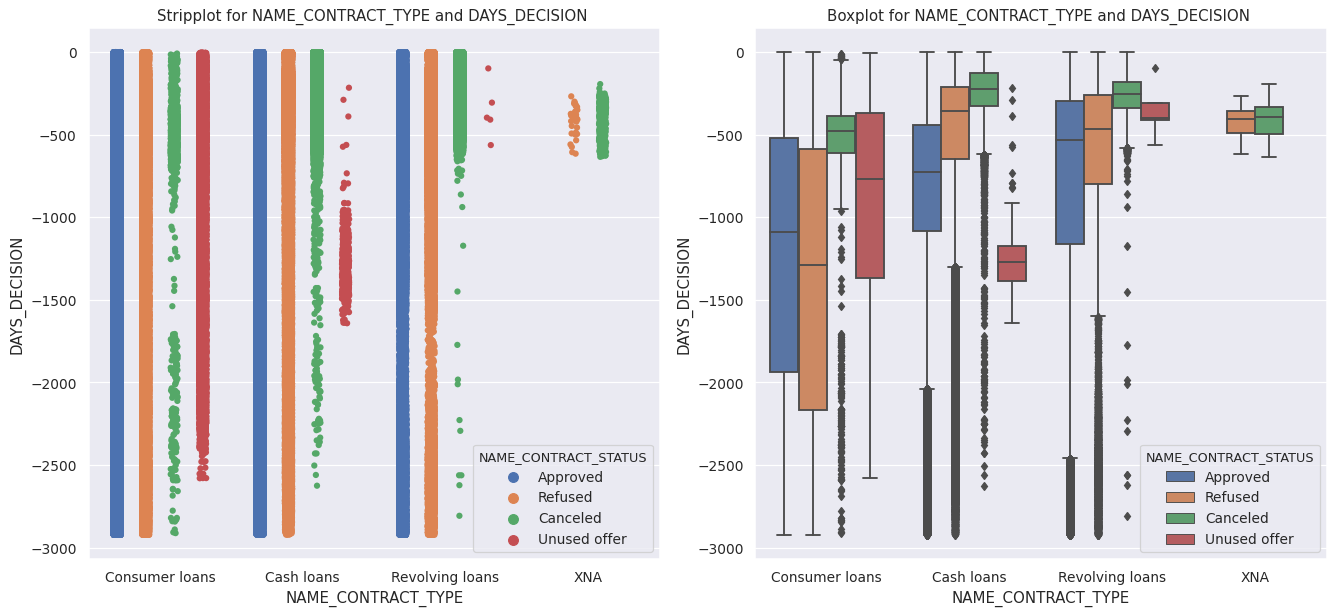

In [0]:
previous_app_numeric_categorical("NAME_CONTRACT_TYPE", "DAYS_DECISION")

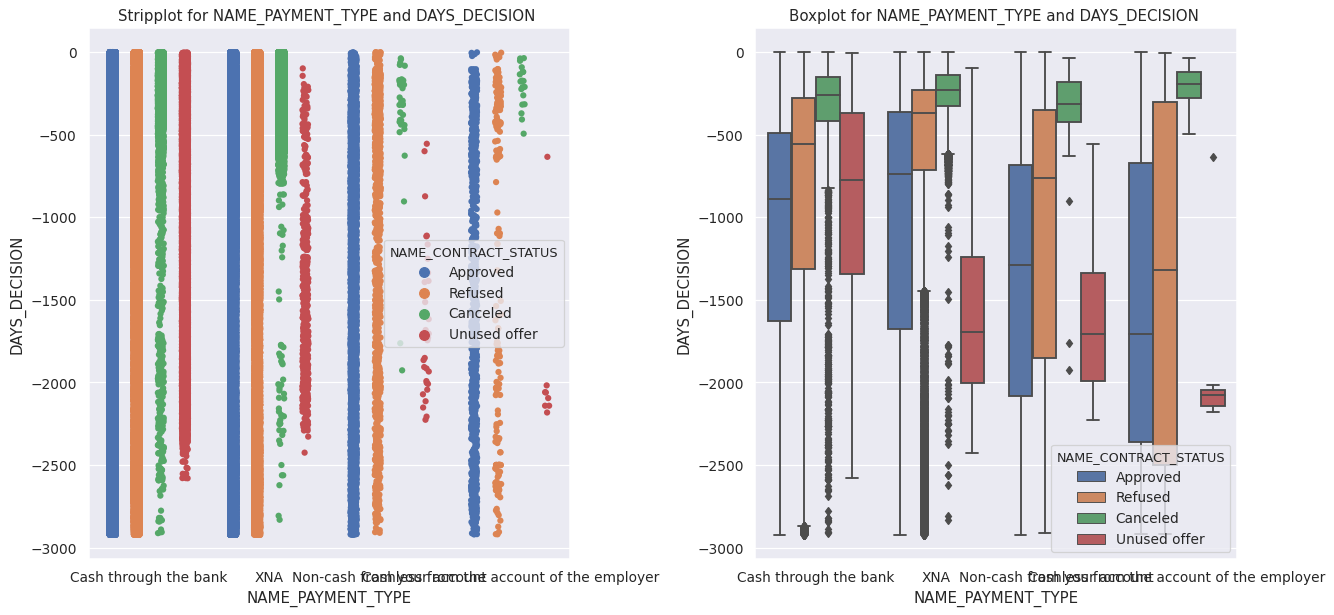

In [0]:
previous_app_numeric_categorical("NAME_PAYMENT_TYPE", "DAYS_DECISION")

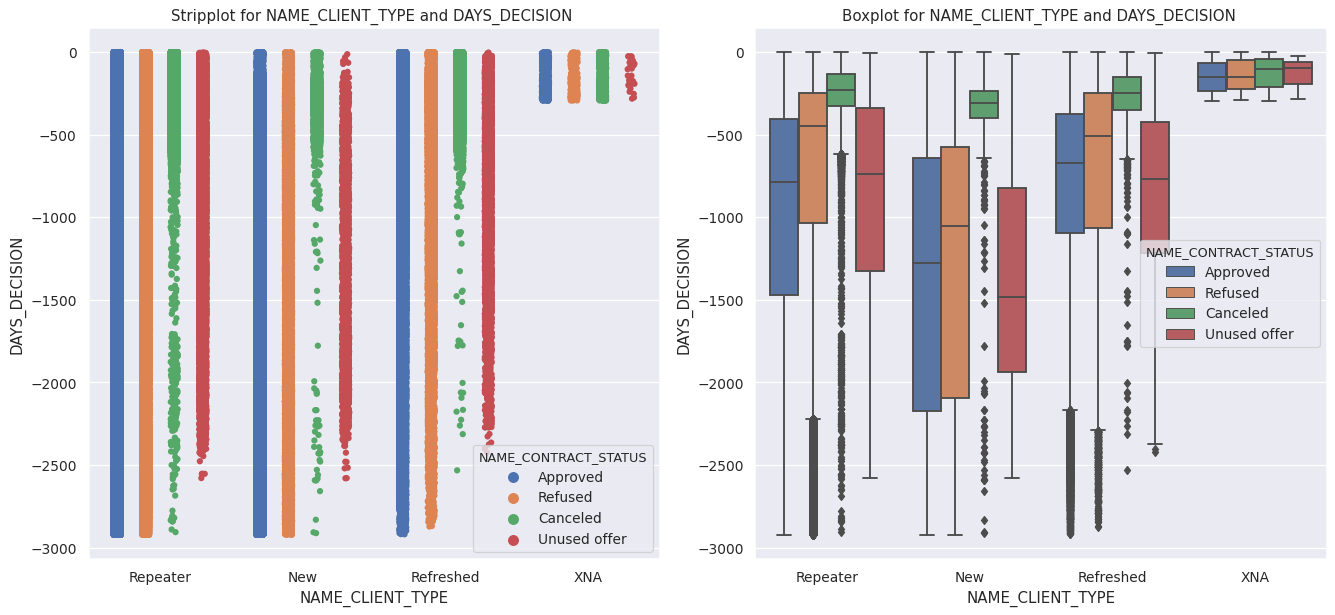

In [0]:
previous_app_numeric_categorical("NAME_CLIENT_TYPE", "DAYS_DECISION")

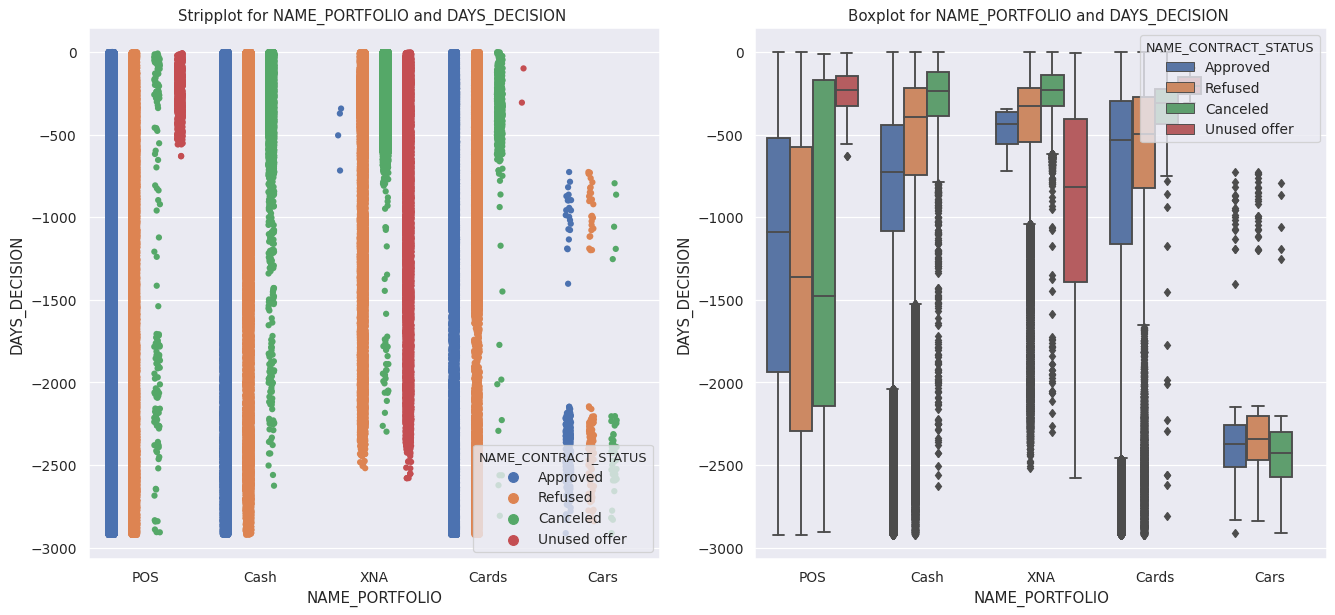

In [0]:
previous_app_numeric_categorical("NAME_PORTFOLIO", "DAYS_DECISION")

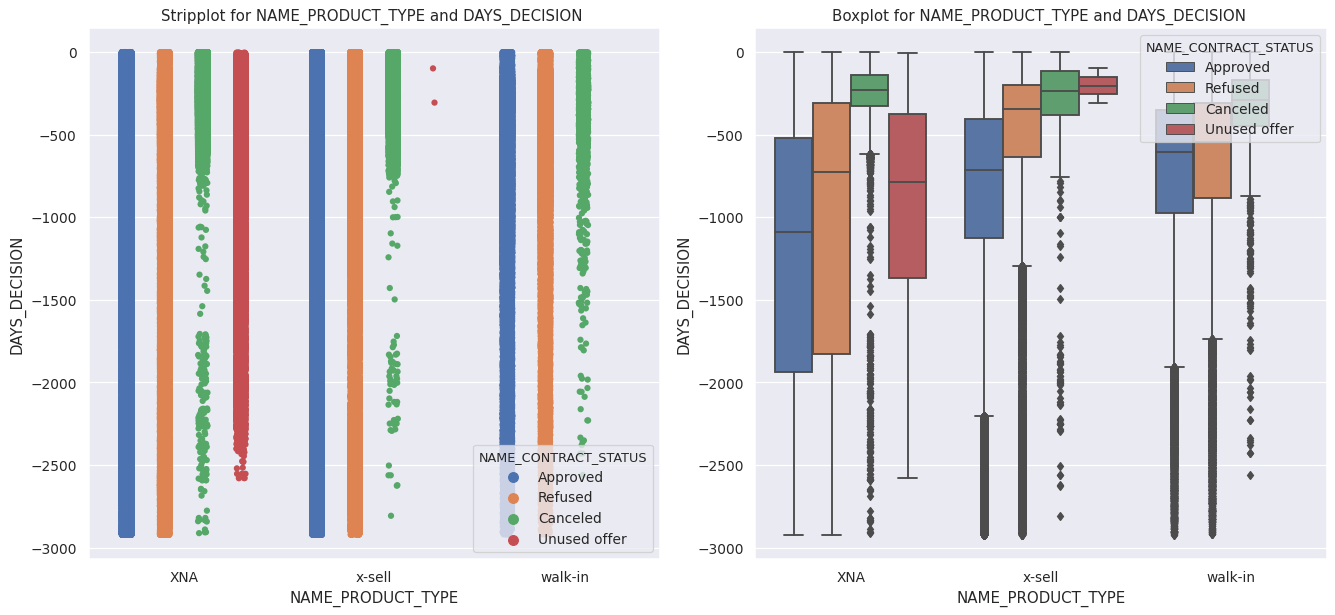

In [0]:
previous_app_numeric_categorical("NAME_PRODUCT_TYPE", "DAYS_DECISION")

In [0]:
# Plots for categorical_column vs "CNT_PAYMENT" in previous_data

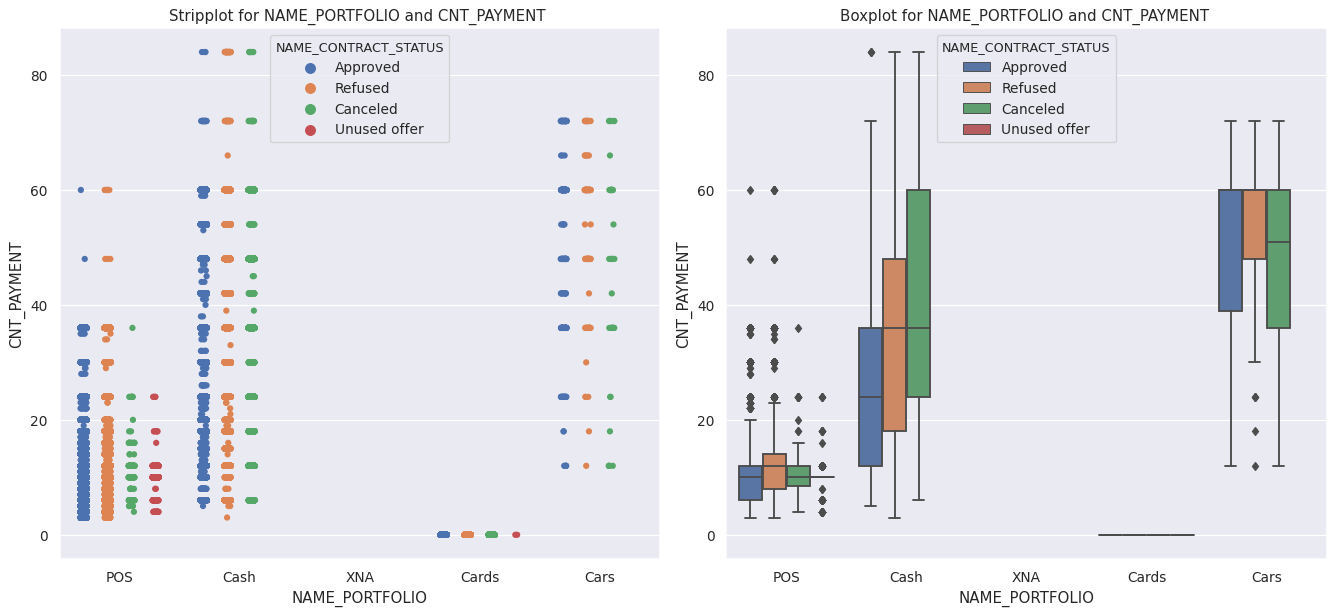

In [0]:
previous_app_numeric_categorical("NAME_PORTFOLIO", "CNT_PAYMENT")

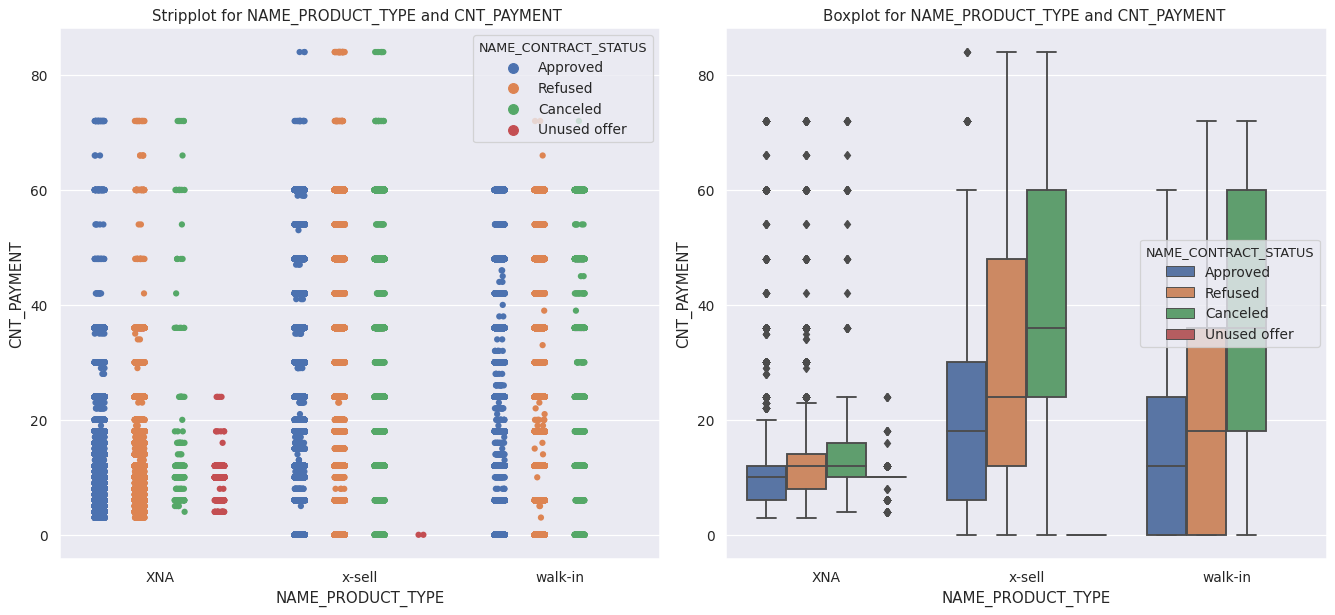

In [0]:
previous_app_numeric_categorical("NAME_PRODUCT_TYPE", "CNT_PAYMENT")

In [0]:
# Observations from the above data:

# "XNA" values are distrupting the analysis in many cases
# "CNT_PAYMENT" does not affect "NAME_CONTRACT_STATUS" i.e. the target variable
# "NAME_CLIENT_TYPE" also does not affect aproval rate -> All types of clients may or may not be approved
# No approval for "XNA" category in "NAME_PORTFOLIO"

In [0]:
previous_app.shape

(1670214, 22)

In [0]:
app_data.shape

(307511, 49)

In [0]:
## previous_app has a significantly large number of rows than app_data

In [0]:
# Merging the app_data and the previous_app dataframes into a single dataset:


In [0]:
app_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CI

In [0]:
previous_app.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_CREDIT', 'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

In [0]:
app_data["SK_ID_CURR"].value_counts().size

307511

In [0]:
previous_app["SK_ID_CURR"].value_counts().size

338857

In [0]:
app_data.shape

(307511, 49)

In [0]:
previous_app.shape

(1670214, 22)

In [0]:
# Merge type is "inner" : Any other type will generate null values in the datset

merged_data=pd.merge(app_data, previous_app, on = 'SK_ID_CURR', suffixes='_x')


In [0]:
merged_data.shape

(1413701, 70)

In [0]:
merged_data["SK_ID_CURR"].value_counts()

265681    73
173680    72
242412    68
206783    67
382179    64
          ..
418940     1
136721     1
144917     1
155160     1
133697     1
Name: SK_ID_CURR, Length: 291057, dtype: int64

In [0]:
# Now more than one row has the same SK_ID_CURR

In [0]:
# "SK_ID_CURR" is unique for each row in app_data
# But, it is not unique in previous_app data

# Hence, the shape of output dataframe has more rows than app_data

In [0]:
merged_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_', 'AMT_ANNUITY_', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL

In [0]:
## Merging based on more than one parameters

In [0]:
merged_data_2 = pd.merge(app_data, previous_app, on = ["SK_ID_CURR", "AMT_CREDIT", "AMT_ANNUITY"], suffixes='_x')


In [0]:
merged_data_2.shape

(663, 68)

In [0]:
merged_data_3 = pd.merge(app_data, previous_app, on = ["SK_ID_CURR", "AMT_CREDIT"], suffixes='_x')


In [0]:
merged_data_3.shape

(5289, 69)

In [0]:
merged_data_4 = pd.merge(app_data, previous_app, on = ["SK_ID_CURR", "AMT_ANNUITY"], suffixes='_x')


In [0]:
merged_data_4.shape

(711, 69)

In [0]:
merged_data_5 = pd.merge(app_data, previous_app, on = ["SK_ID_CURR", "NAME_CONTRACT_TYPE"], suffixes='_x')


In [0]:
merged_data_5.shape

(596876, 69)

In [0]:
merged_data_6 = pd.merge(app_data, previous_app, on = ["SK_ID_CURR", "NAME_CONTRACT_TYPE", "AMT_ANNUITY"], suffixes='_x')

In [0]:
merged_data_6.shape

(700, 68)

In [0]:
merged_data_7 = pd.merge(app_data, previous_app, on = ["SK_ID_CURR", "NAME_CONTRACT_TYPE", "AMT_CREDIT"], suffixes='_x')

In [0]:
merged_data_7.shape

(4018, 68)

In [0]:
## Doubt : On what basis should we merge the data to get appropriate results?

In [0]:
## We will use merged_data_5 for our purpose

In [0]:
merged_data_5 = merged_data_5.rename({ 'AMT_CREDIT_':'AMT_CREDIT','AMT_ANNUITY_':'AMT_ANNUITY',
                         'WEEKDAY_APPR_PROCESS_START_' : 'WEEKDAY_APPR_PROCESS_START',
                         'HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPEx':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_CREDITx':'AMT_CREDIT_PREV','AMT_ANNUITYx':'AMT_ANNUITY_PREV',
                         'WEEKDAY_APPR_PROCESS_STARTx':'WEEKDAY_APPR_PROCESS_START_PREV',
                         'HOUR_APPR_PROCESS_STARTx':'HOUR_APPR_PROCESS_START_PREV'}, axis=1)

In [0]:
merged_data_final = merged_data_5.copy()

In [0]:
merged_data_final.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CI

In [0]:
# Function to generate outputs for merged_data
def merged_data_numeric_categorical(cat_col, num_col):
    
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,9), dpi=90)
    plt.xticks(rotation = 90)
    sns.stripplot(x = cat_col, y = num_col, data = merged_data_final, jitter = True, hue = "TARGET", dodge = True, ax = ax1) 
    ax1.set_title("Stripplot for " + cat_col + " and "+ num_col + " ")
    ax1.set_xlabel(cat_col)
    ax1.set_ylabel(num_col)
    plt.xticks(rotation = 90)
    
    sns.boxplot(x = cat_col, y = num_col, data = merged_data_final, hue = "NAME_CONTRACT_STATUS", ax = ax2) 
    ax2.set_ylabel(num_col)
    ax2.set_title("Boxplot for " + cat_col + " and "+ num_col + " ")
    ax2.set_xlabel(cat_col)
    ax2.set_ylabel(num_col)

    plt.tight_layout()
    print()
    print()

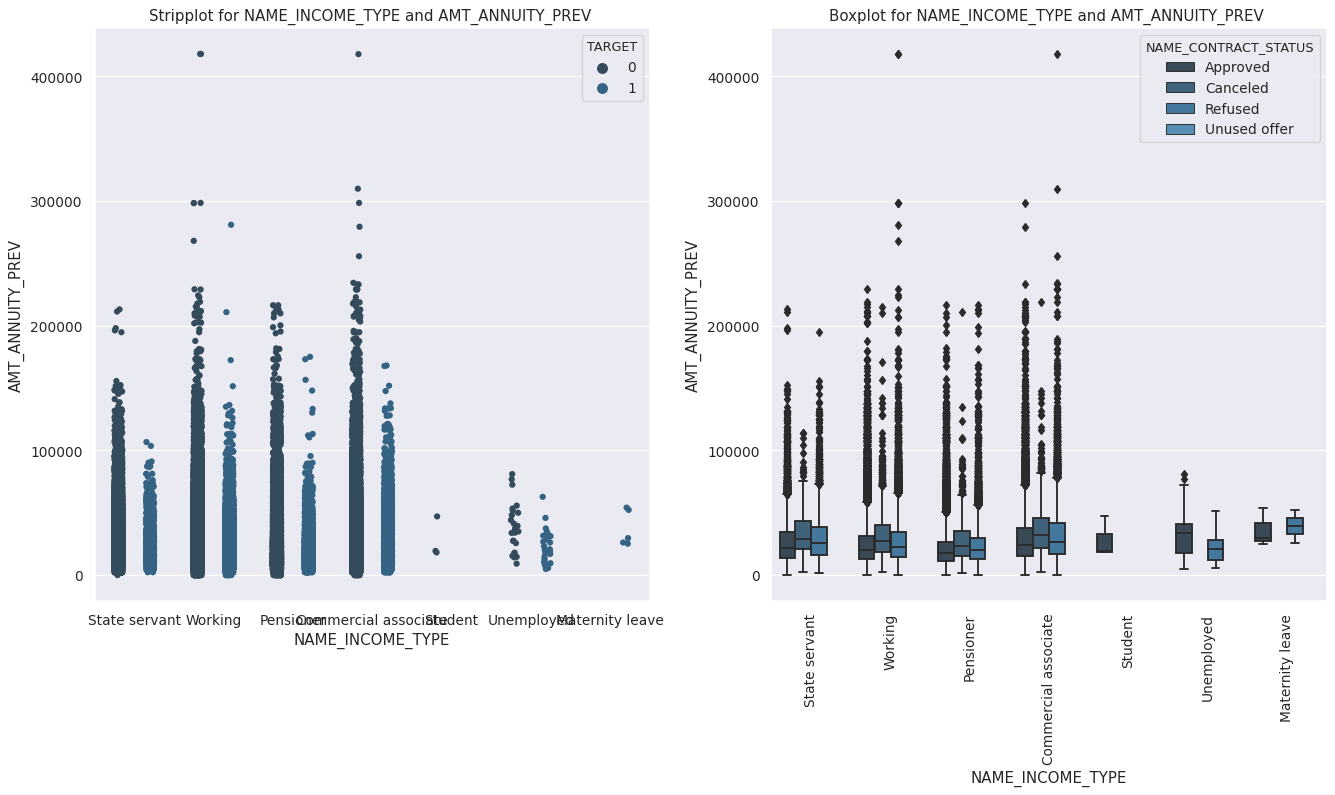

In [0]:
merged_data_numeric_categorical("NAME_INCOME_TYPE", "AMT_ANNUITY_PREV")

In [0]:
sns.set(palette="Blues_d")

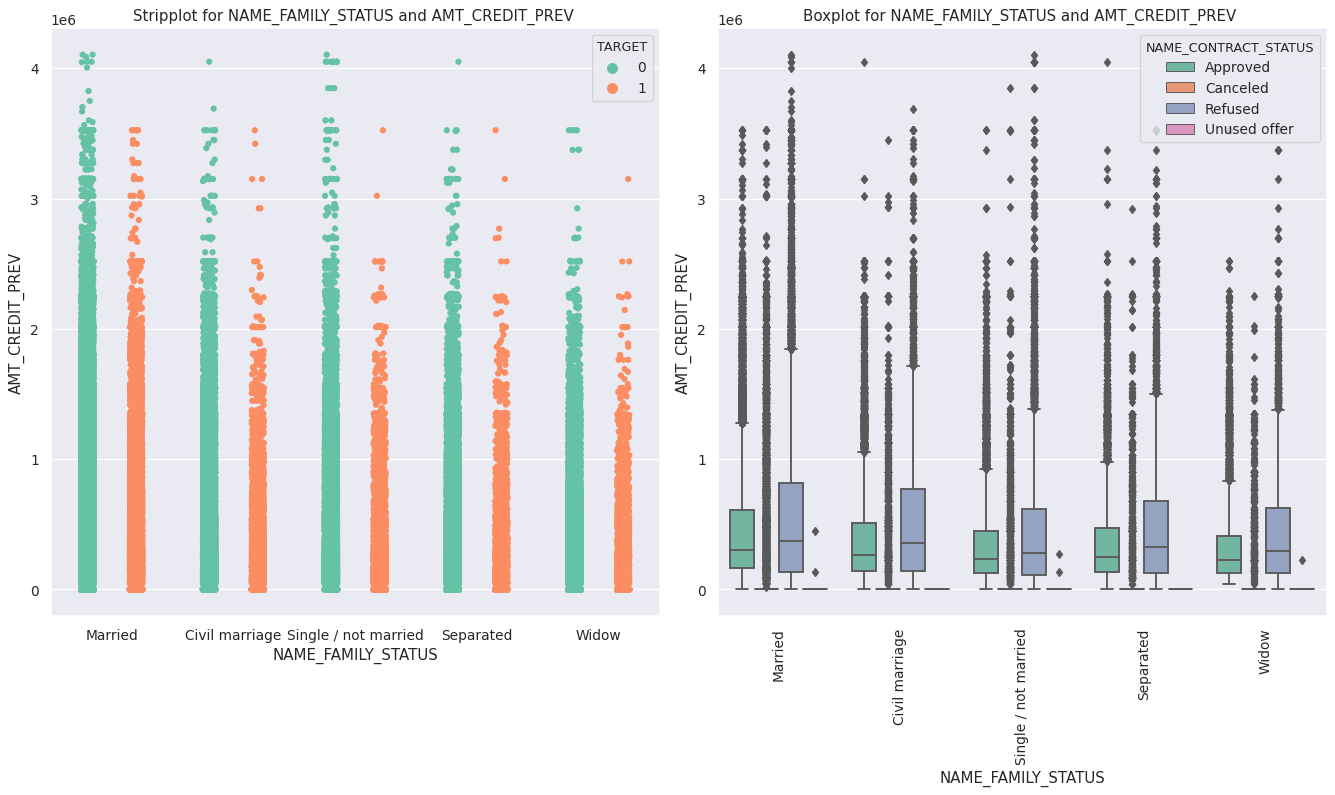

In [0]:
merged_data_numeric_categorical("NAME_FAMILY_STATUS", "AMT_CREDIT_PREV")

In [0]:
sns.set(palette="Dark2")


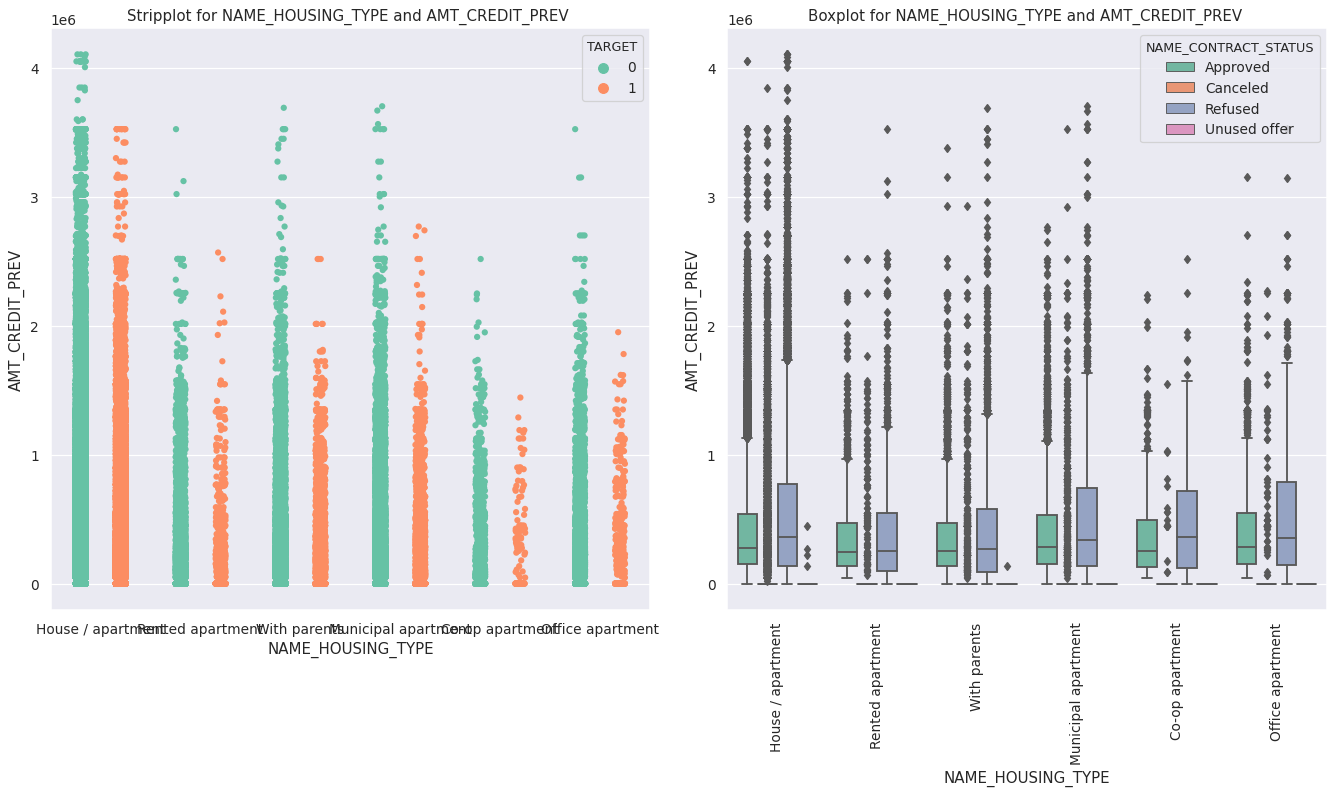

In [0]:
merged_data_numeric_categorical("NAME_HOUSING_TYPE", "AMT_CREDIT_PREV")

In [0]:
sns.set(palette="Set2")

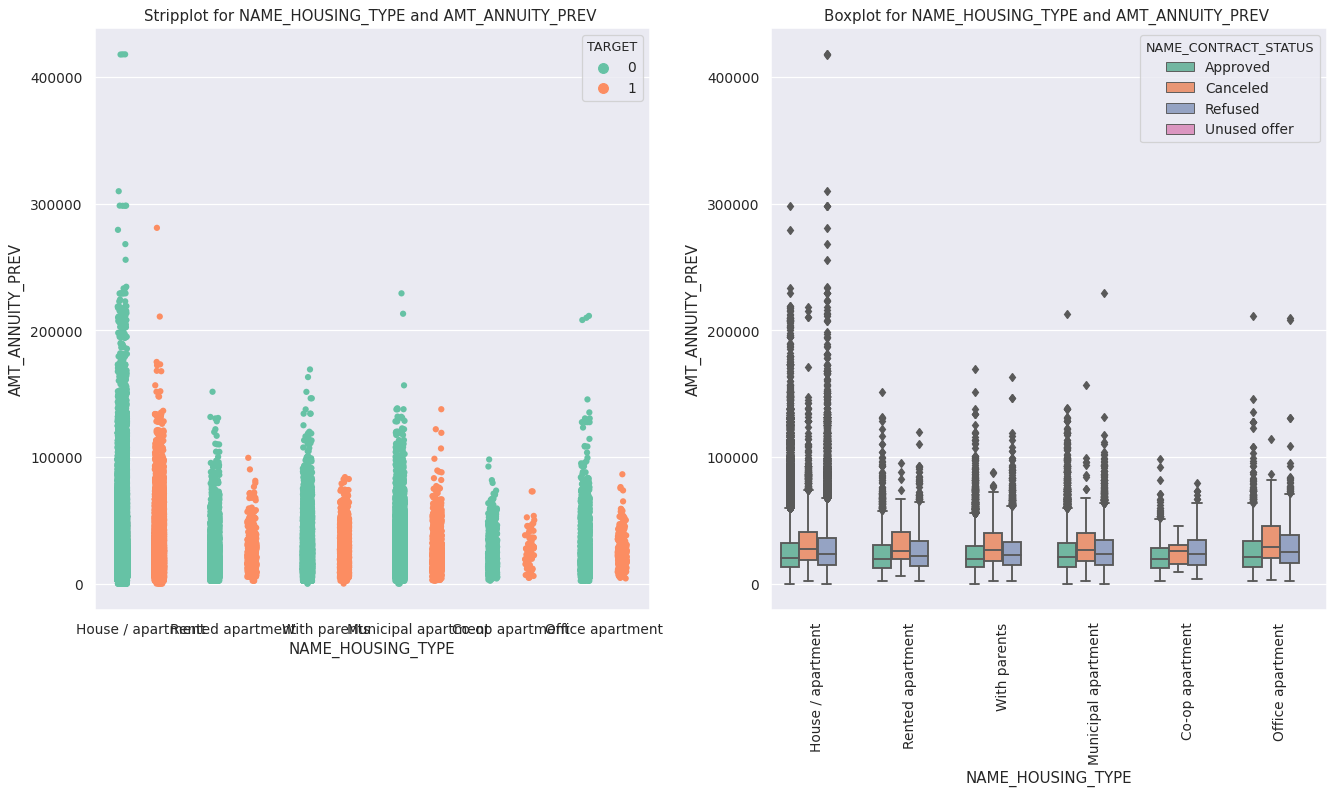

In [0]:
merged_data_numeric_categorical("NAME_HOUSING_TYPE", "AMT_ANNUITY_PREV")

In [0]:
### Observations made from above :

# "Less Cancelation" and "Less Default " for "Rented Apartment" in "NAME_HOUSING_TYPE" category
# "Pensioner" in "NAME_INCOME_TYPE" category have less defaulter
# "Married" in "NAME_FAMILY_STATUS" have high default count
#  Ratio of Approval and Cancellation is same for "NAME_HOUSING_TYPE" category 
#                  --> "HOUSING_TYPE" does not affect "NAME_CONTRACT_STATUS" greatly